In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

cwd = os.getcwd()
code_dir = os.path.dirname(cwd)
sys.path.append(code_dir)

import seaborn as sns

from lib.directories import *
from lib.plotting import *

In [35]:
save_dir_comparison = os.path.join(FIGURES_DIR, "paper", "comparison")
os.makedirs(save_dir_comparison, exist_ok=True)
save_dir_single = os.path.join(FIGURES_DIR, "paper", "single_models")
os.makedirs(save_dir_single, exist_ok=True)

search = "nn"
suffix_agg = "Agg_mean-PCA_100-Norm_True"
suffix_no_agg = "Agg_none-PCA_100-Norm_True"

models = [
        ("fs-essentia-extractor_legacy",
         "PCA_100",
        search
        ),
        ("audioset-vggish-3", 
        suffix_agg,
        search
        ),
        ("audioset-yamnet-1", 
        suffix_agg, 
        search
        ),
        ("fsd-sinet-vgg42-tlpf-1", 
        suffix_agg,
        search
        ),
        (
        "BEATs_iter3_plus_AS2M",
        suffix_agg,
        search
        ),
        ("openl3-env-mel256-emb512-3", 
        suffix_agg,
        search
        ),
        ("clap-630k-fusion-best",
        suffix_no_agg,
        search
        ),
        (
        "CLAP_2023",
        suffix_no_agg,
        search
        ),
        (
        "Pengi",
        suffix_no_agg,
        search
        ),
        ("AudioCLIP-Full-Training",
        suffix_no_agg,
        search
        ),
        ("Wav2CLIP",
        suffix_no_agg,
        search
        ),
        ("imagebind_huge",
        suffix_no_agg,
        search
        ),
]


## Compare Best Models

### MAP

#### Micro, Macro

##### 15, 150 Joint

IndexError: list index out of range

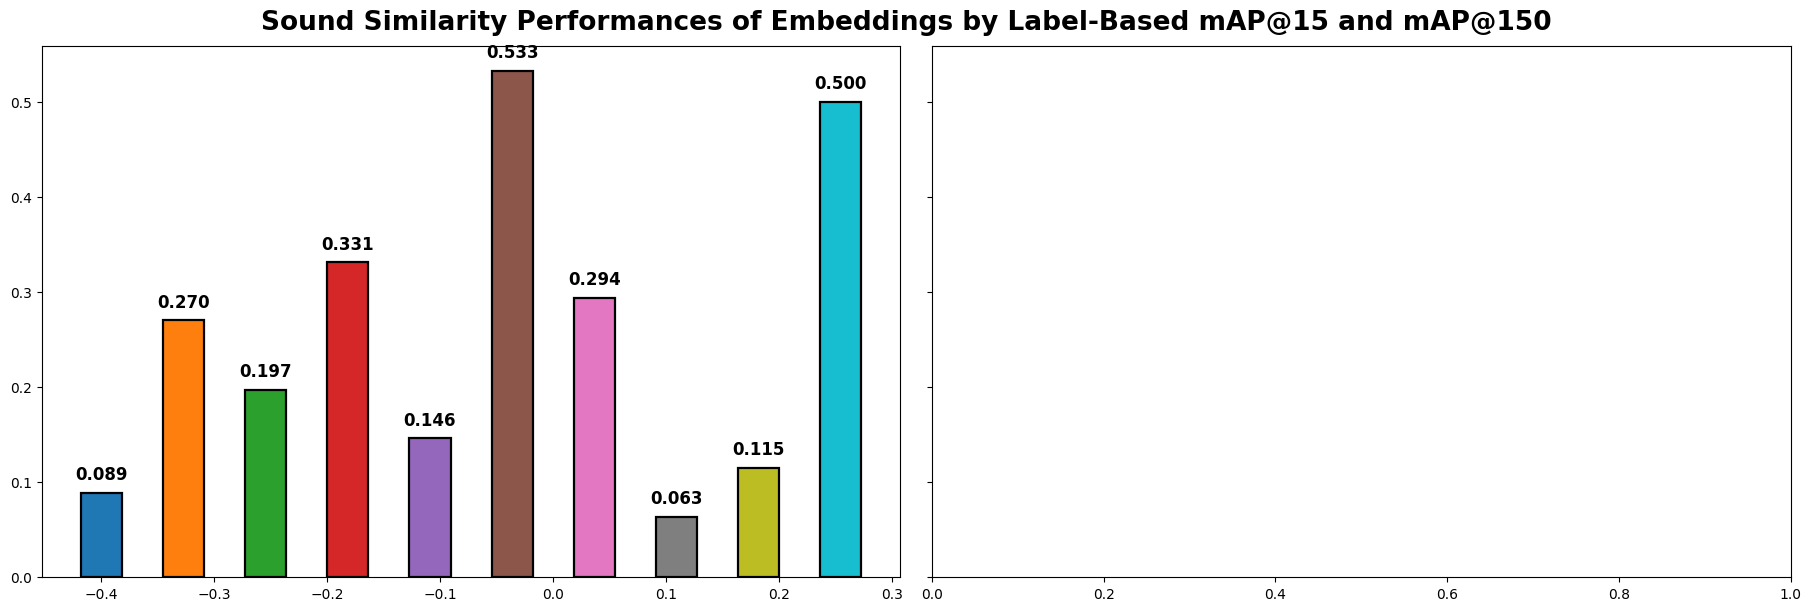

In [4]:
save_fig = False
plot_map_15_and_150_comparisons_multimodel(models, "macro", use_fig_name=True, legend=True, save_fig=save_fig, save_dir=save_dir_comparison)

##### 15, 150 Separate

Saving figure to /home/roguz/freesound/freesound-perceptual_similarity/data/figures/paper/comparison/macro_mAP@15-comparison.png


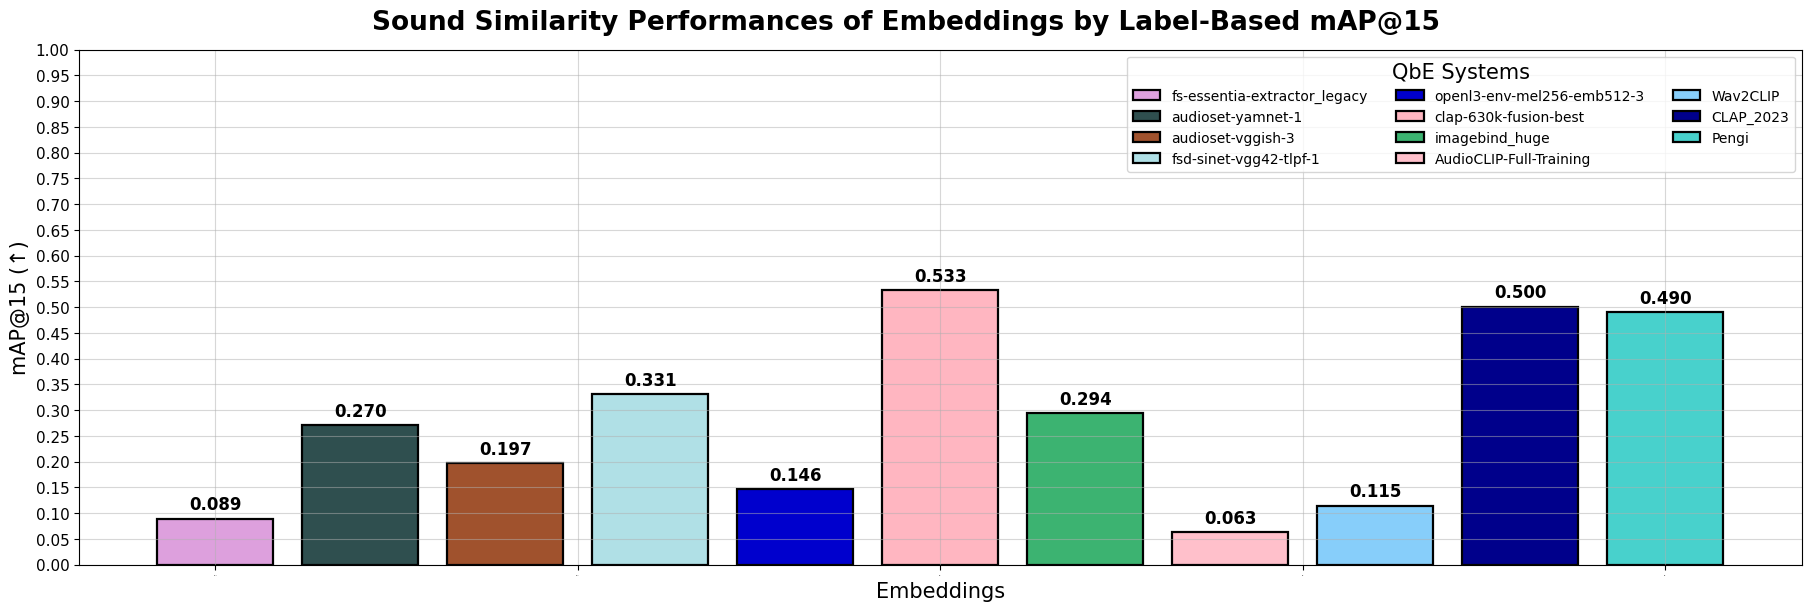

Saving figure to /home/roguz/freesound/freesound-perceptual_similarity/data/figures/paper/comparison/macro_mAP@150-comparison.png


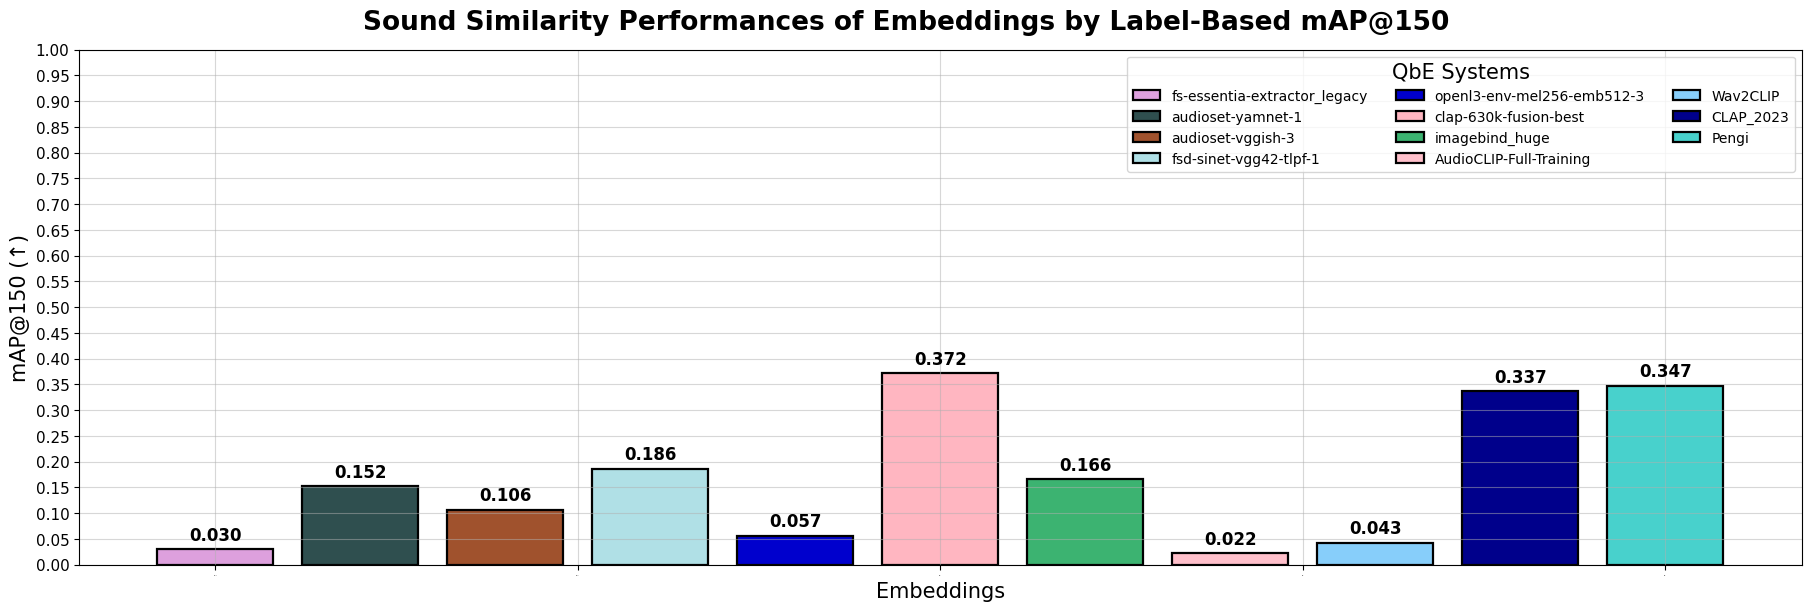

In [18]:
save_fig = True
for N in [15, 150]:
    plot_map_N_comparisons_multimodel(models, "macro", N=N, use_fig_name=True, legend=True, save_fig=save_fig, save_dir=save_dir_comparison)

#### Family-based mAP@15 Comparisons

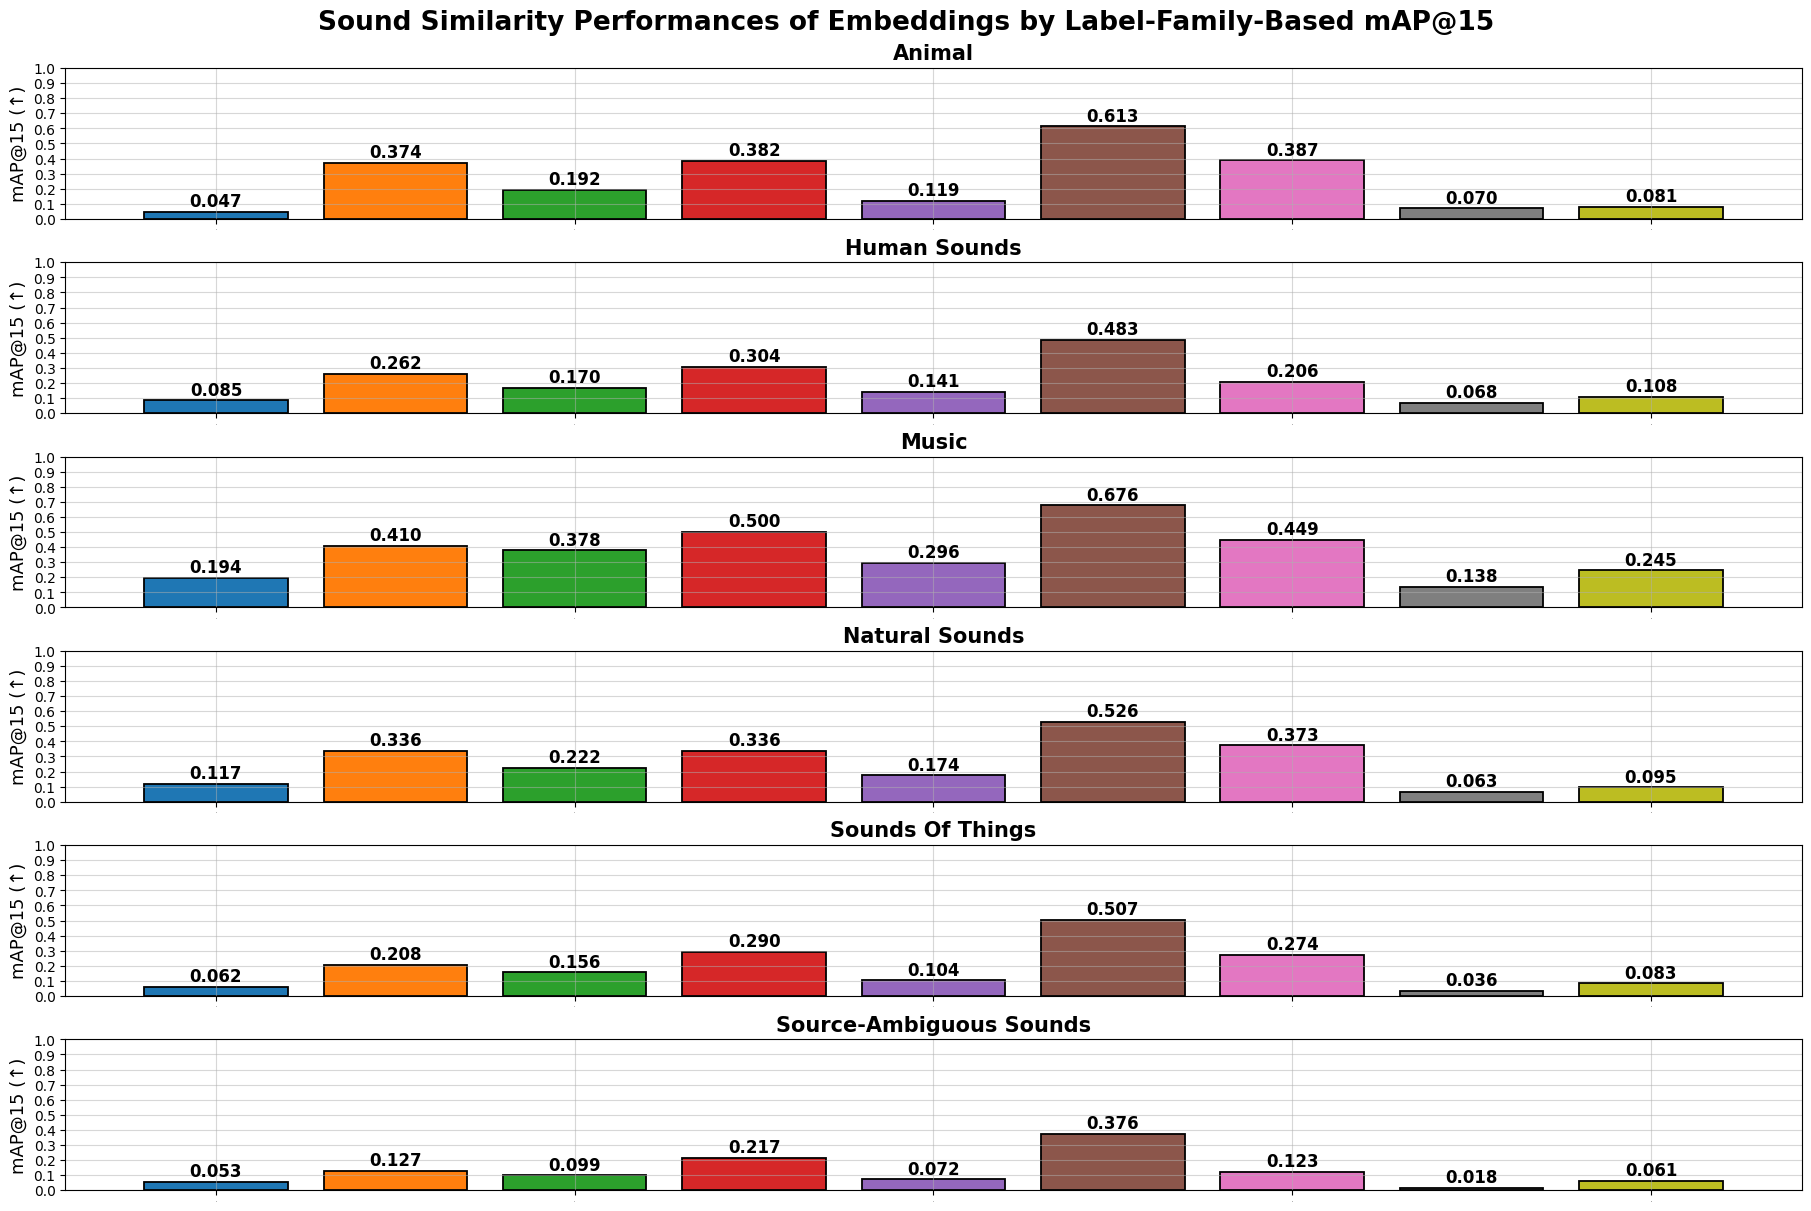

In [3]:
save_fig = False
plot_family_map_comparisons_multimodel(models, legend=False, use_fig_name=True, save_fig=save_fig, save_dir=save_dir_comparison)

##### Heatmap

In [36]:
model_maps = defaultdict(list)
for model, variation, search in models:
    embedding_eval_dir = os.path.join(EVAL_DIR, DATASET_NAME, model+"-"+variation)
    map_path = os.path.join(embedding_eval_dir, search, "families_mAP@15.csv")
    labels_map = pd.read_csv(map_path)
    families = labels_map["family"].to_list()
    maps = labels_map["map"].to_list()
    for family, family_map in zip(families, maps):
        family = family.replace("_", " ").title()
        model_maps[family].append((model, variation, search, family_map))
model_maps = dict(sorted(model_maps.items(), key=lambda x: x[0]))

In [37]:
data = []
xlabels = []
for family, vals in model_maps.items():
    family_data = []
    xlabels.append(family.replace(' ', '\n').replace('-', '\n'))
    for model, variation, search, family_map in vals:
        print(family, model, variation, search, family_map)
        family_data.append(family_map)
        # ylabels.append(model)
    data.append(family_data)
data = np.array(data)

Animal fs-essentia-extractor_legacy PCA_100 nn 0.0471845580386012
Animal audioset-vggish-3 Agg_mean-PCA_100-Norm_True nn 0.1923885092627625
Animal audioset-yamnet-1 Agg_mean-PCA_100-Norm_True nn 0.3735636939960864
Animal fsd-sinet-vgg42-tlpf-1 Agg_mean-PCA_100-Norm_True nn 0.3824986543757526
Animal BEATs_iter3_plus_AS2M Agg_mean-PCA_100-Norm_True nn 0.4212522146855145
Animal openl3-env-mel256-emb512-3 Agg_mean-PCA_100-Norm_True nn 0.118995211971489
Animal clap-630k-fusion-best Agg_none-PCA_100-Norm_True nn 0.6132299395414055
Animal CLAP_2023 Agg_none-PCA_100-Norm_True nn 0.5716111391597274
Animal Pengi Agg_none-PCA_100-Norm_True nn 0.5924982822082246
Animal AudioCLIP-Full-Training Agg_none-PCA_100-Norm_True nn 0.0698487515664857
Animal Wav2CLIP Agg_none-PCA_100-Norm_True nn 0.0813622098291766
Animal imagebind_huge Agg_none-PCA_100-Norm_True nn 0.3870831908811832
Human Sounds fs-essentia-extractor_legacy PCA_100 nn 0.084606918304173
Human Sounds audioset-vggish-3 Agg_mean-PCA_100-Norm_T

In [38]:
ylabels = []
for m in models:
    if m[0] == "fs-essentia-extractor_legacy":
        ylabels.append("Freesound")
    elif m[0] == 'audioset-yamnet-1':
        ylabels.append("YAMNet")
    elif m[0] == 'audioset-vggish-3':
        ylabels.append("VGGish")
    elif m[0] == 'fsd-sinet-vgg42-tlpf-1':
        ylabels.append("FSD-SINet")
    elif m[0] == 'BEATs_iter3_plus_AS2M':
        ylabels.append("BEATs")
    elif m[0] == 'openl3-env-mel256-emb512-3':
        ylabels.append("OpenL3")
    elif m[0] == 'imagebind_huge':
        ylabels.append("ImageBind")
    elif m[0] == 'clap-630k-fusion-best':
        ylabels.append("LAION-CLAP")
    elif m[0] == 'CLAP_2023':
        ylabels.append("Microsoft-CLAP")
    elif m[0] == 'Pengi':
        ylabels.append("Pengi")
    elif m[0] == 'AudioCLIP-Full-Training':
        ylabels.append("AudioCLIP")
    elif m[0] == 'Wav2CLIP':
        ylabels.append("Wav2CLIP")
    else:
        ylabels.append(m[0])

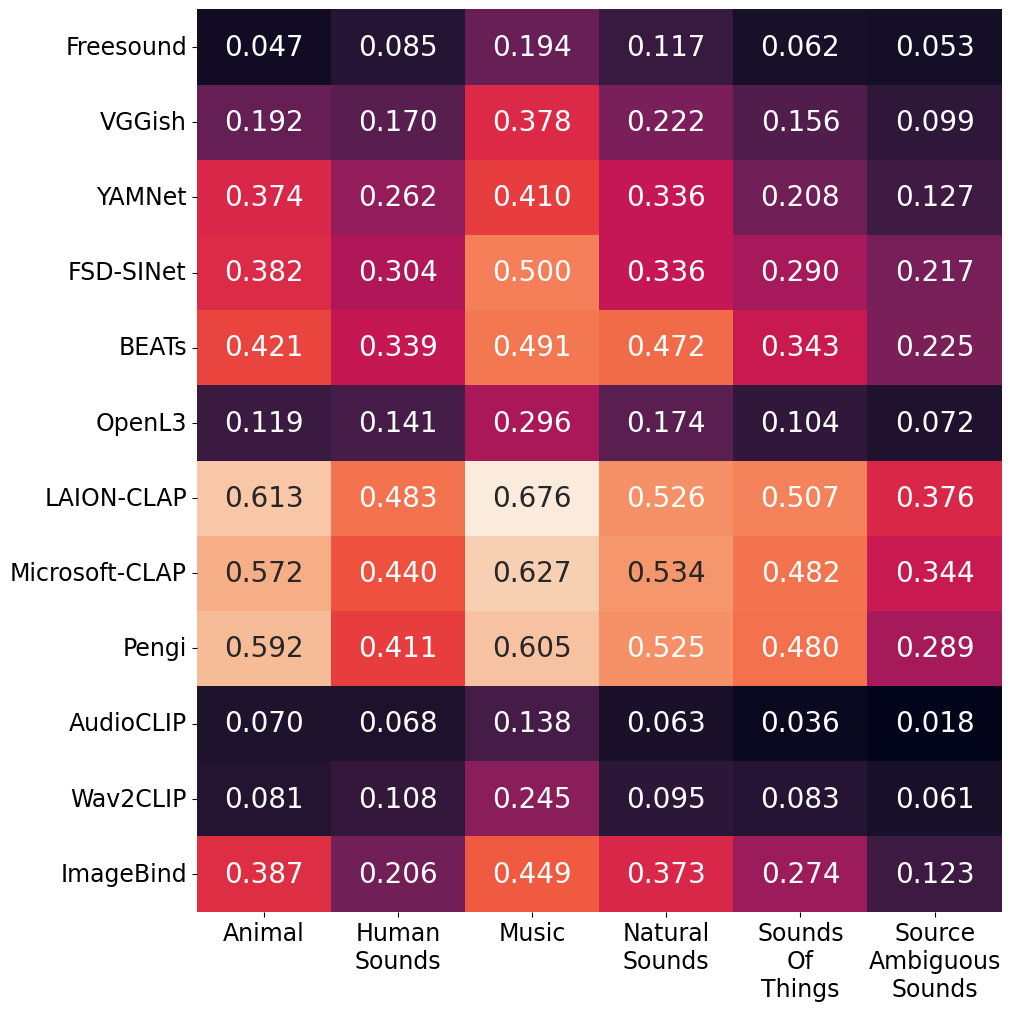

In [40]:
fig,ax = plt.subplots(figsize=(10, 10), constrained_layout=True)
sns.heatmap(data.T, xticklabels=xlabels, yticklabels=ylabels, annot=True, fmt=".3f", annot_kws={"fontsize":20}, ax=ax, cbar=False) # , cmap="viridis"
ax.tick_params(axis='y', which='major', labelsize=17)
ax.tick_params(axis='x', which='major', labelsize=17)
fig.savefig(os.path.join(save_dir_comparison, "family_map15_heatmap.png")) # , bbox_inches="tight"
plt.show()

### MR1

Saving figure to /home/roguz/freesound/freesound-perceptual_similarity/data/figures/paper/comparison/macro_MR1-comparison.png


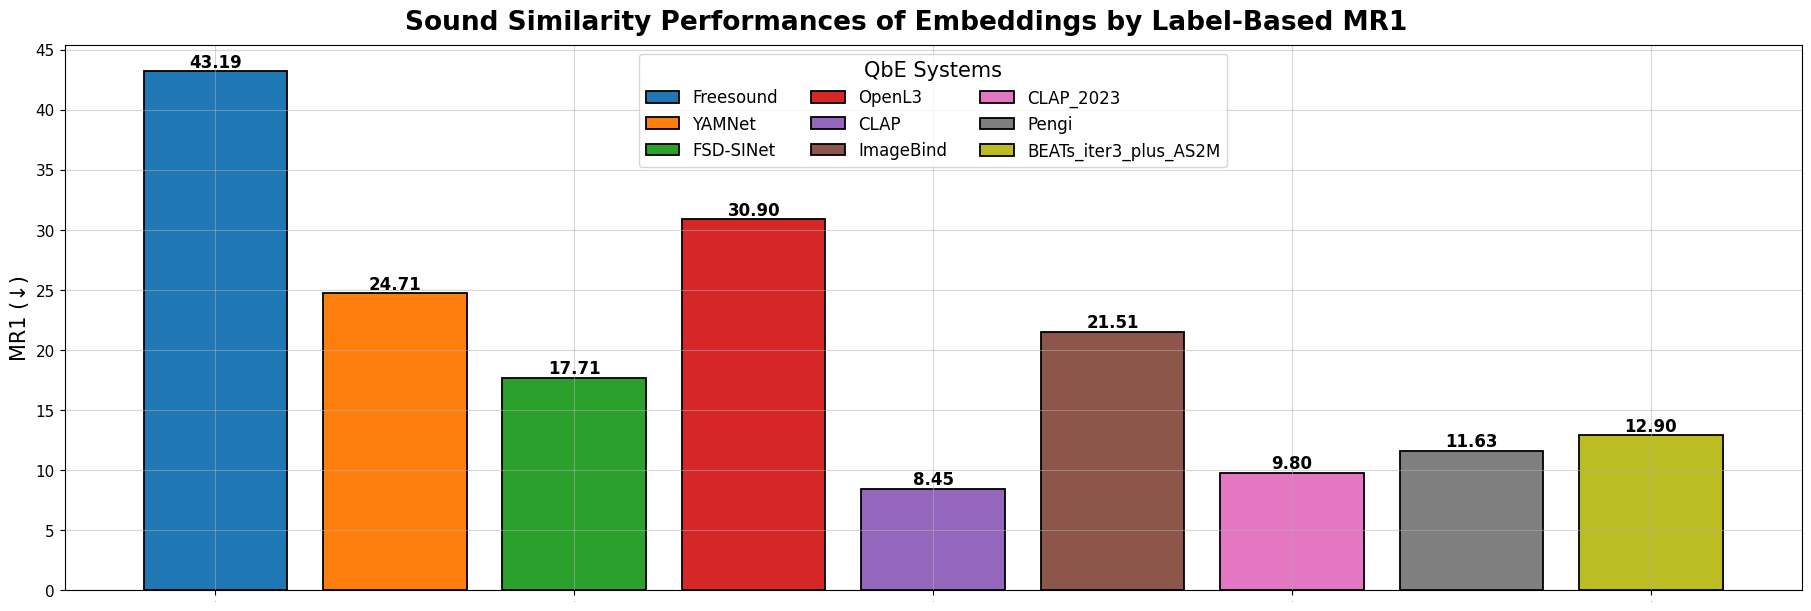

In [9]:
save_fig = True
plot_mr1_comparisons_multimodel(models, "macro", legend=True, use_fig_name=True, save_fig=save_fig, save_dir=save_dir_comparison)

Saving figure to /home/roguz/freesound/freesound-perceptual_similarity/data/figures/paper/comparison/family_based_MR1-comparison.png


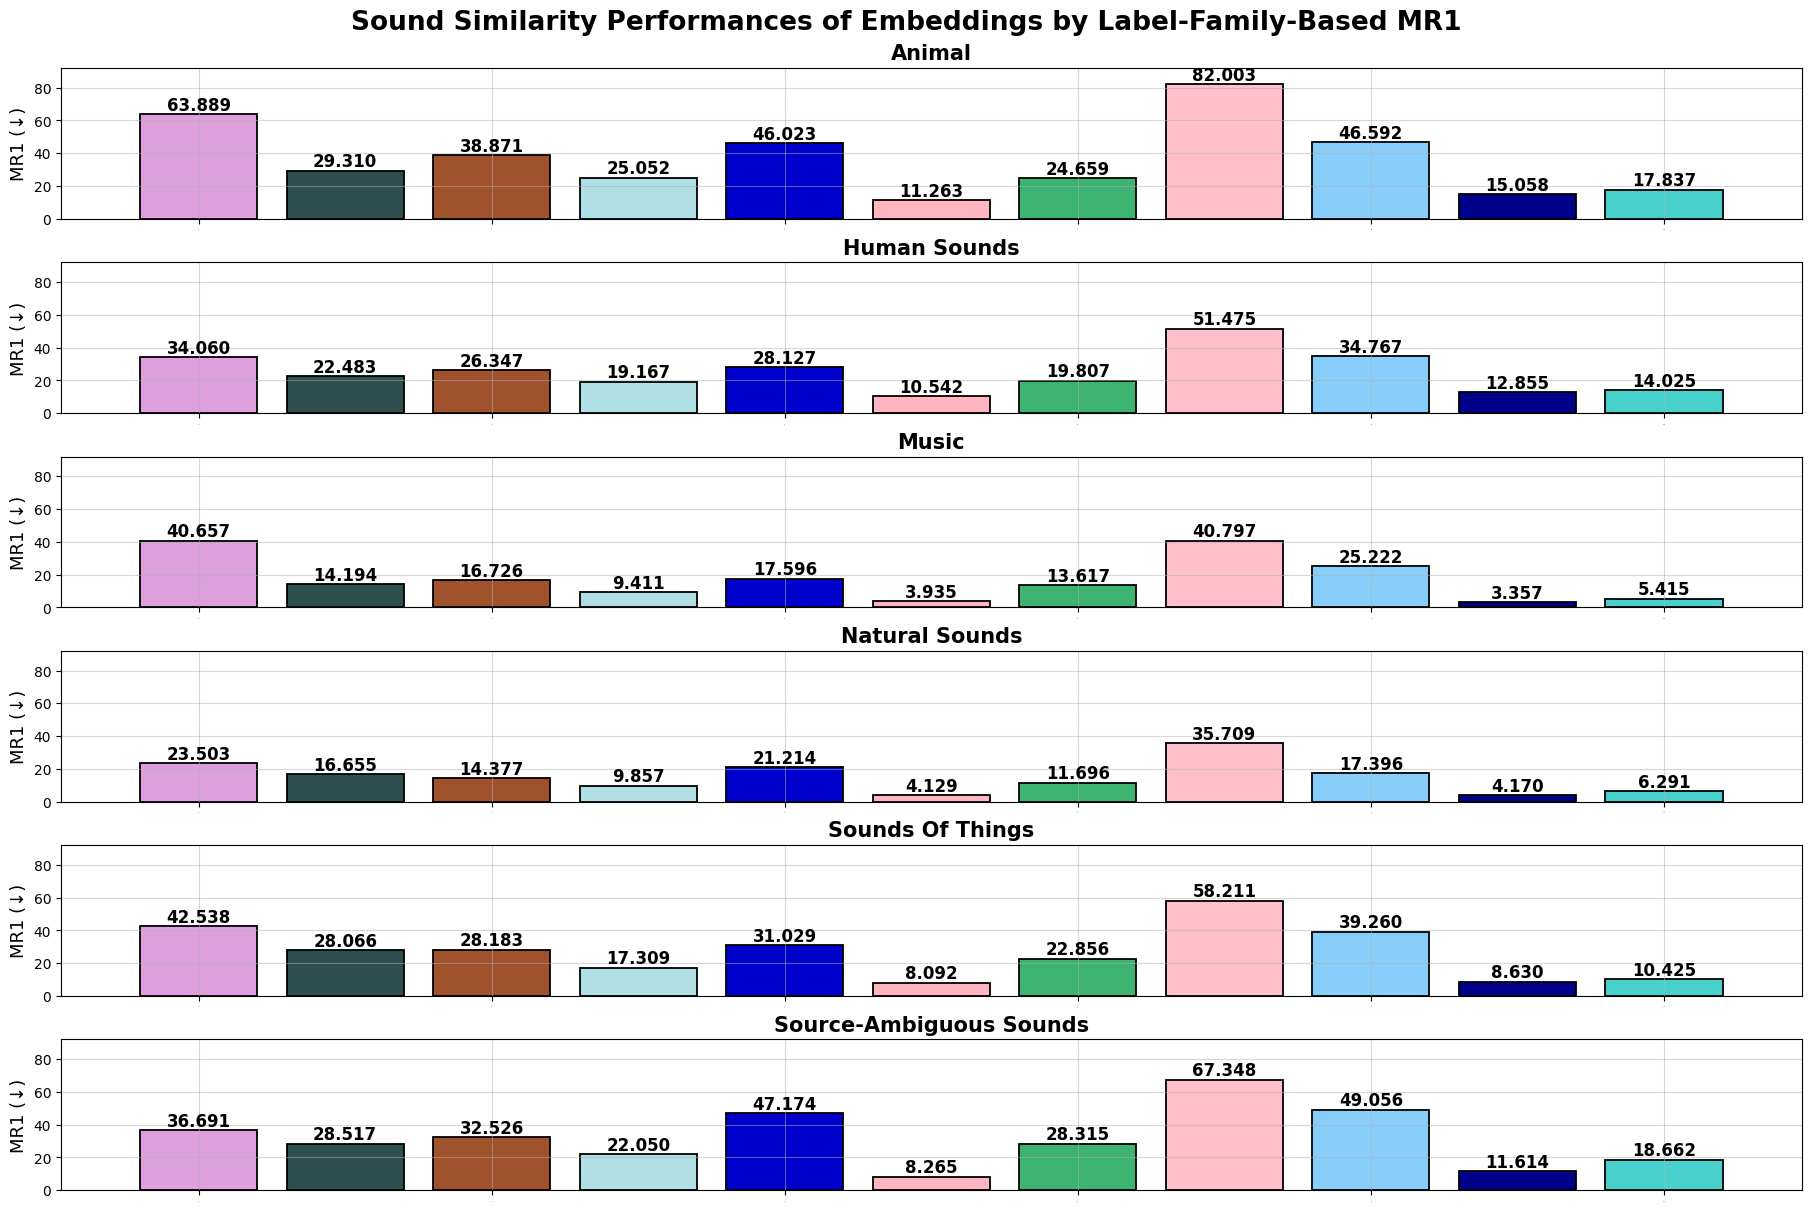

In [21]:
save_fig = True
plot_family_mr1_comparisons_multimodel(models, legend=False, use_fig_name=True, save_fig=save_fig, save_dir=save_dir_comparison)

### Some PCA Reduction

In [ ]:
_models = [
        ("fs-essentia-extractor_legacy",
         "",
         "",
        "nn"
        ),
        ("audioset-yamnet-1", 
        "mean",
        "True", 
        "nn"
        ),
        ("fsd-sinet-vgg42-tlpf-1", 
        "mean",
        "True",
        "nn"
        ),
]
save = False
save_dir = os.path.join(FIGURES_DIR, "presentation", "PCA_components")
plot_macro_map_pca_comparisons_multimodel(_models, save_fig=save, save_dir=save_dir)

## Single Model Plots

### Sound Family

##### 15

('fs-essentia-extractor_legacy', 'PCA_100', 'nn')


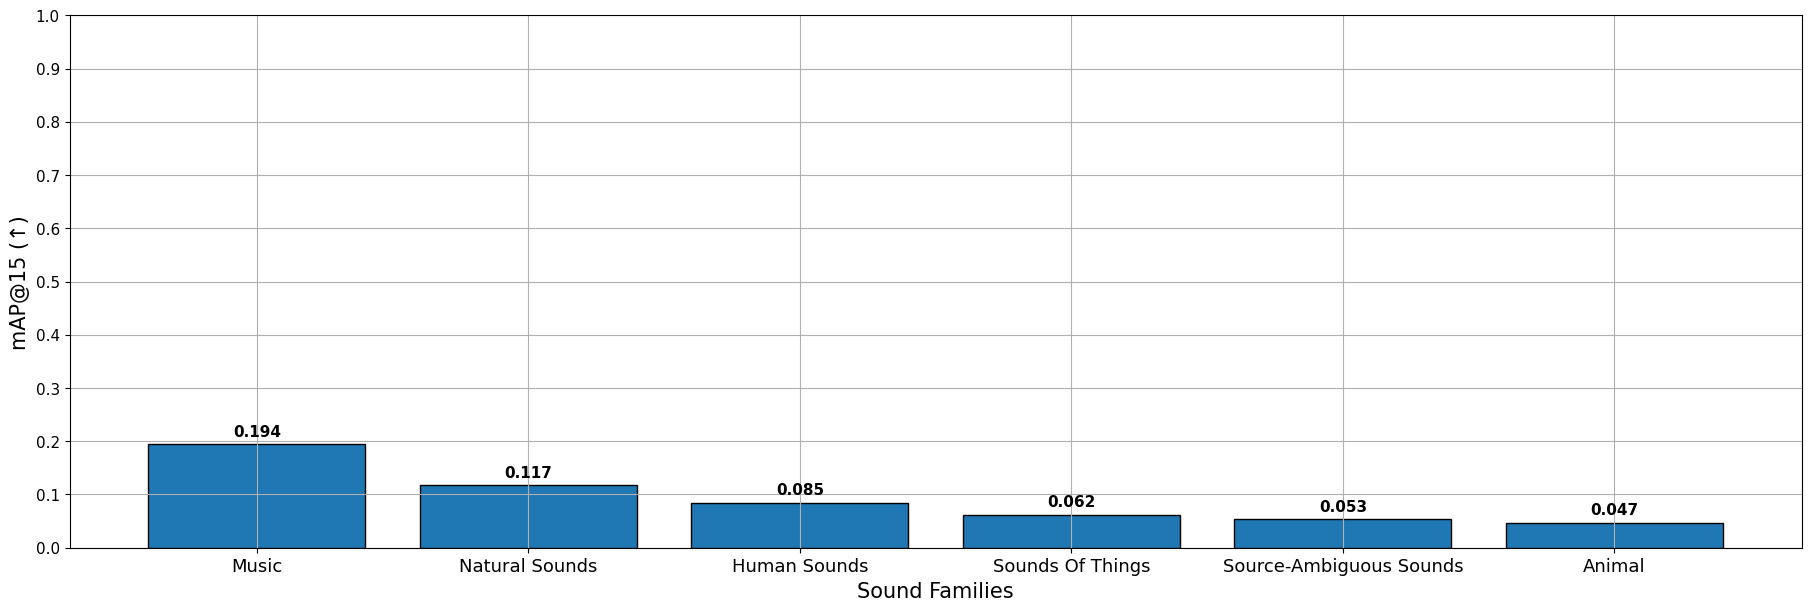

('audioset-yamnet-1', 'Agg_mean-PCA_100-Norm_True', 'nn')


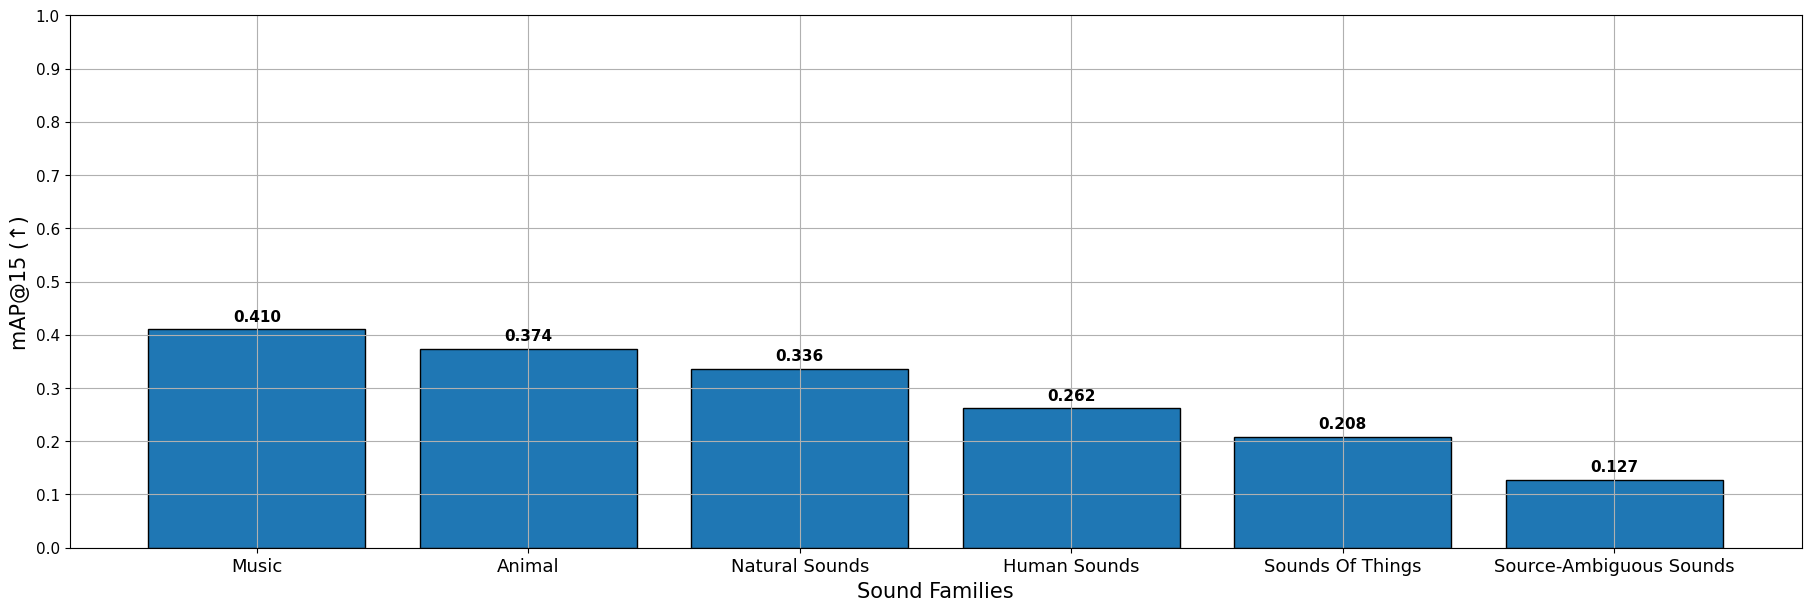

('audioset-vggish-3', 'Agg_mean-PCA_100-Norm_True', 'nn')


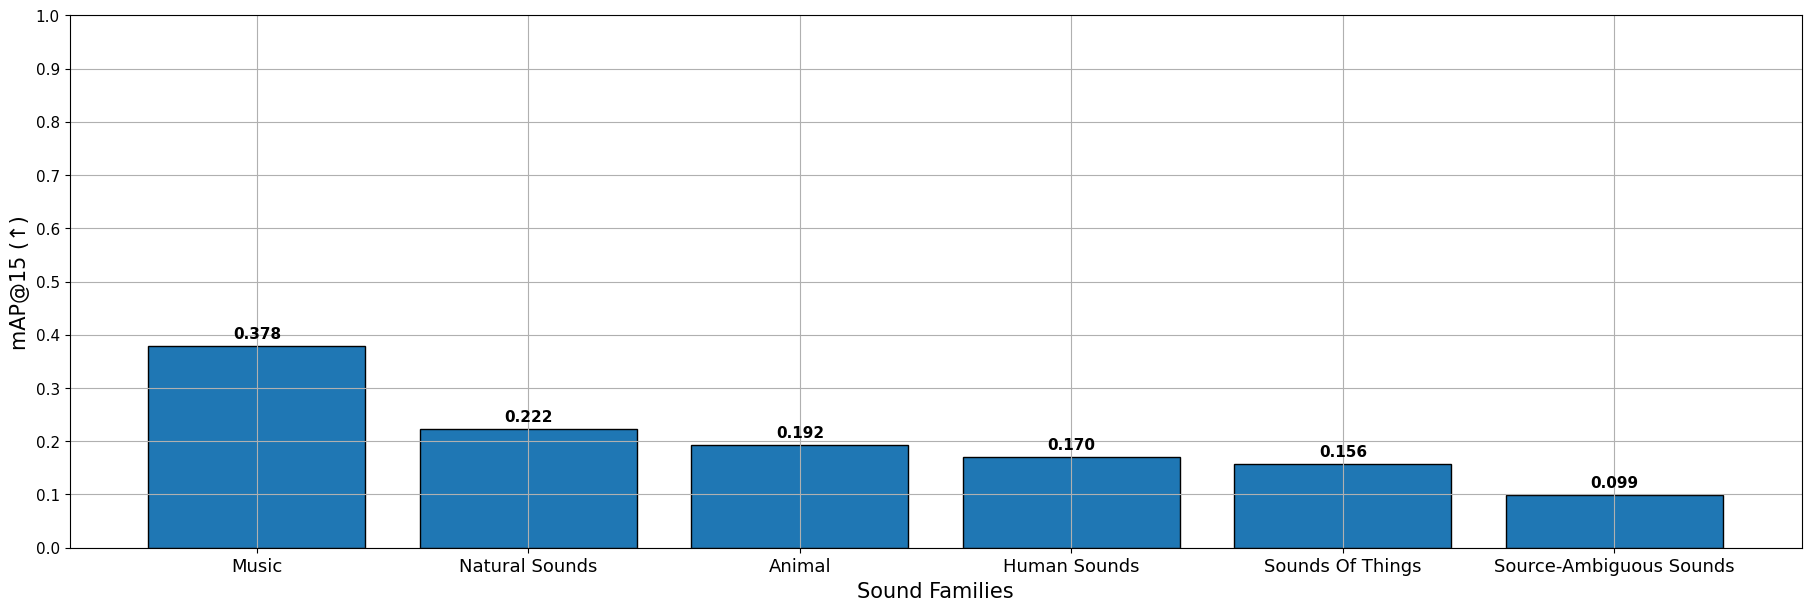

('fsd-sinet-vgg42-tlpf-1', 'Agg_mean-PCA_100-Norm_True', 'nn')


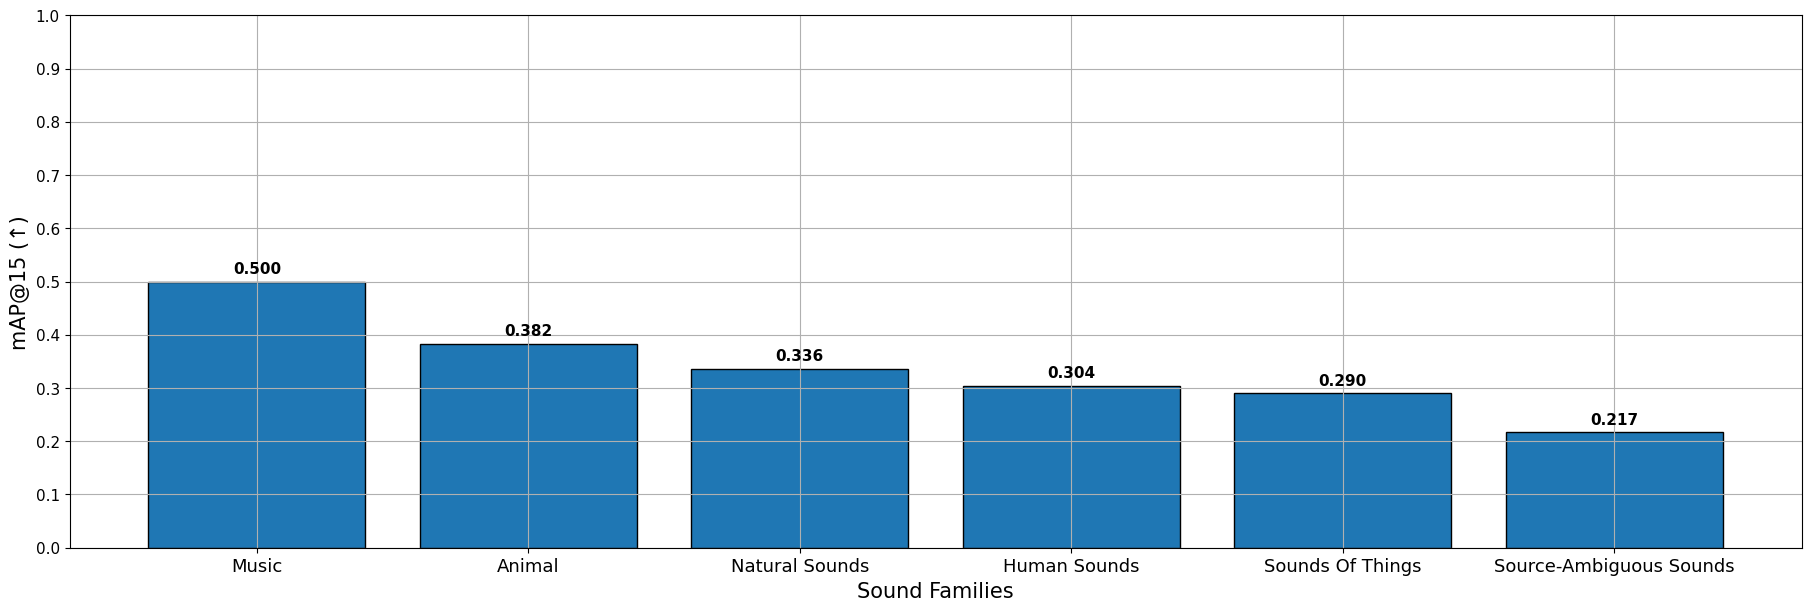

('openl3-env-mel256-emb512-3', 'Agg_mean-PCA_100-Norm_True', 'nn')


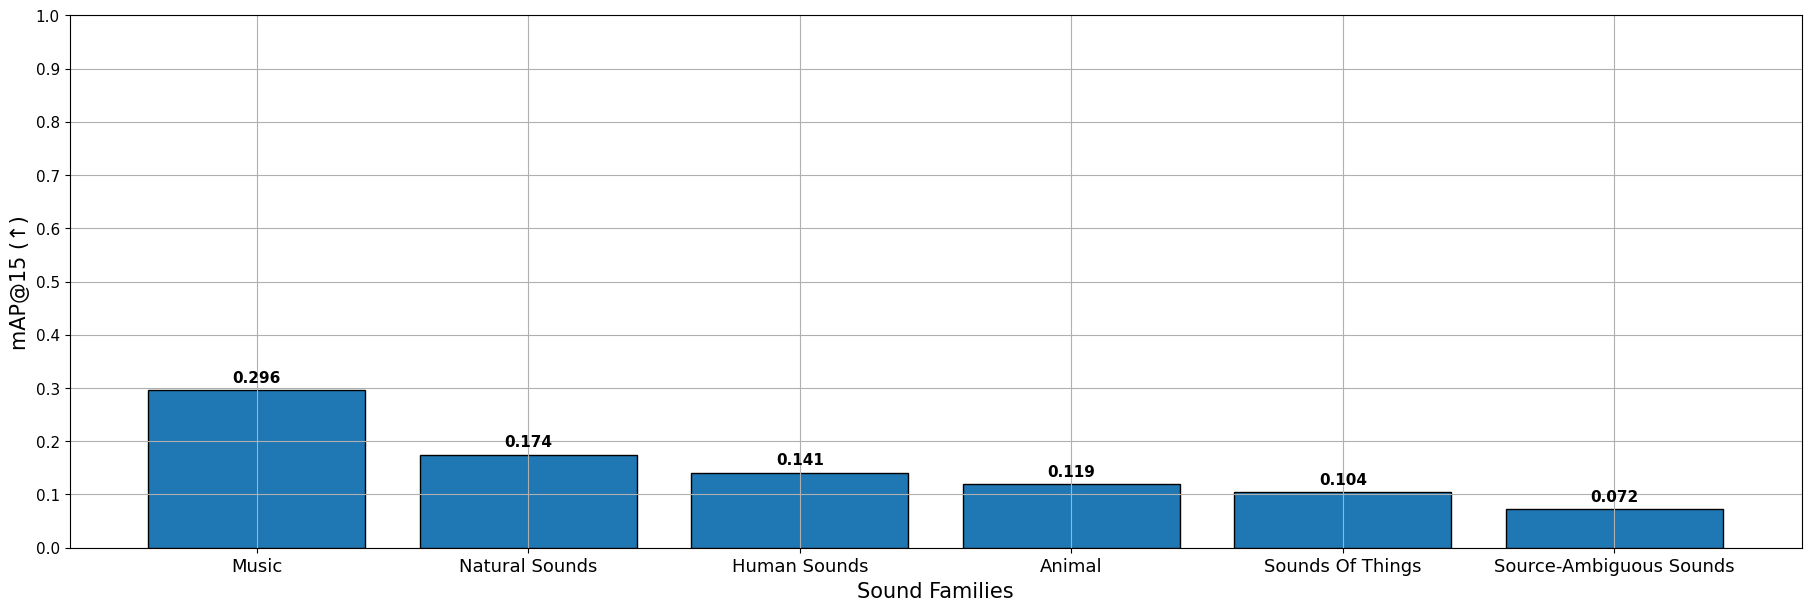

('clap-630k-fusion-best', 'Agg_none-PCA_100-Norm_True', 'nn')


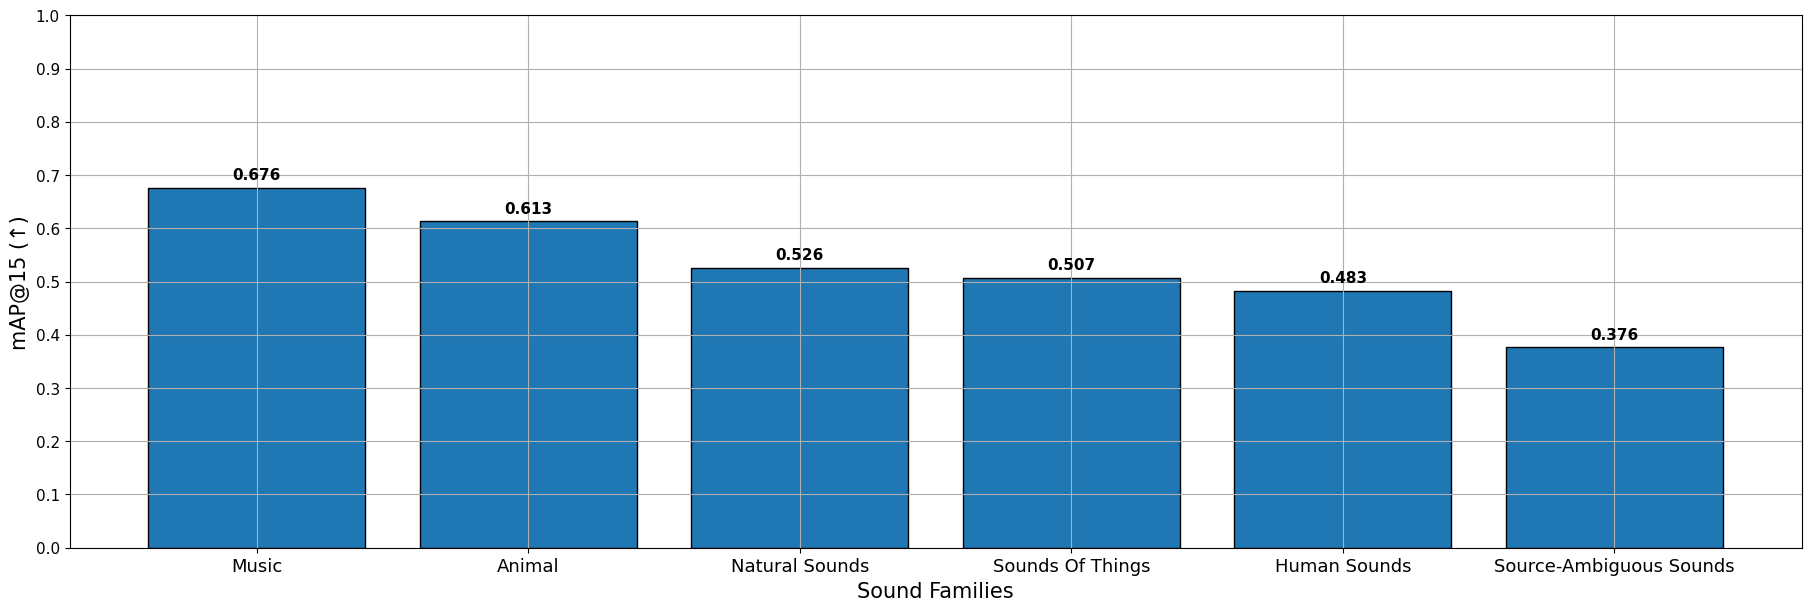

('imagebind_huge', 'Agg_none-PCA_100-Norm_True', 'nn')


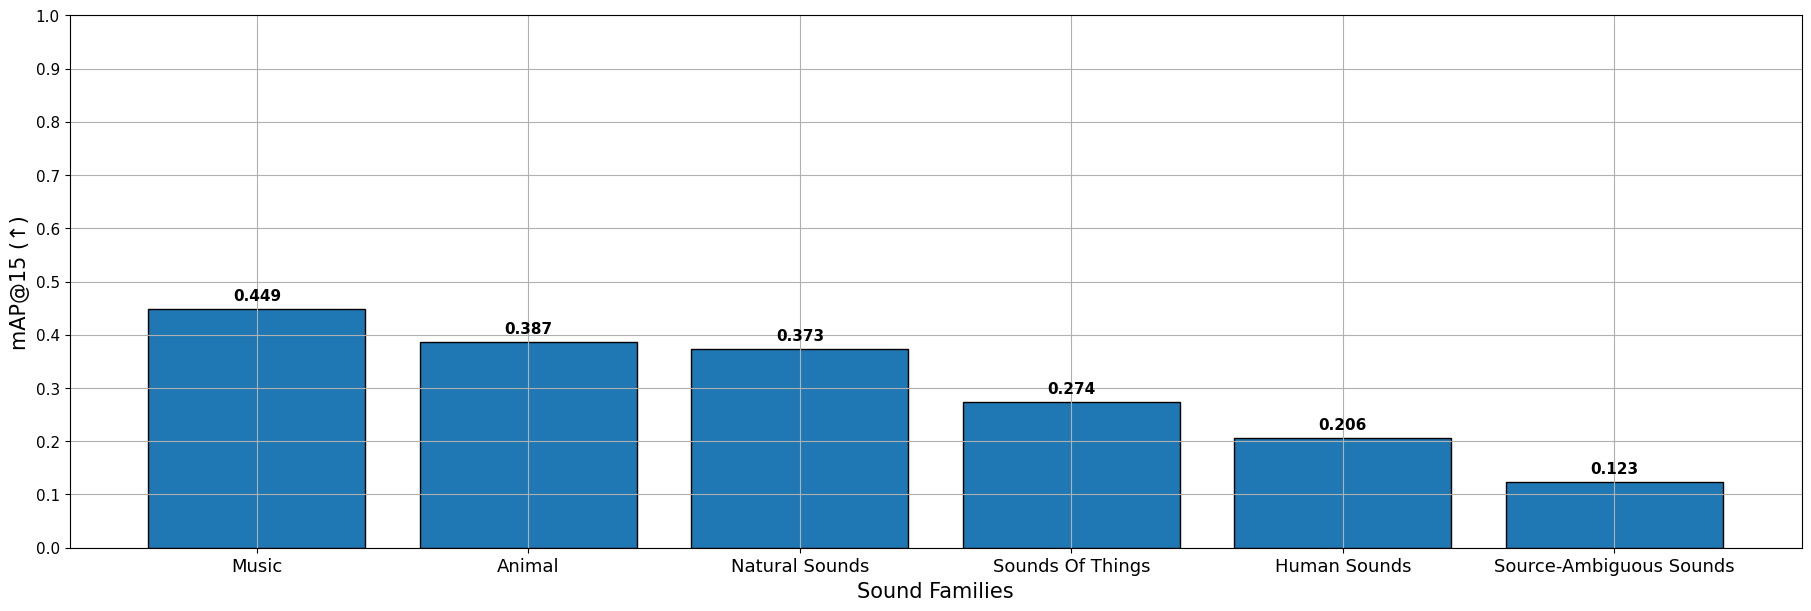

('AudioCLIP-Full-Training', 'Agg_none-PCA_100-Norm_True', 'nn')


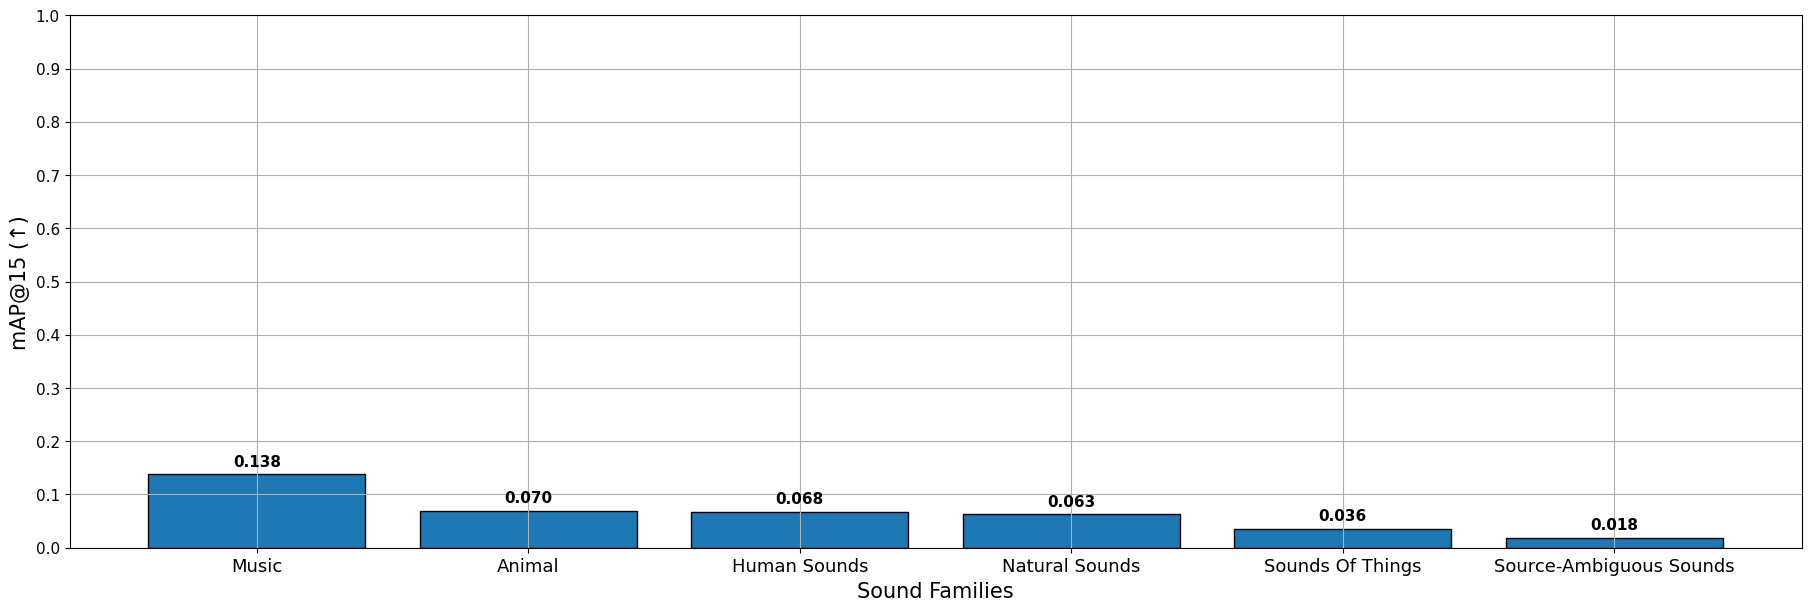

('Wav2CLIP', 'Agg_none-PCA_100-Norm_True', 'nn')


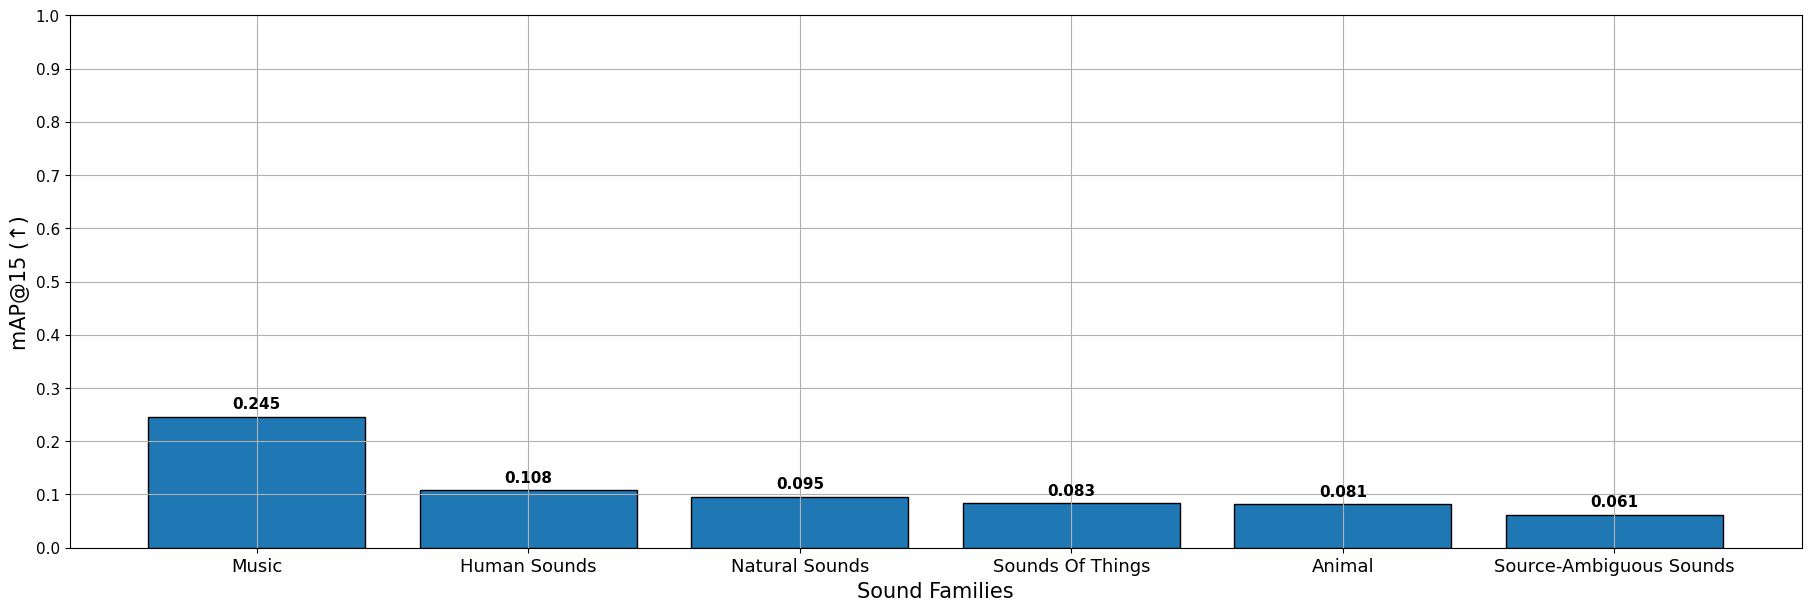

In [4]:
save_fig = False
for model in models:
    print(model)
    plot_map_at_N_for_families(model, N=15, use_fig_name=False, save_fig=save_fig, save_dir=os.path.join(save_dir_single, model[0]))

##### 15-150

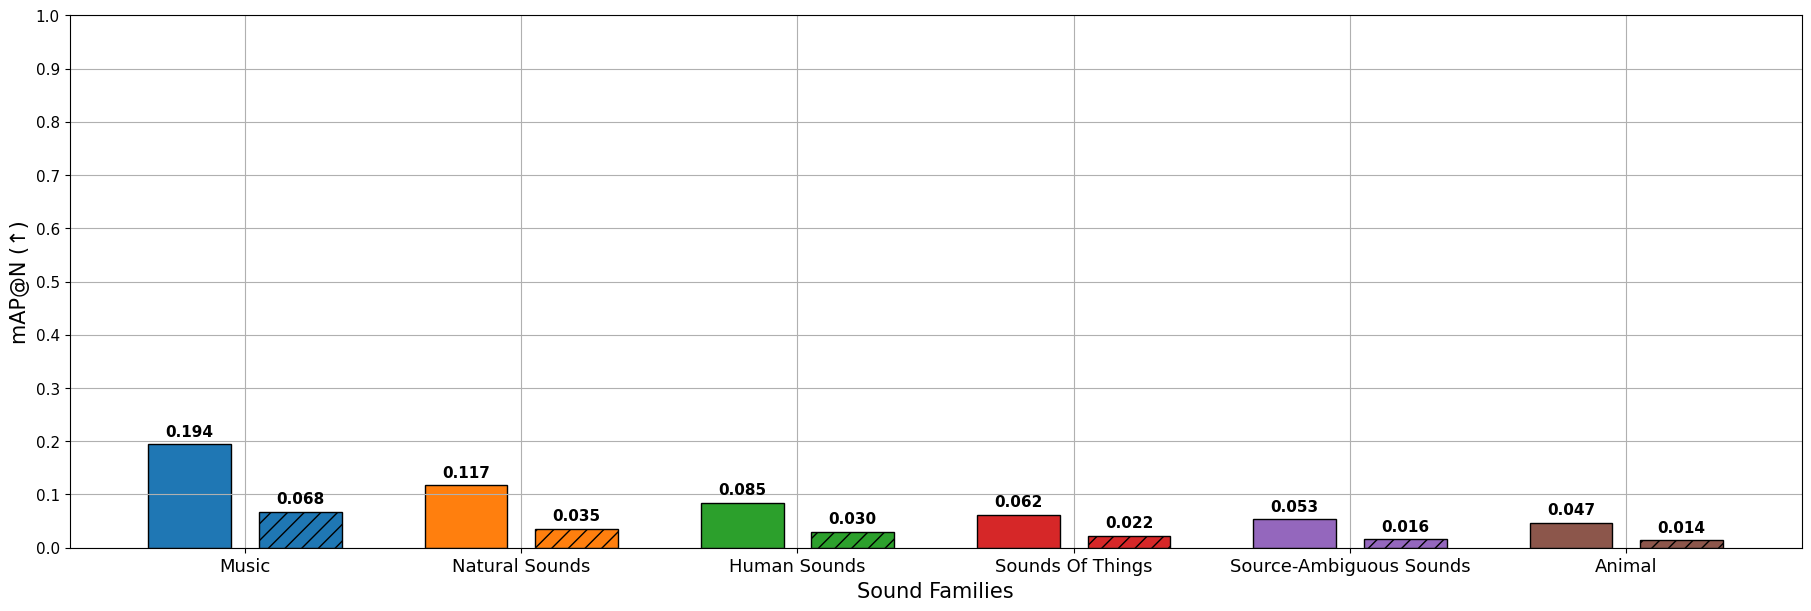

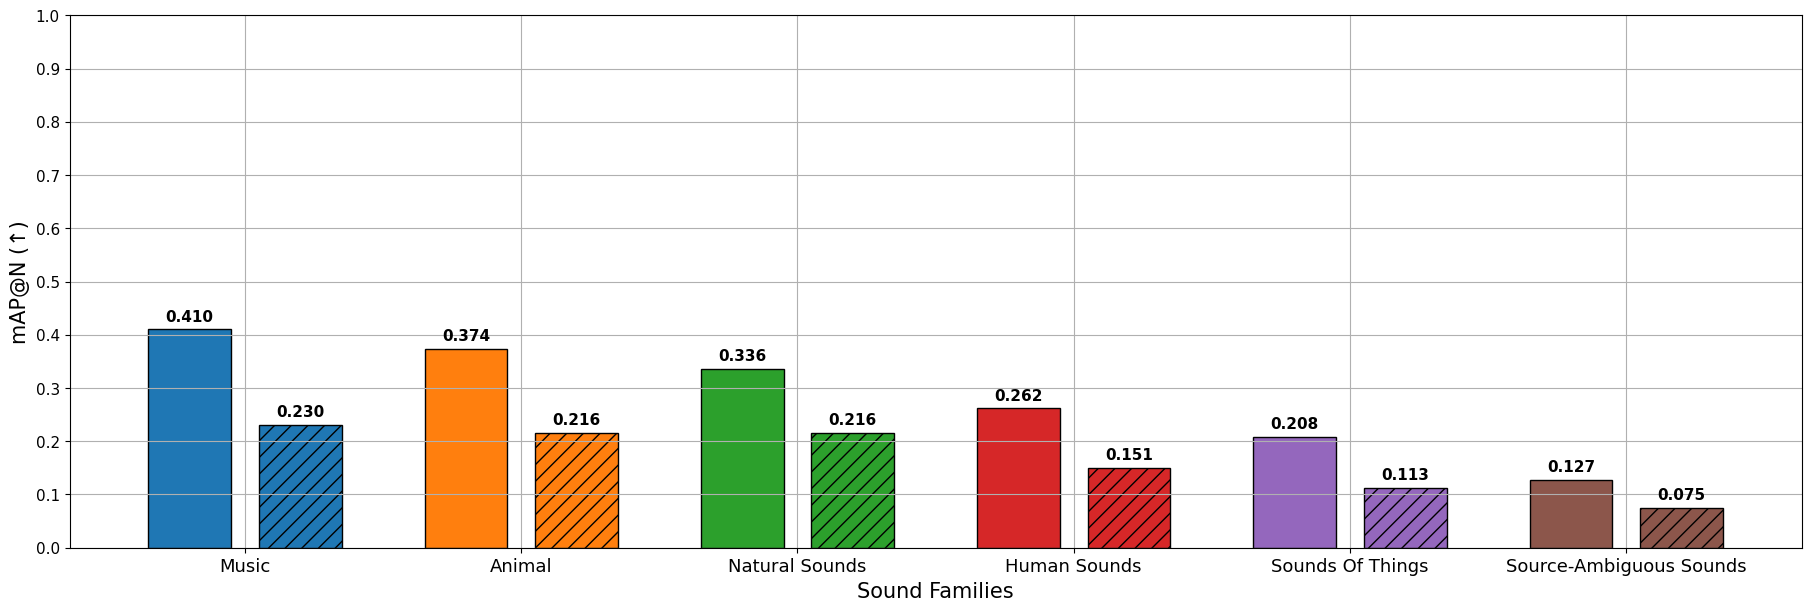

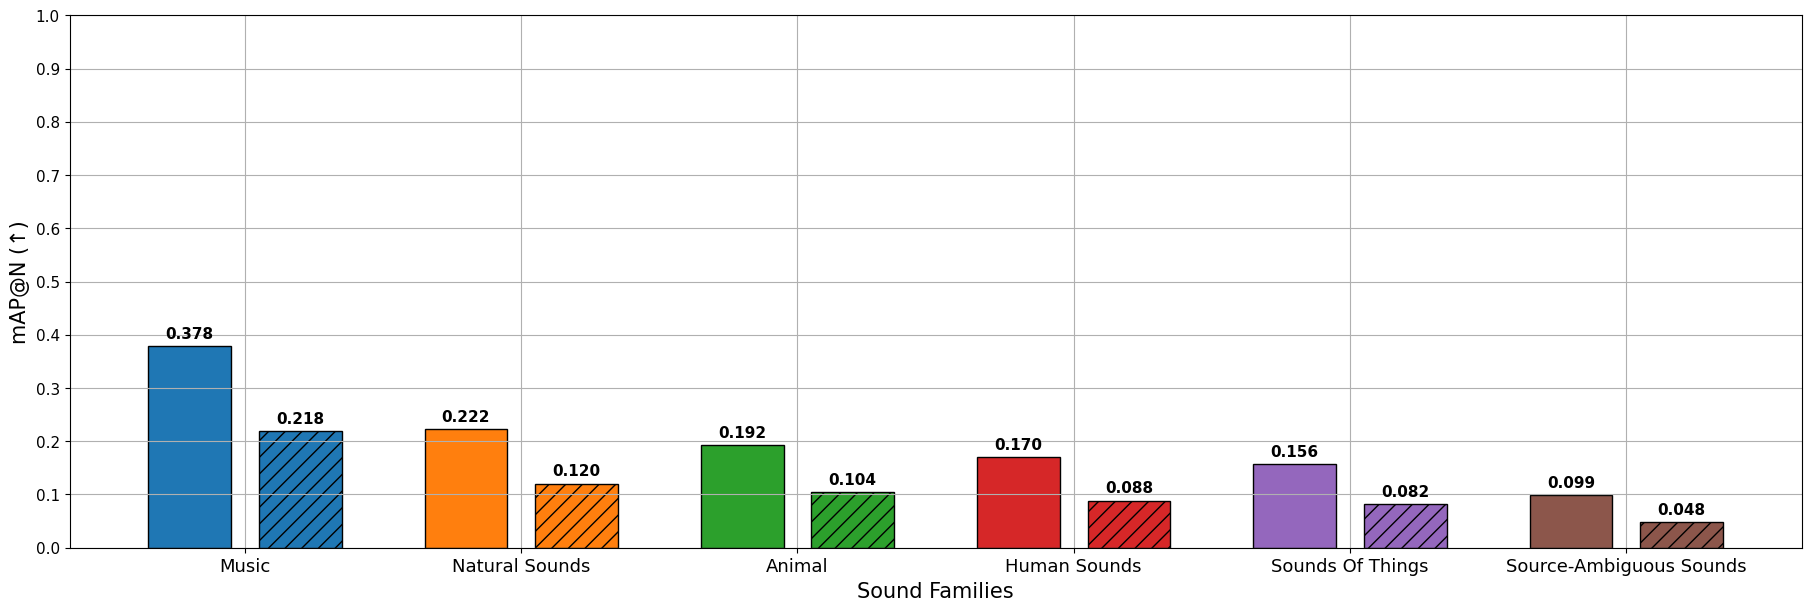

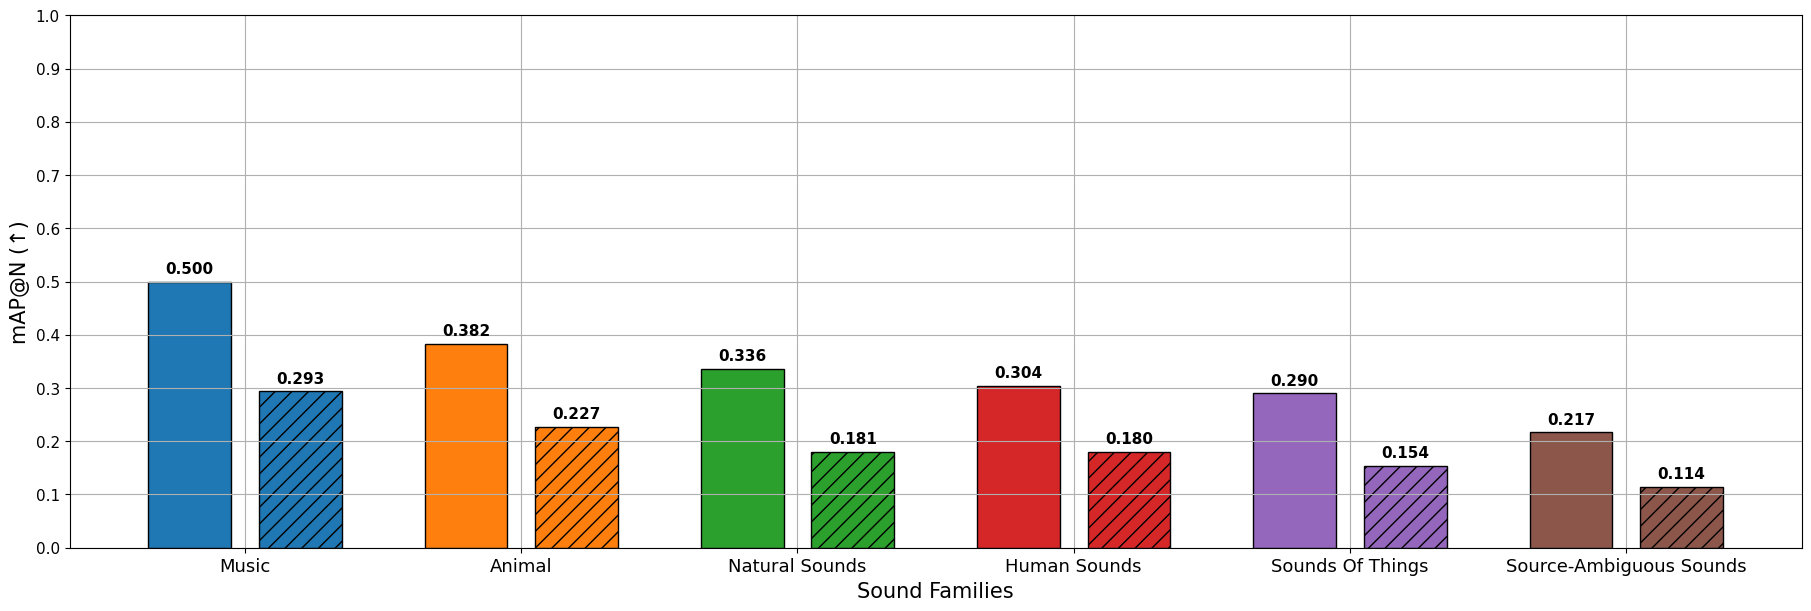

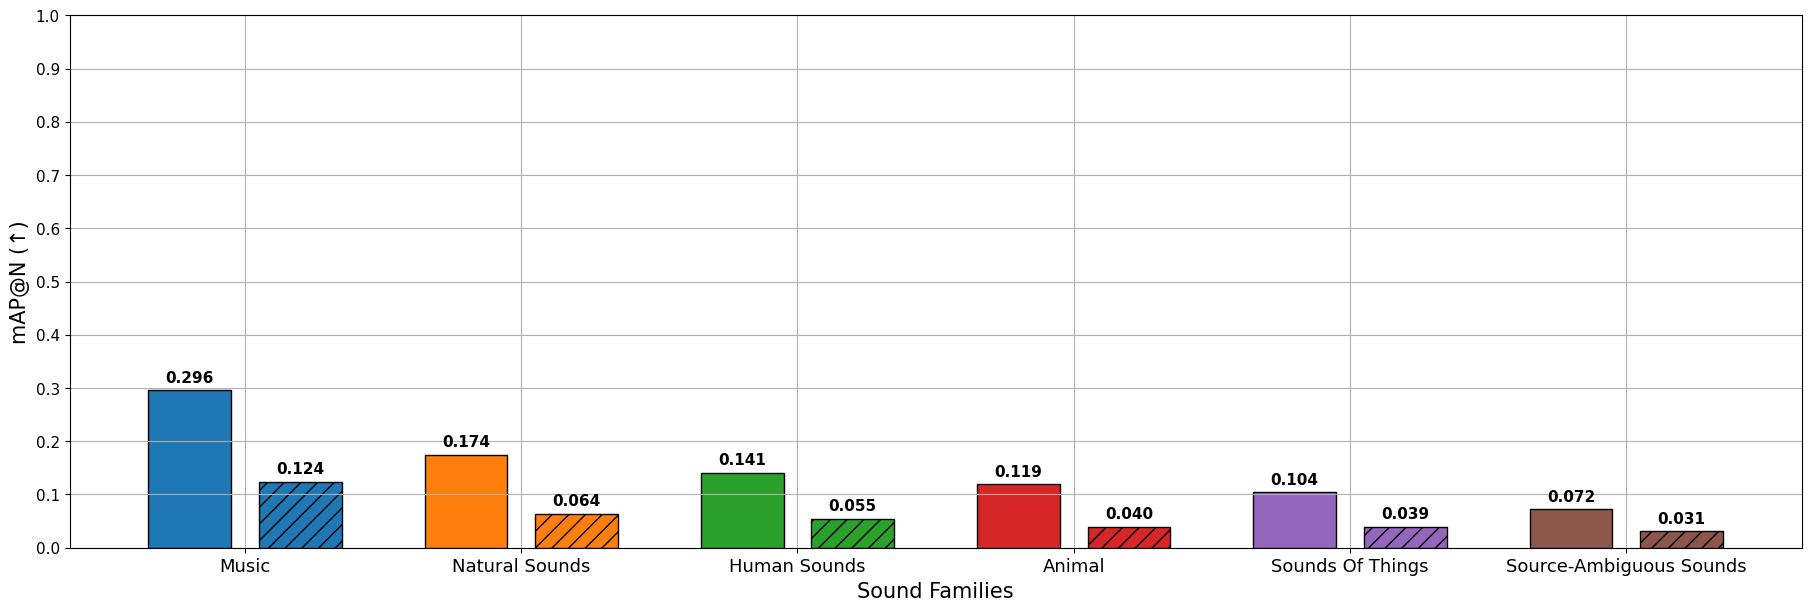

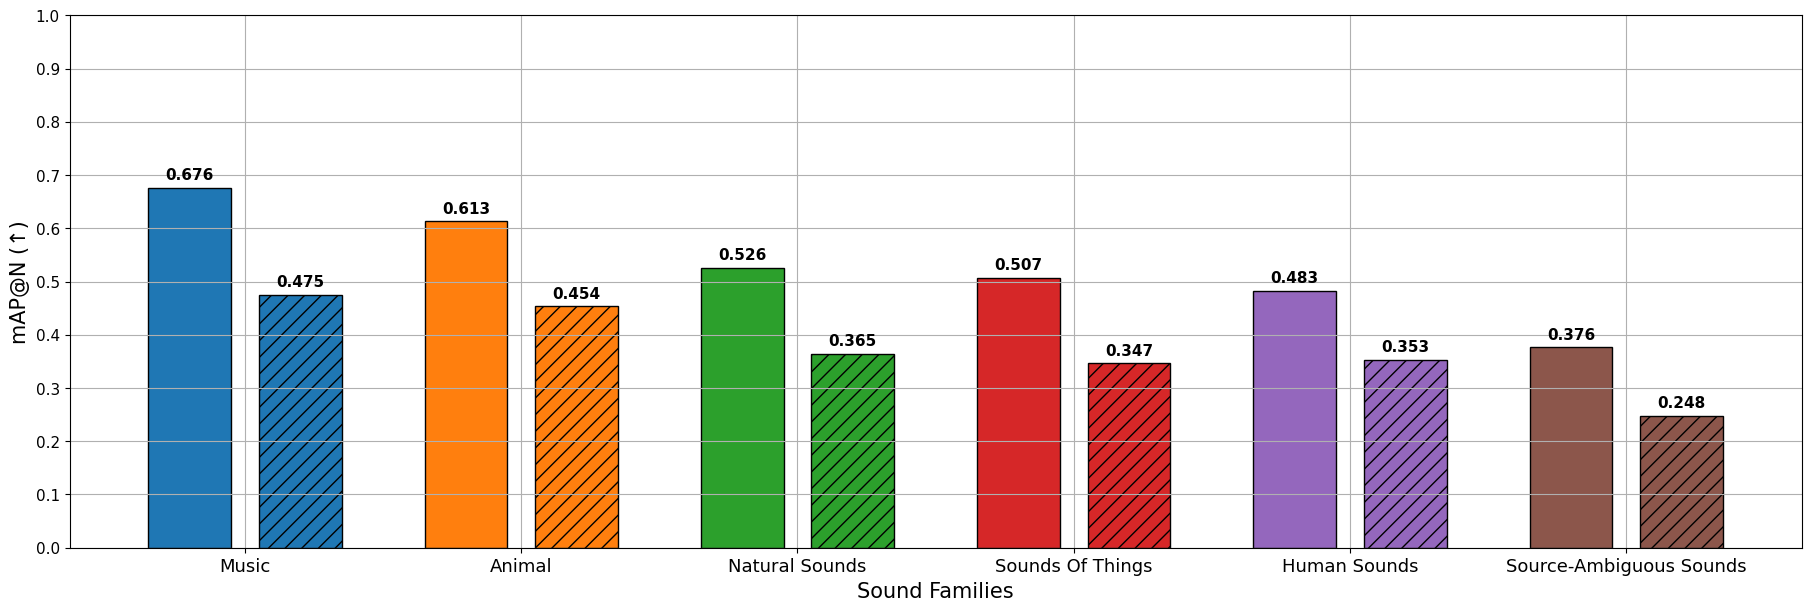

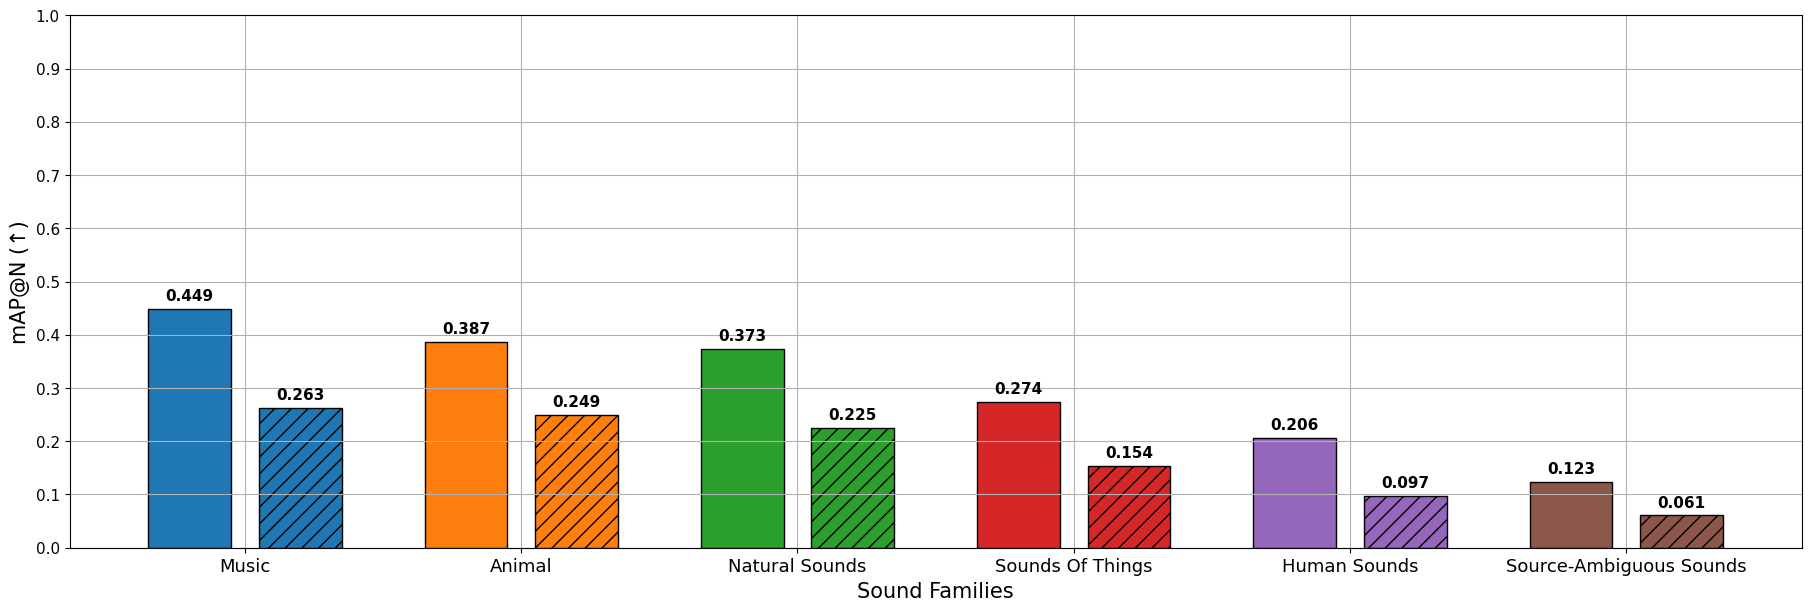

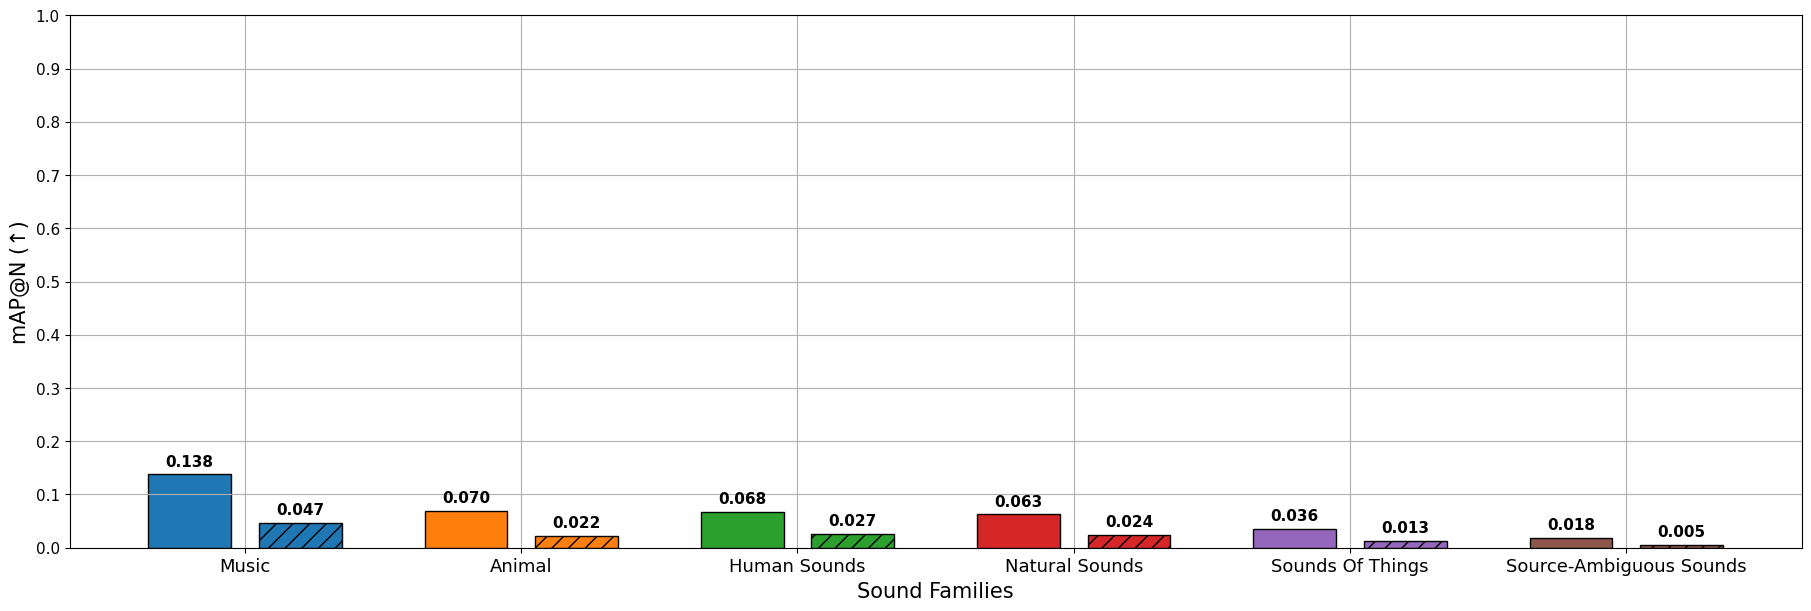

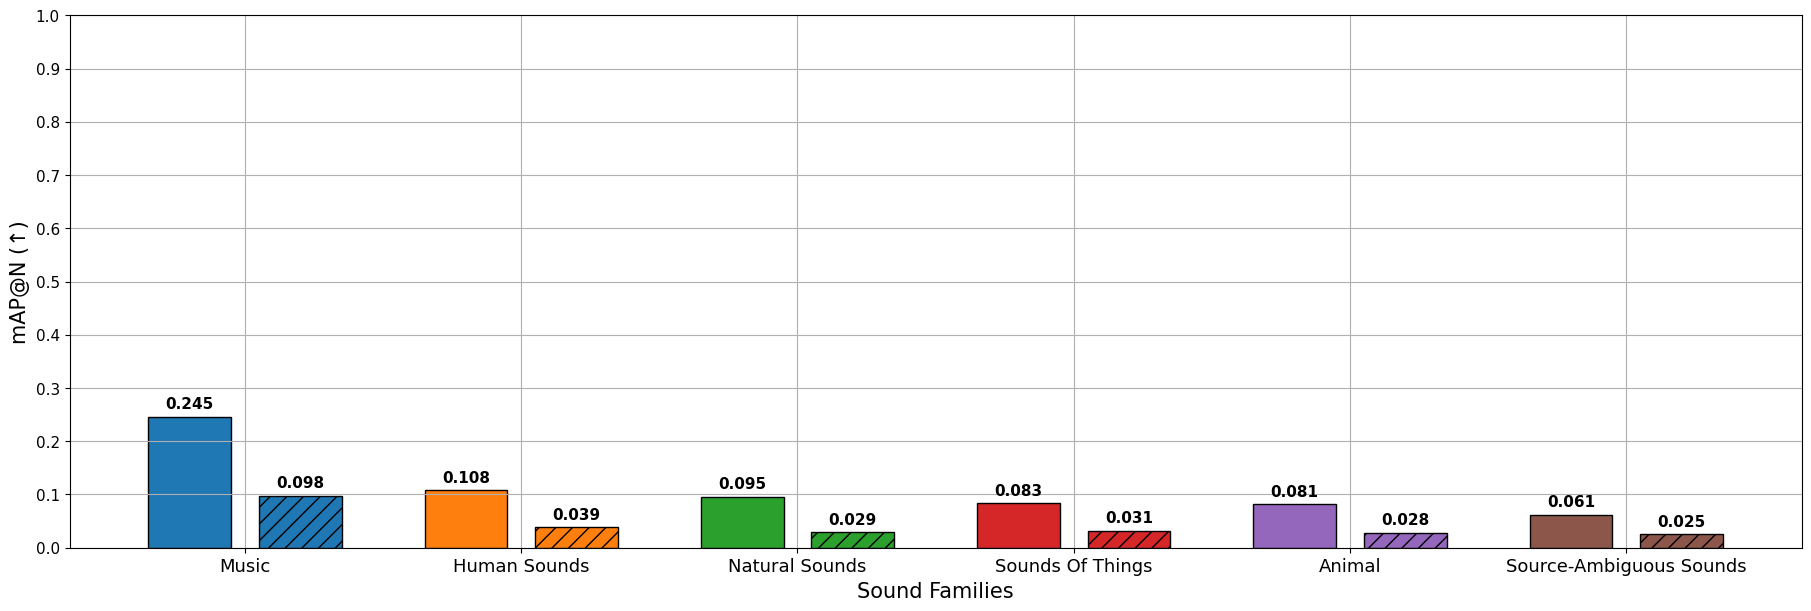

In [6]:
save_fig = False
for model in models:
    plot_map_at_15_150_for_families(model, use_fig_name=False, save_fig=save_fig, save_dir=os.path.join(save_dir_single, model[0]))

### Label

('fs-essentia-extractor_legacy', 'PCA_100', 'nn')


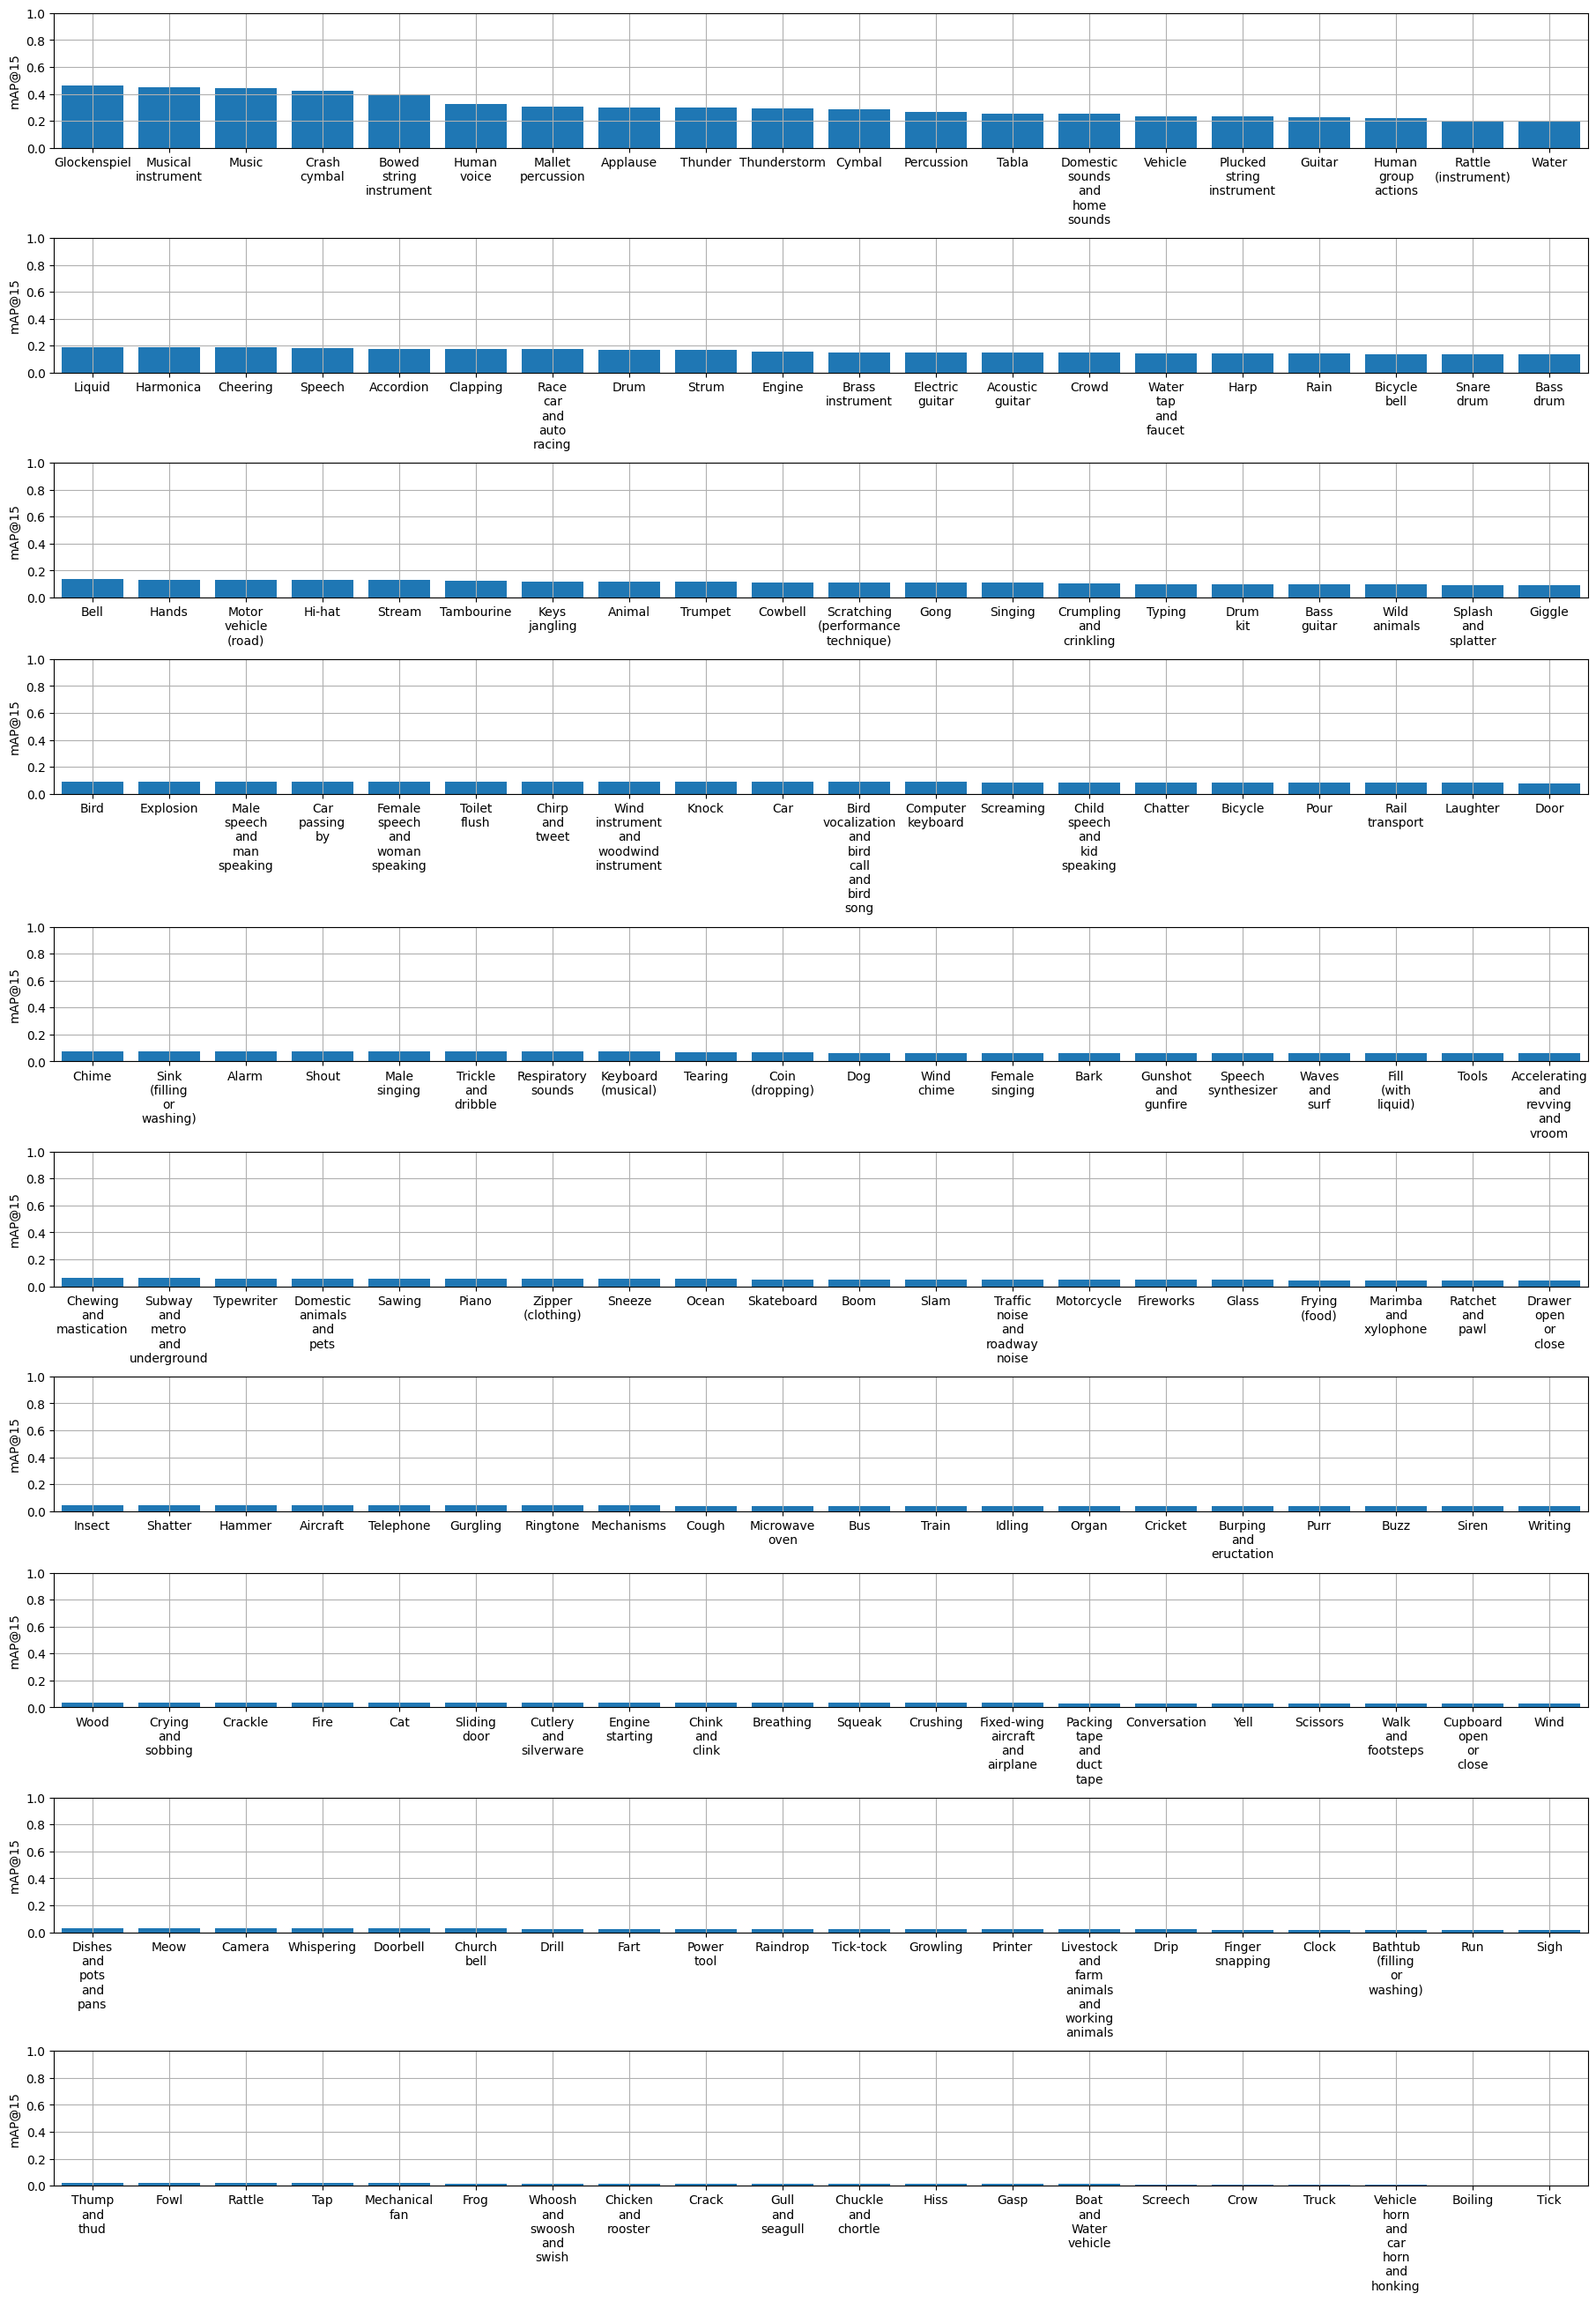

('audioset-yamnet-1', 'Agg_mean-PCA_100-Norm_True', 'nn')


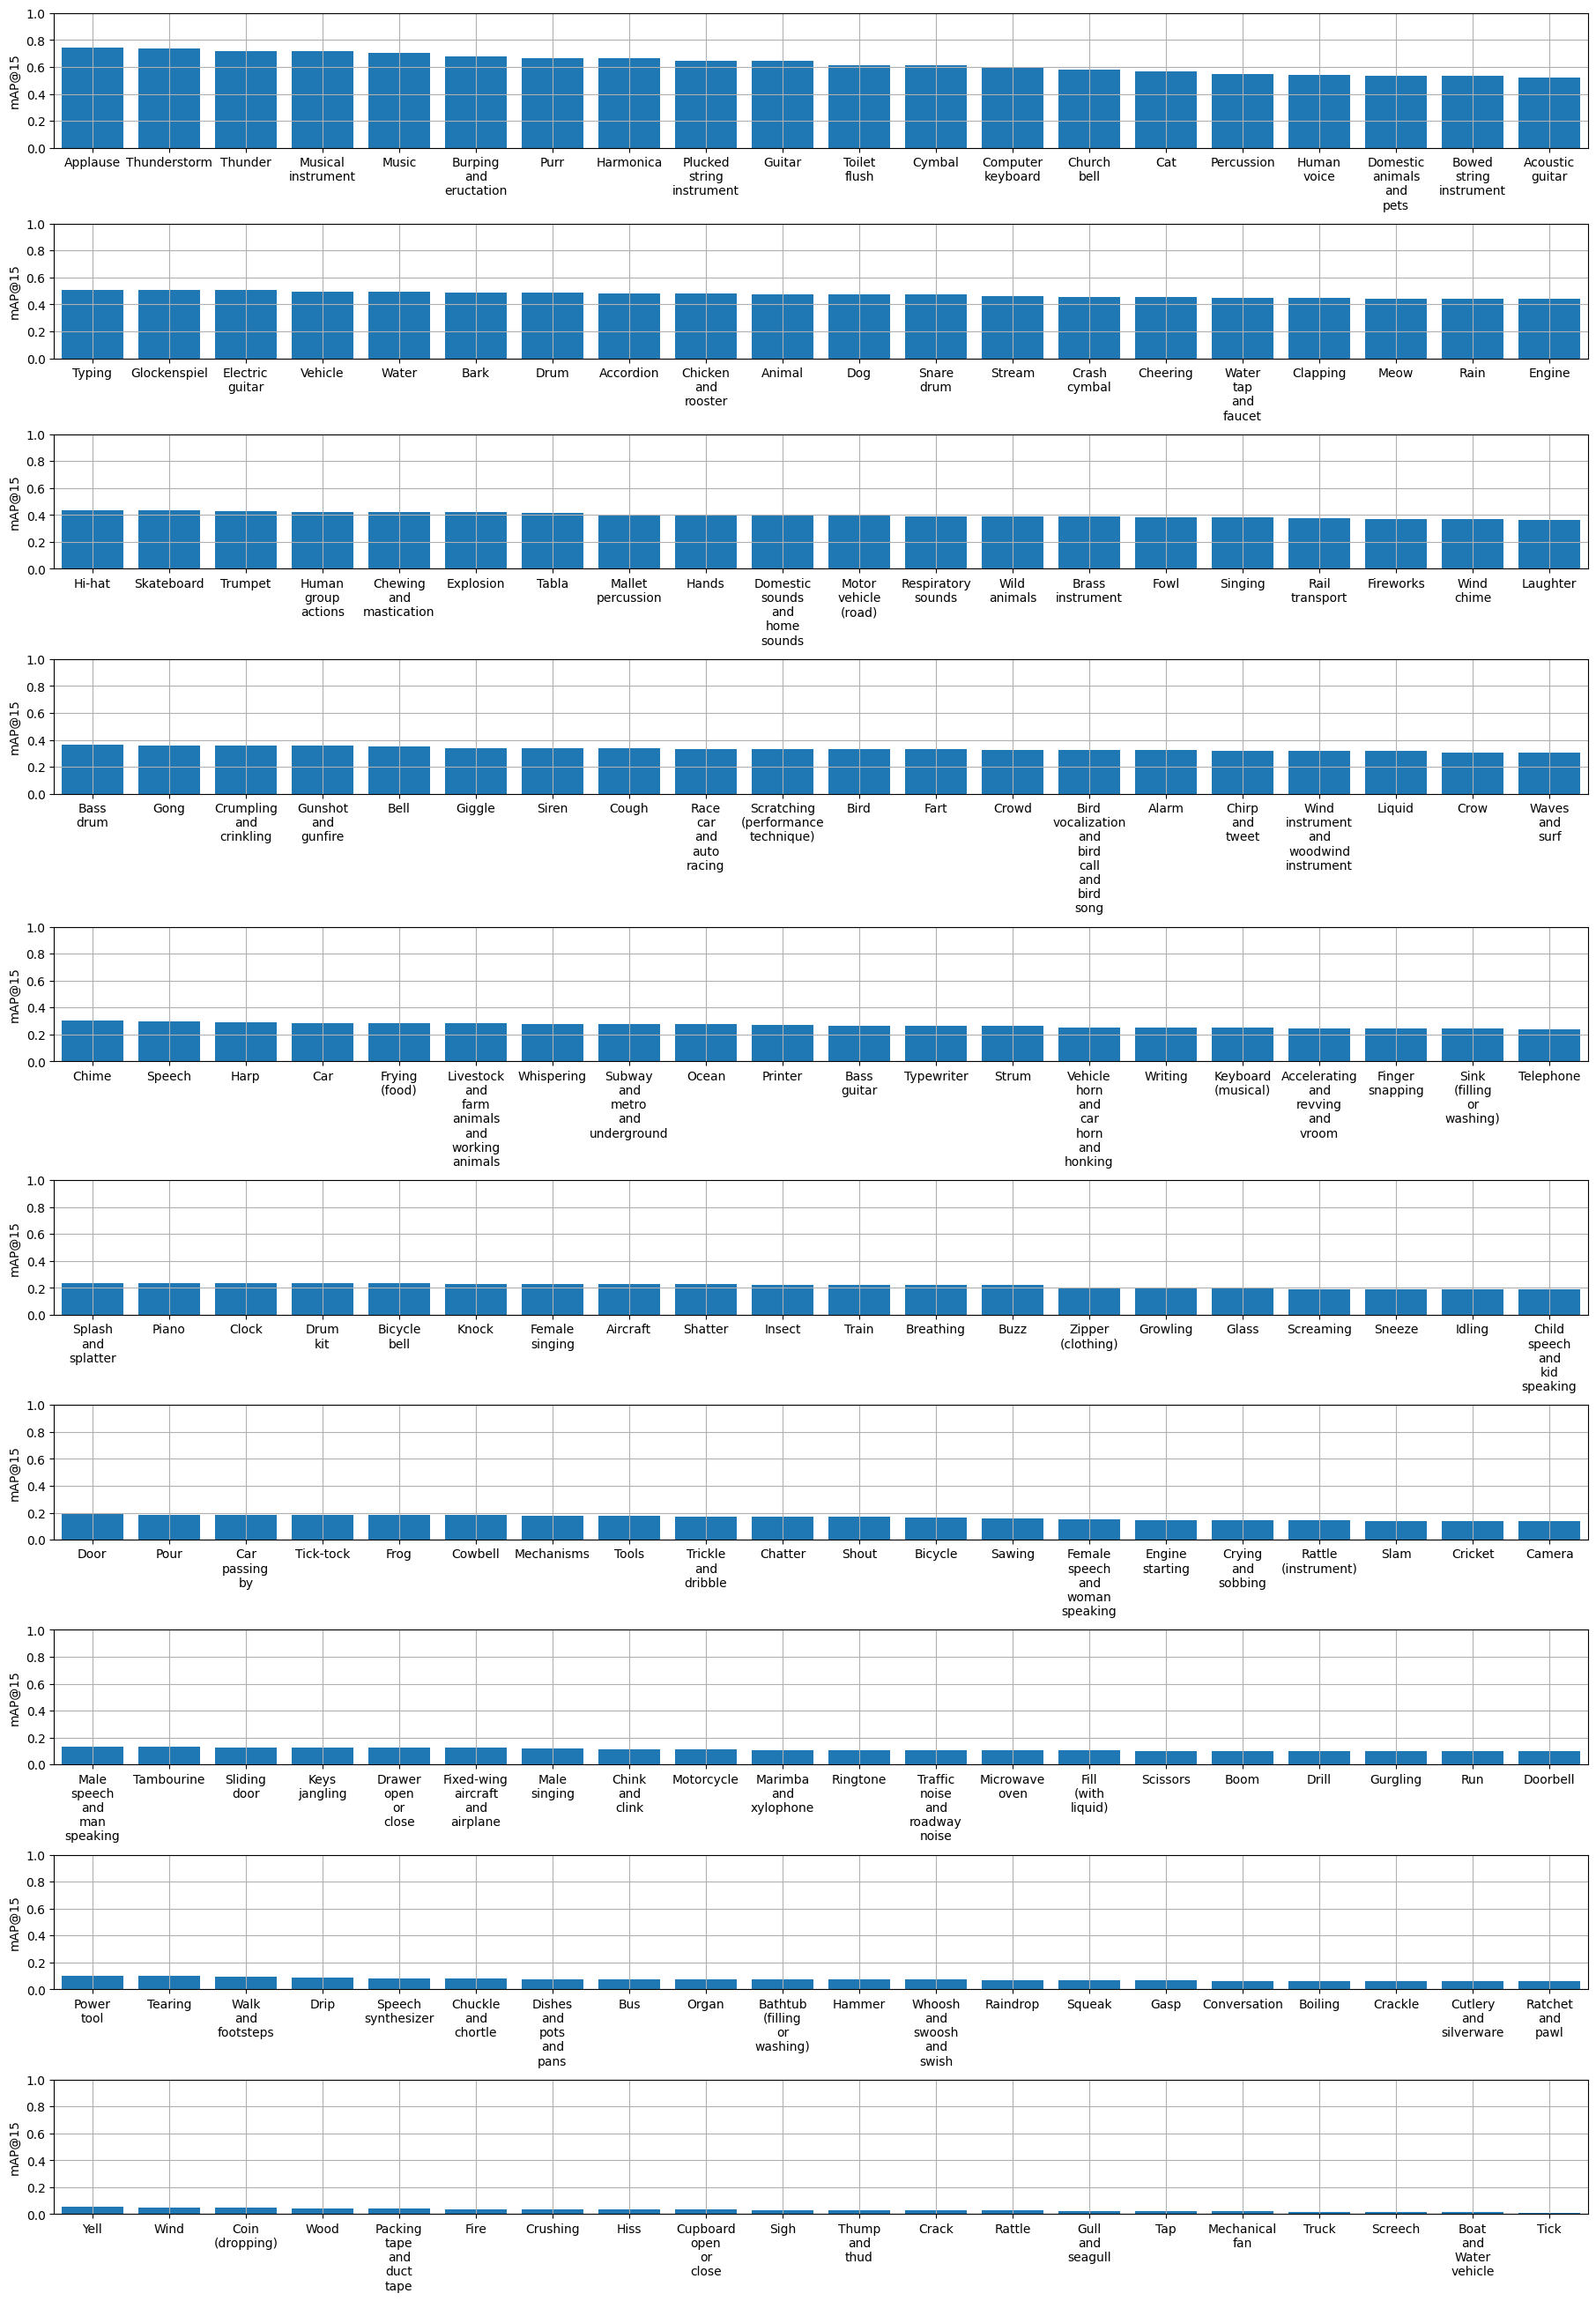

('audioset-vggish-3', 'Agg_mean-PCA_100-Norm_True', 'nn')


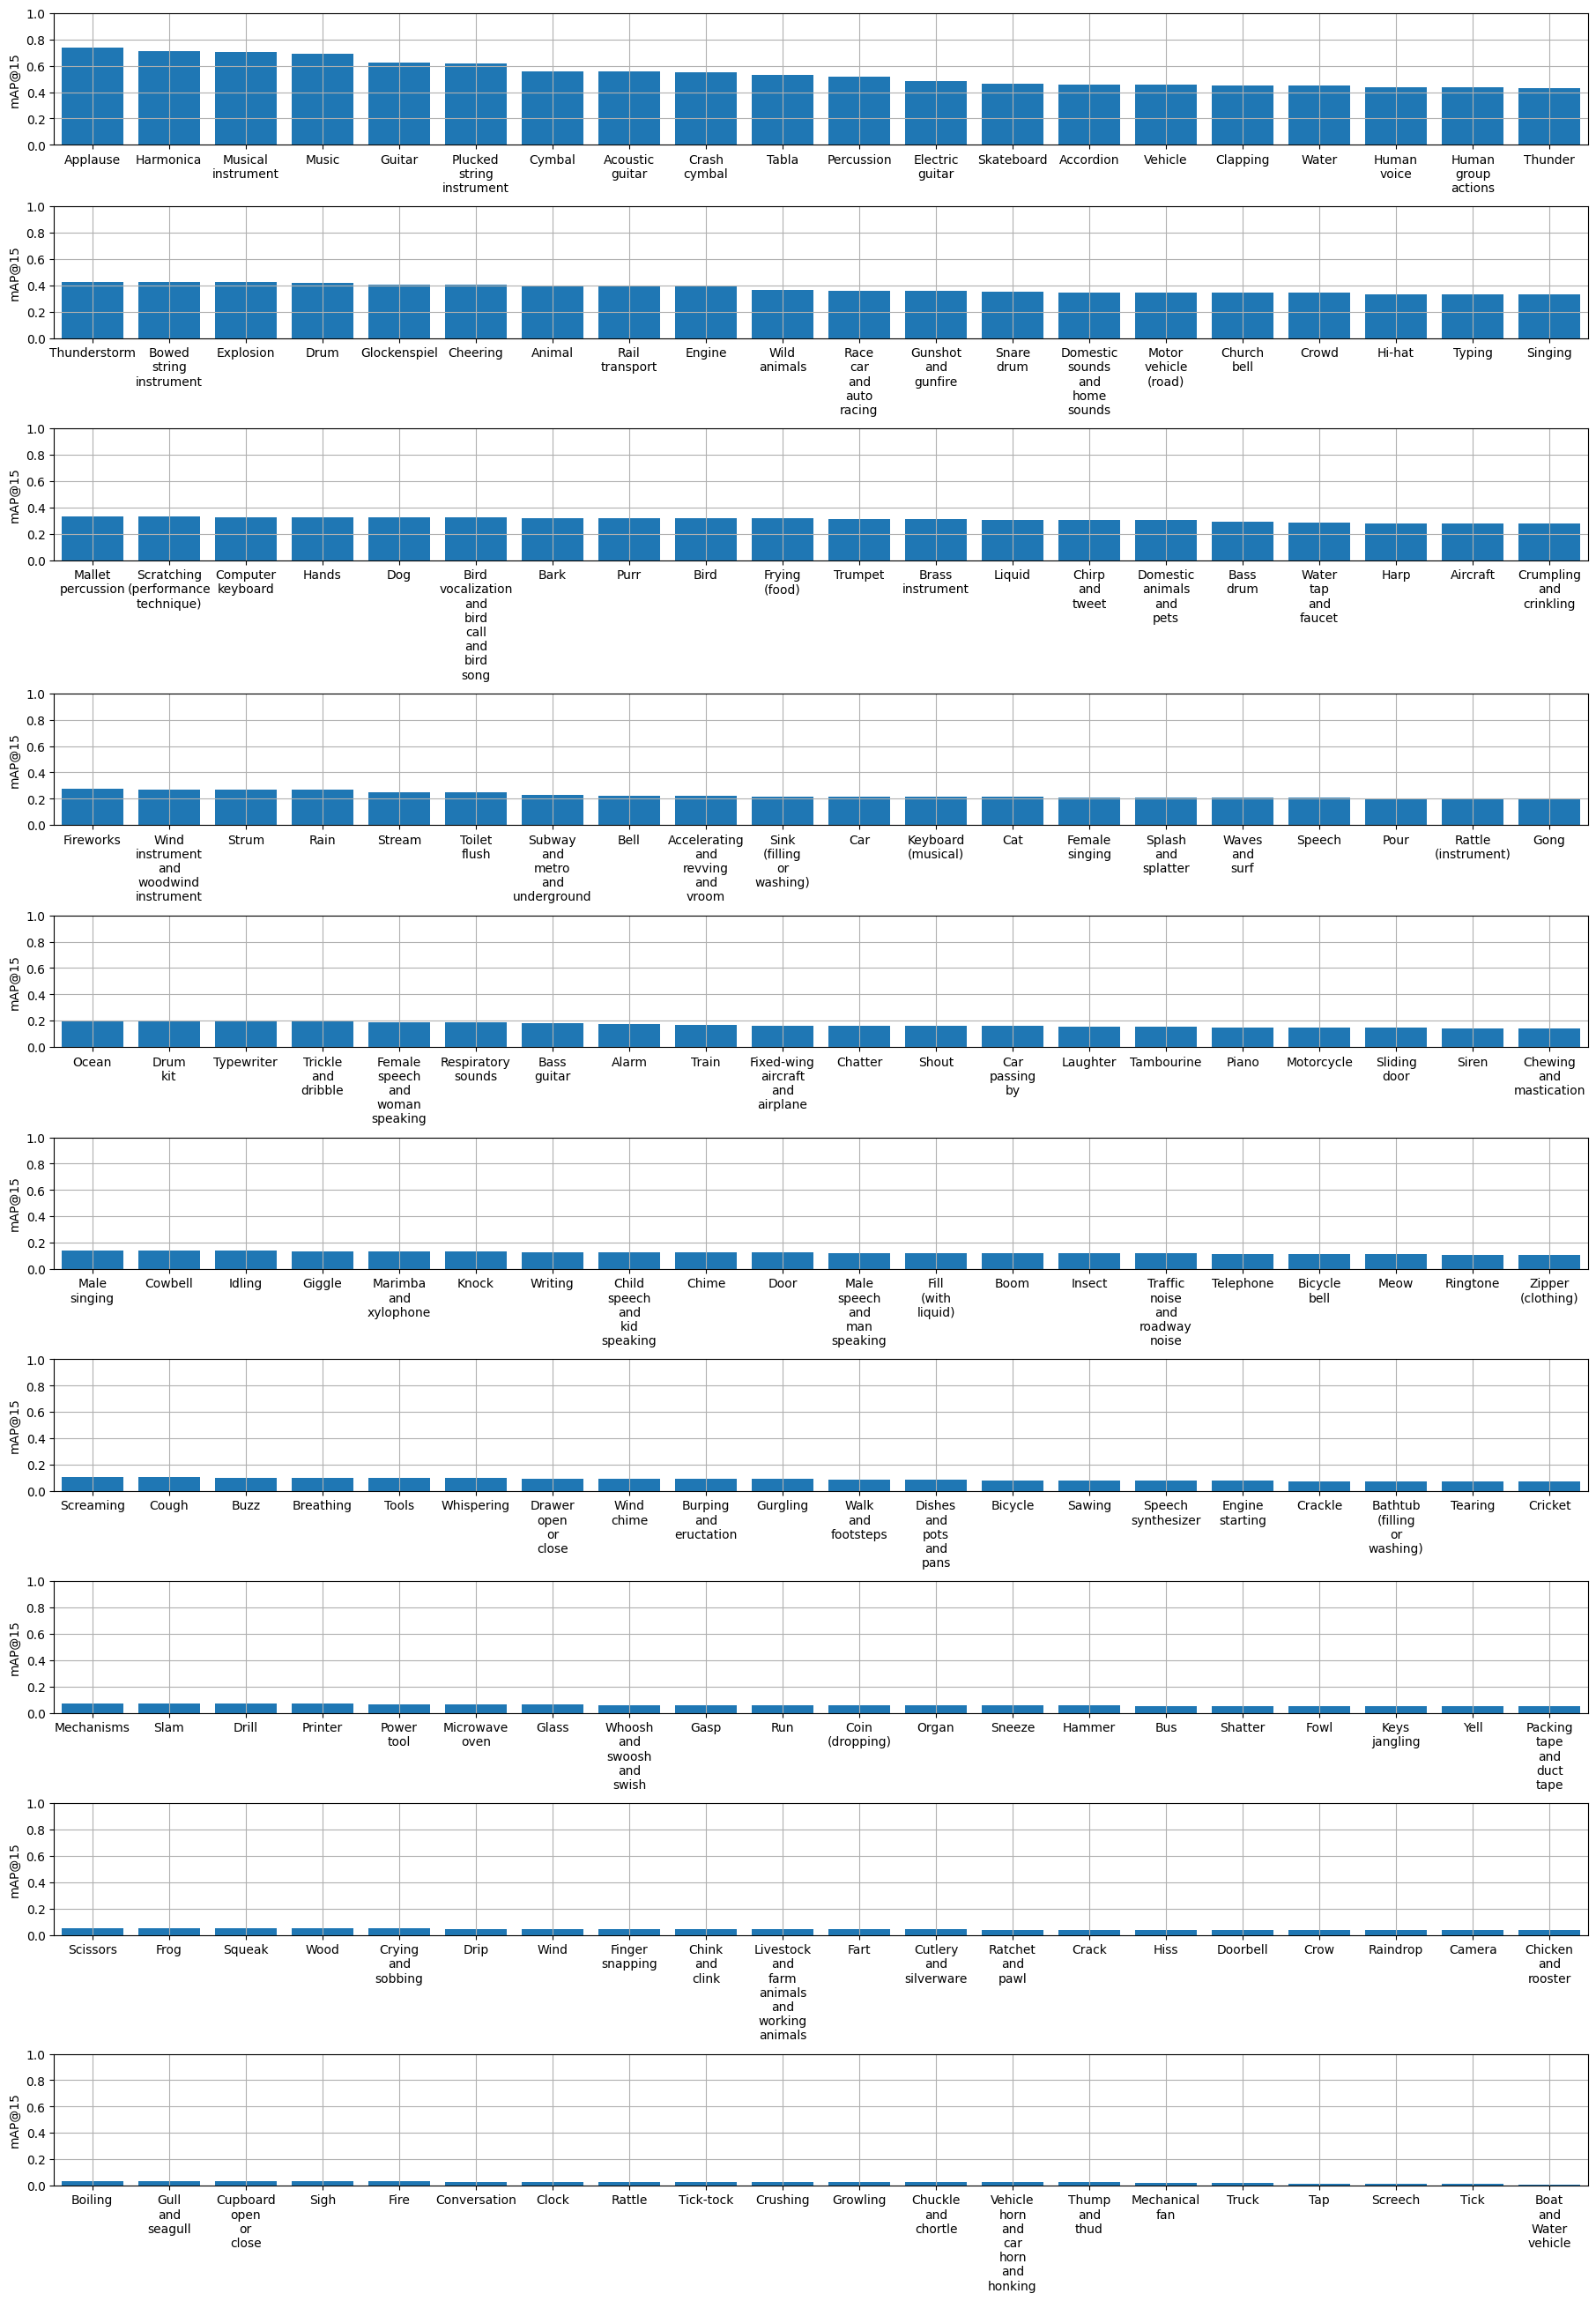

('fsd-sinet-vgg42-tlpf-1', 'Agg_mean-PCA_100-Norm_True', 'nn')


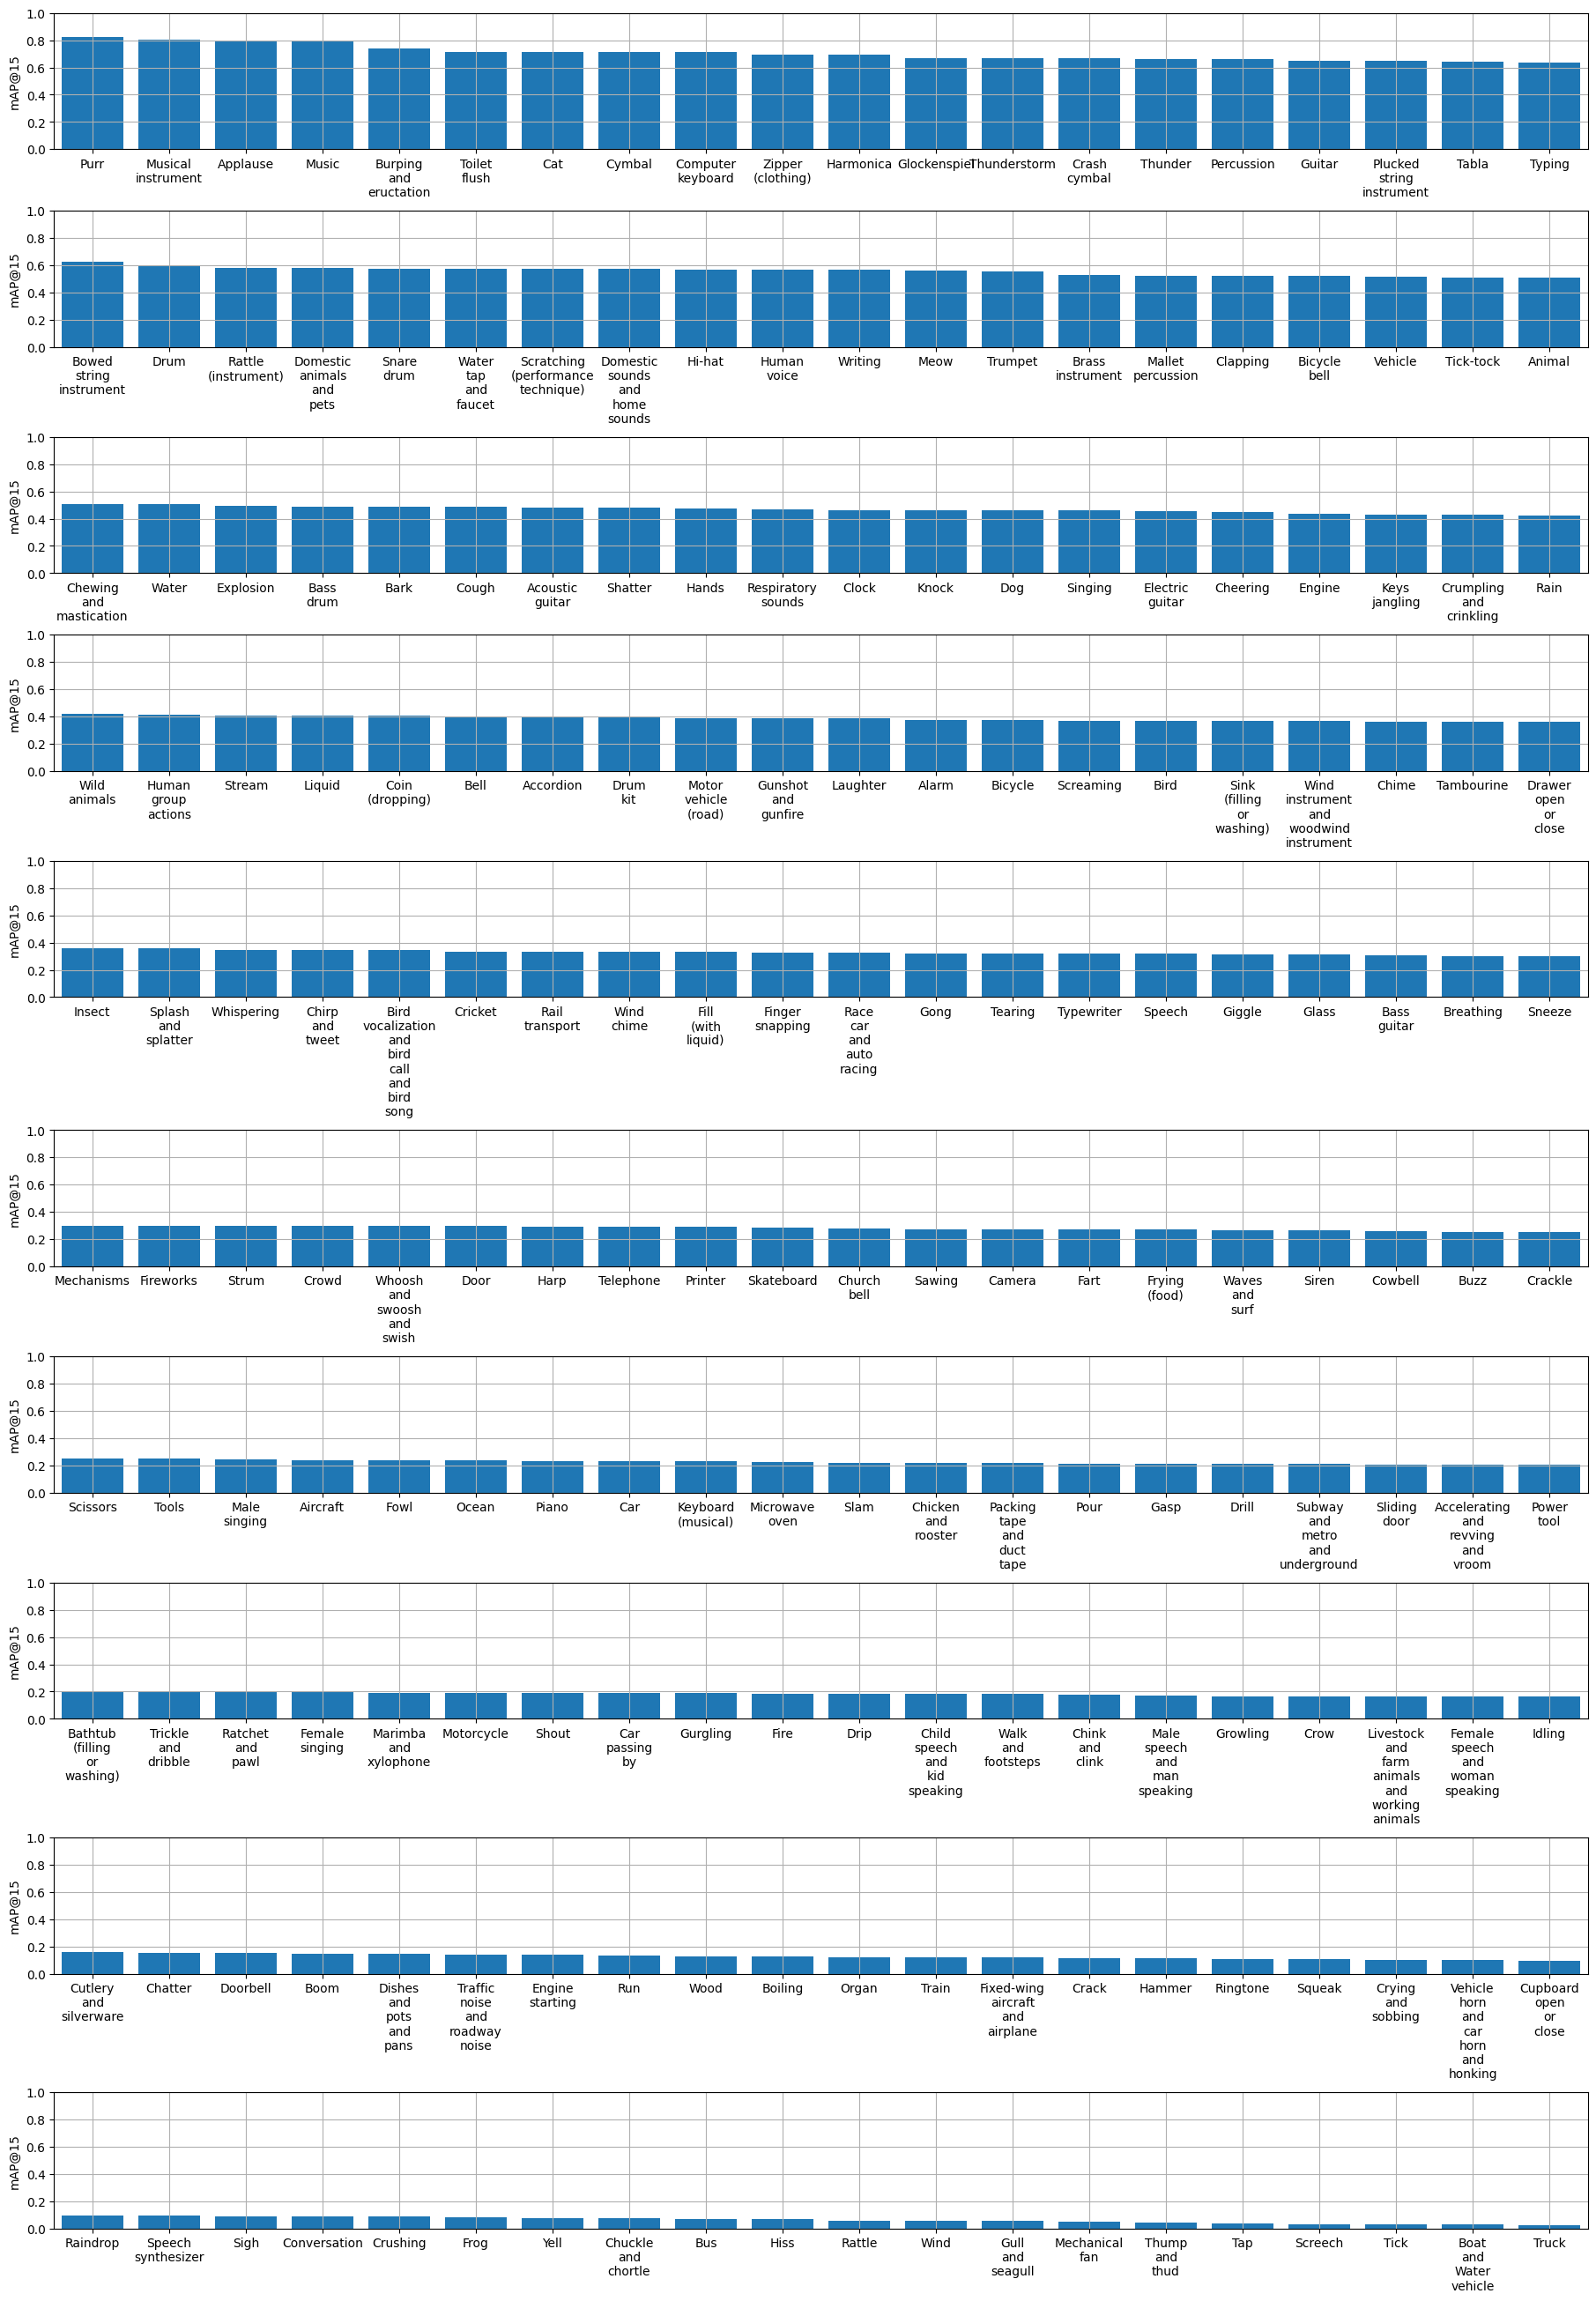

('openl3-env-mel256-emb512-3', 'Agg_mean-PCA_100-Norm_True', 'nn')


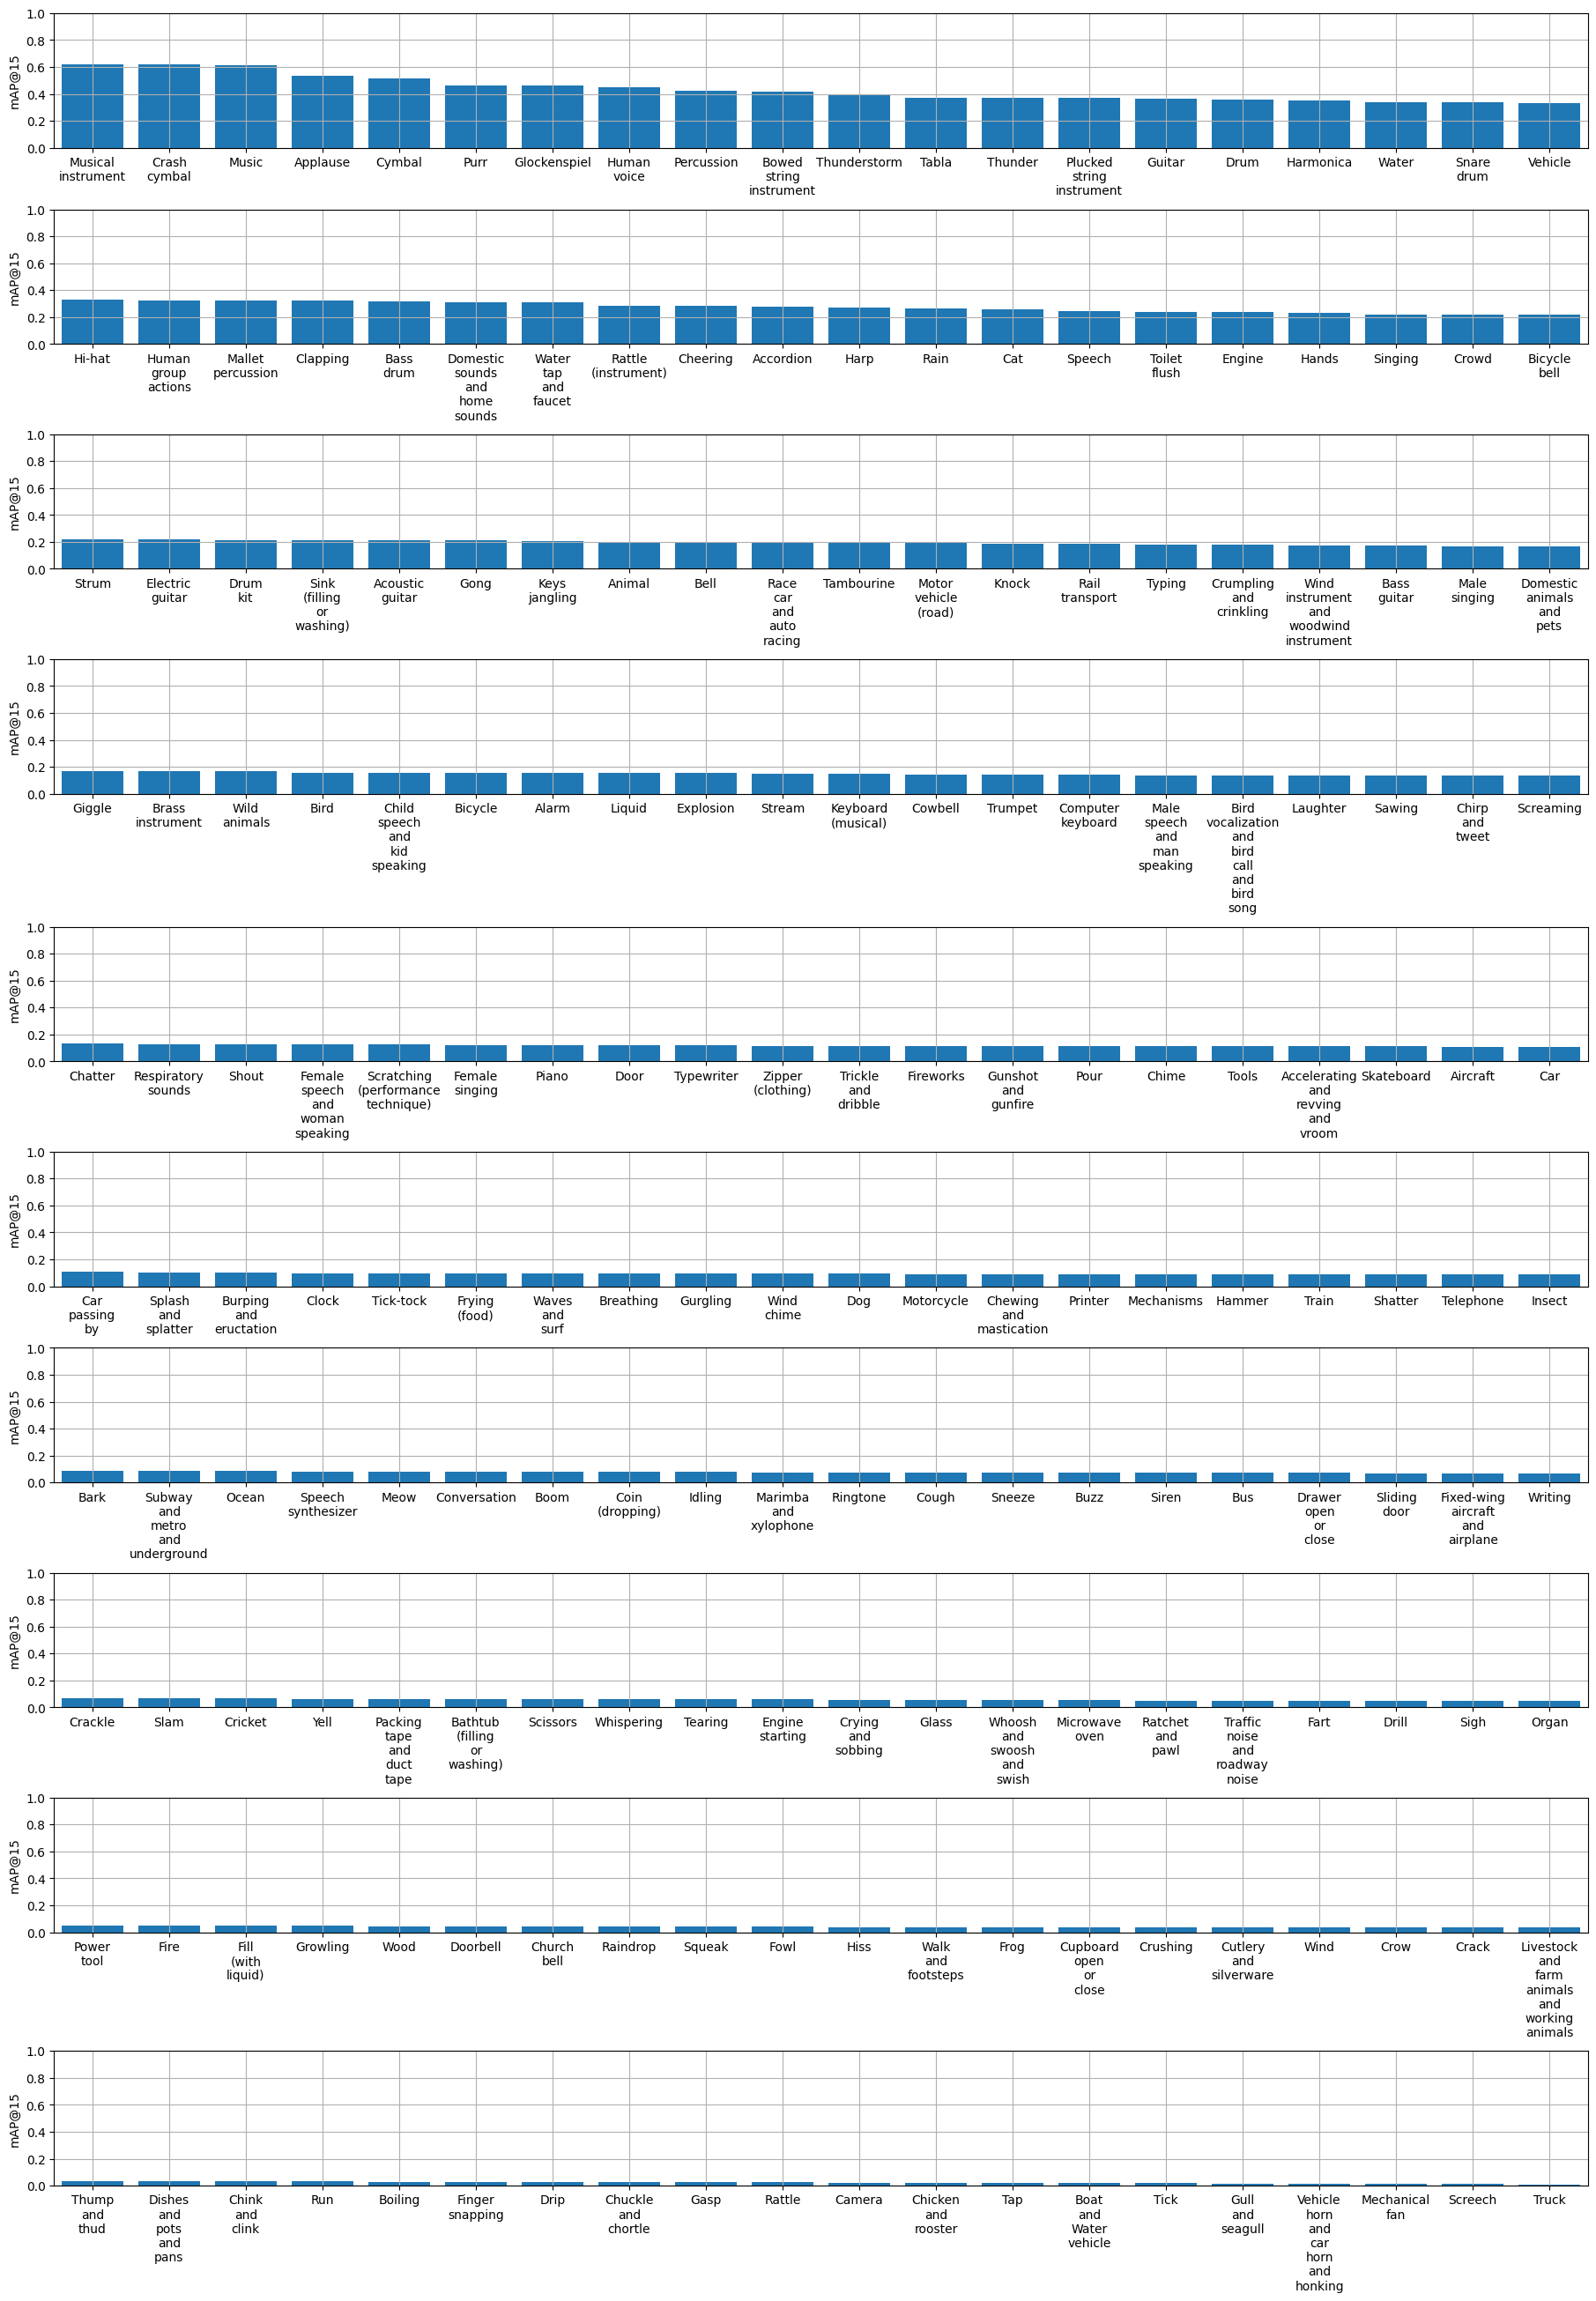

('clap-630k-fusion-best', 'Agg_none-PCA_100-Norm_True', 'nn')


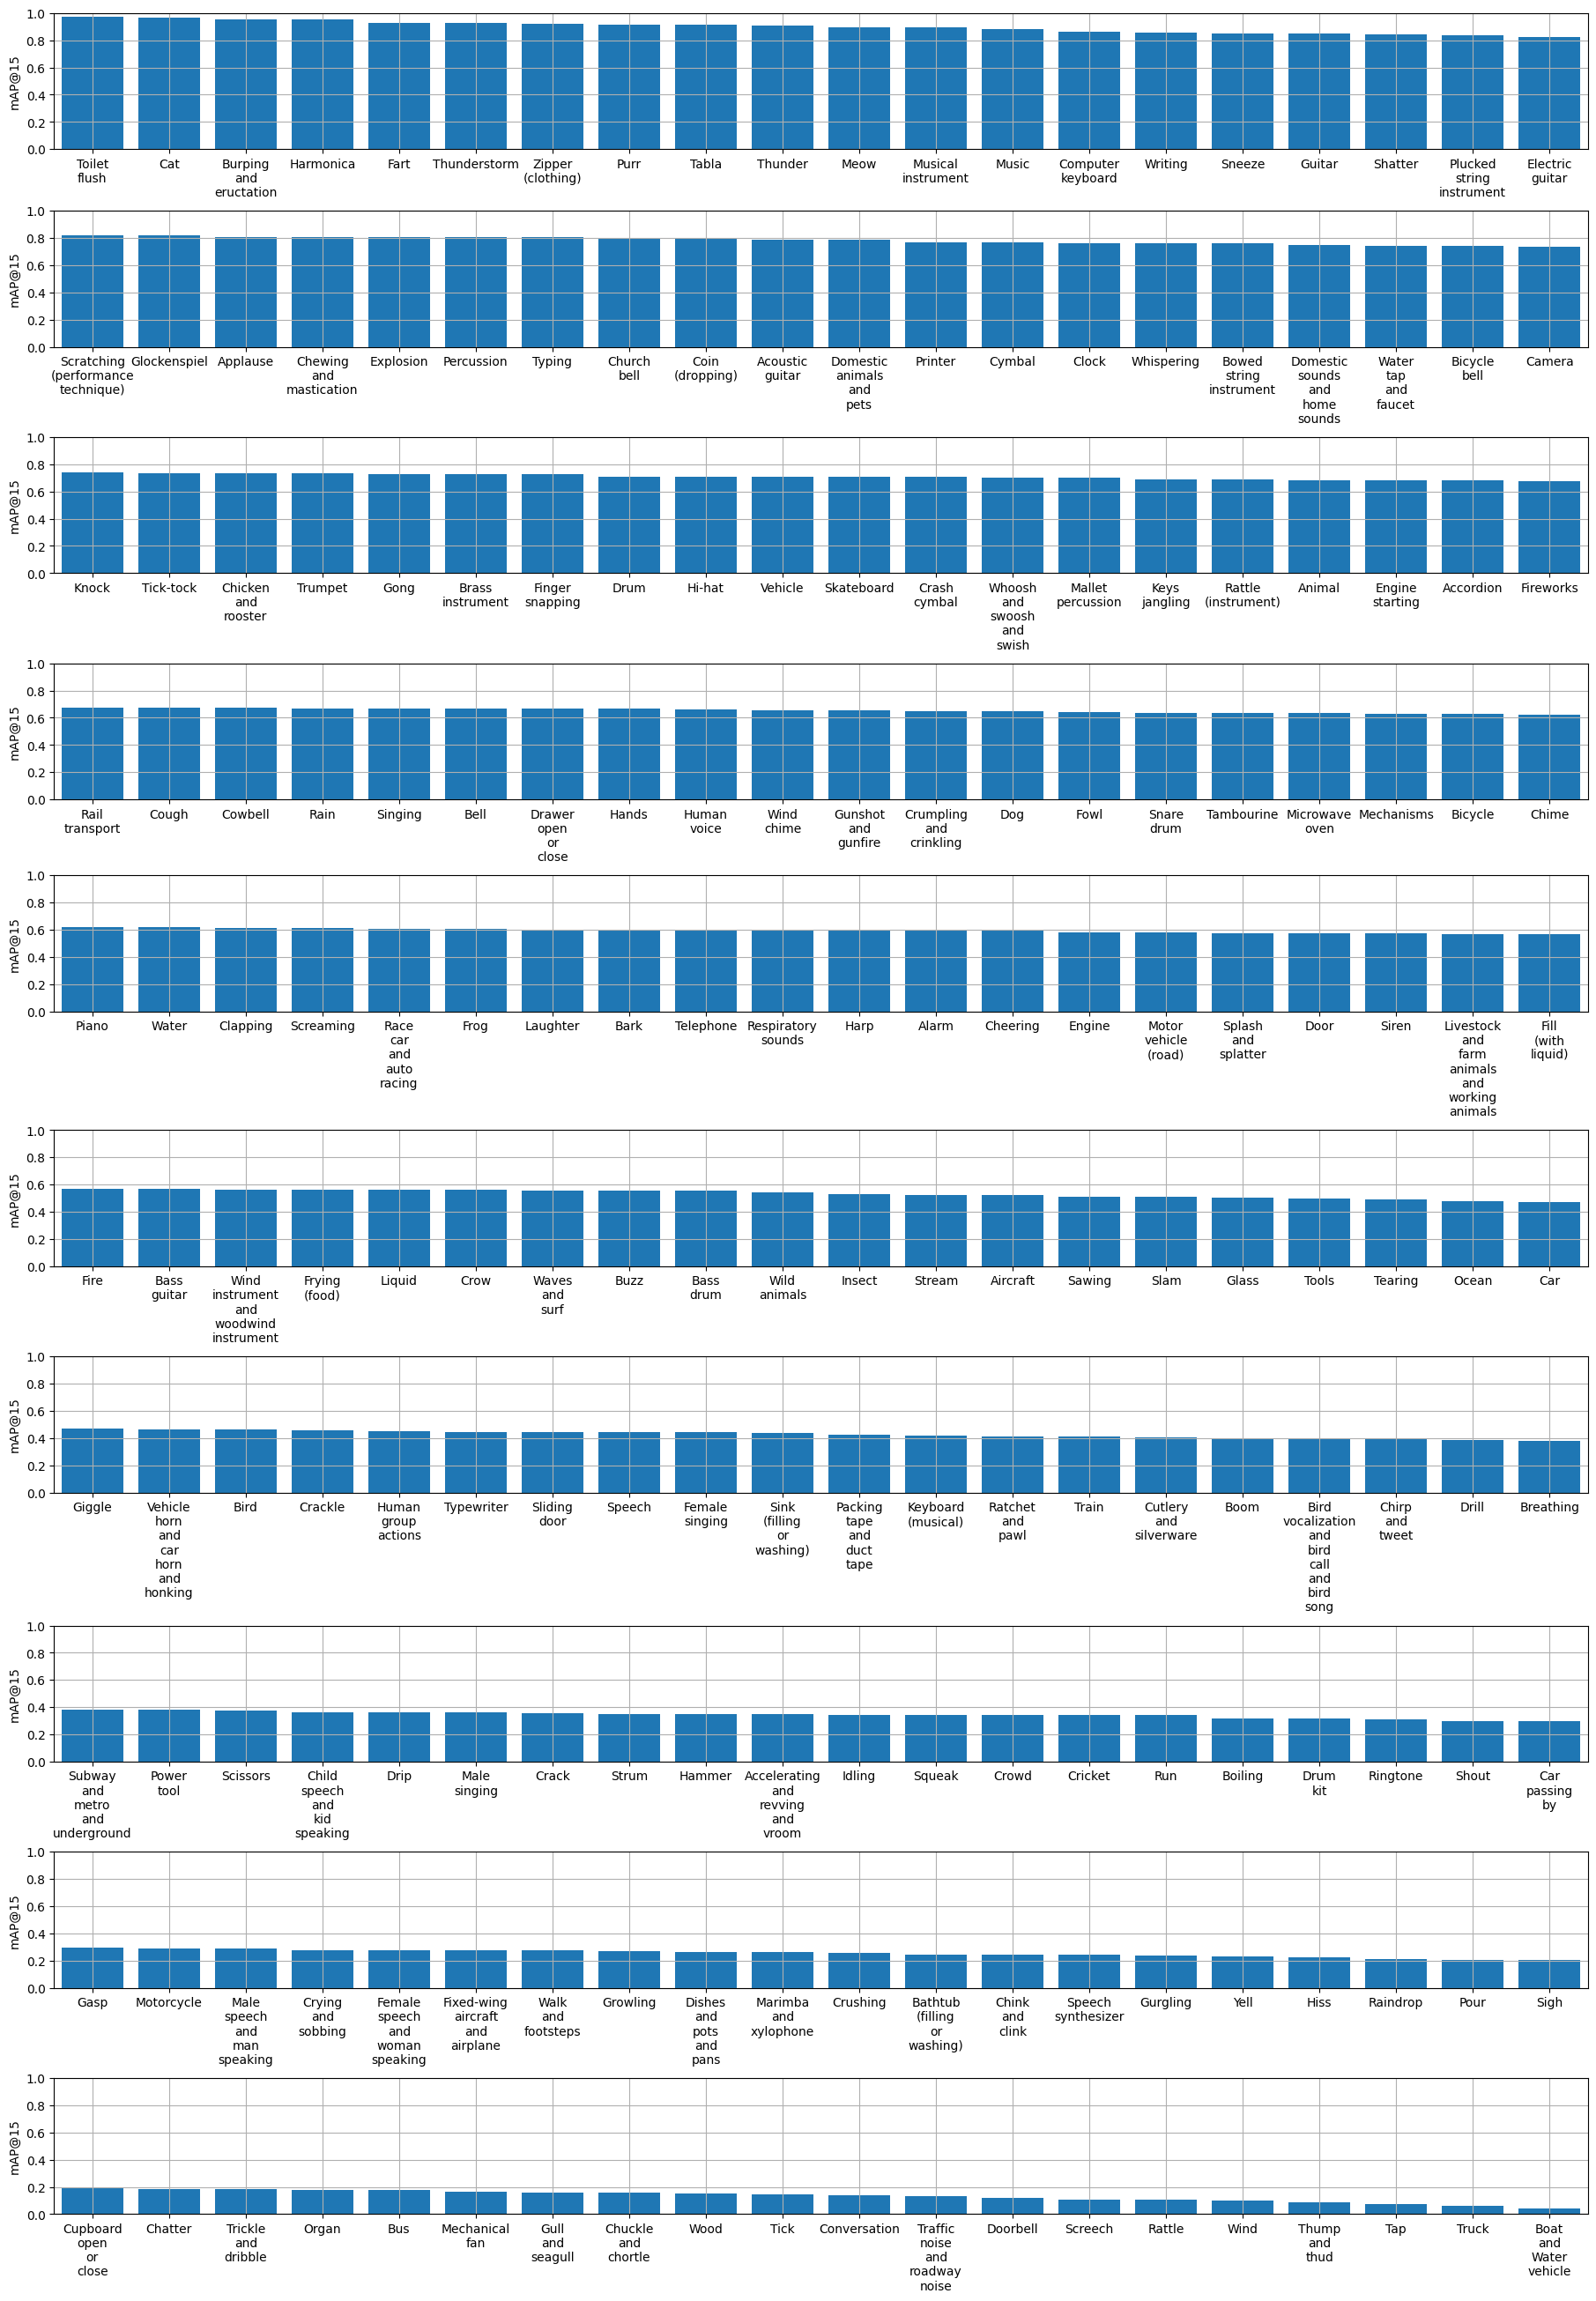

('imagebind_huge', 'Agg_none-PCA_100-Norm_True', 'nn')


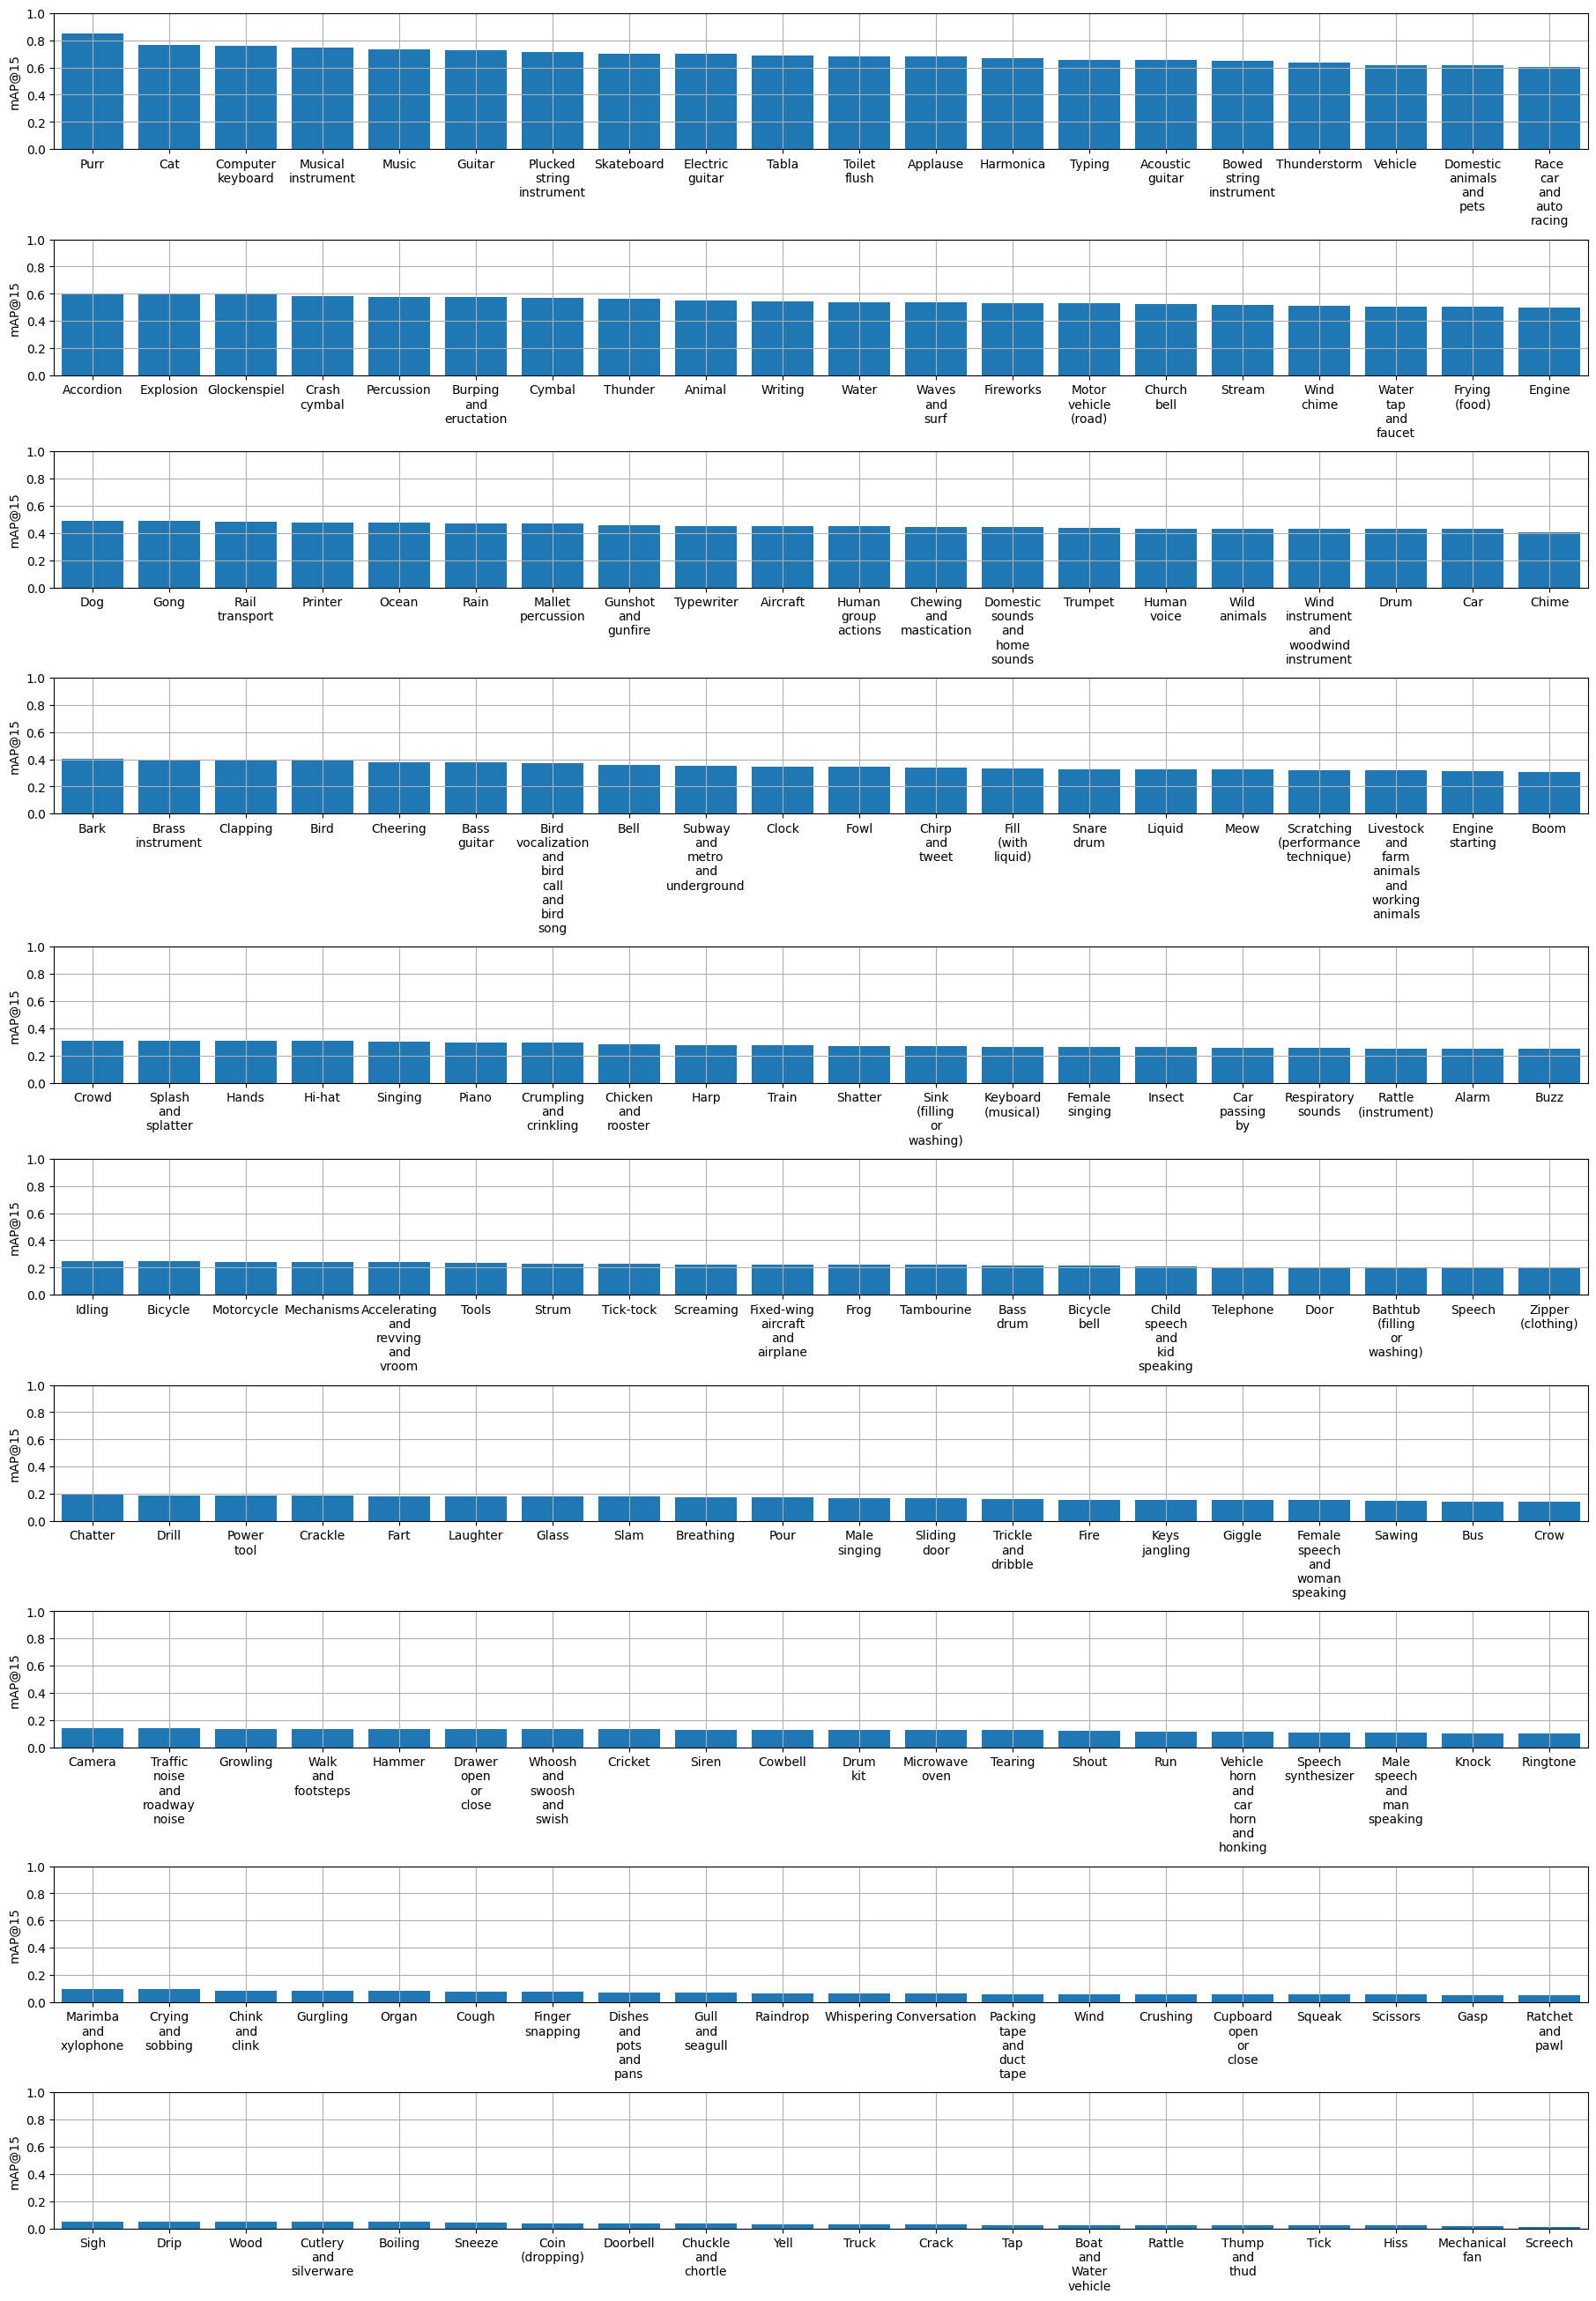

('AudioCLIP-Full-Training', 'Agg_none-PCA_100-Norm_True', 'nn')


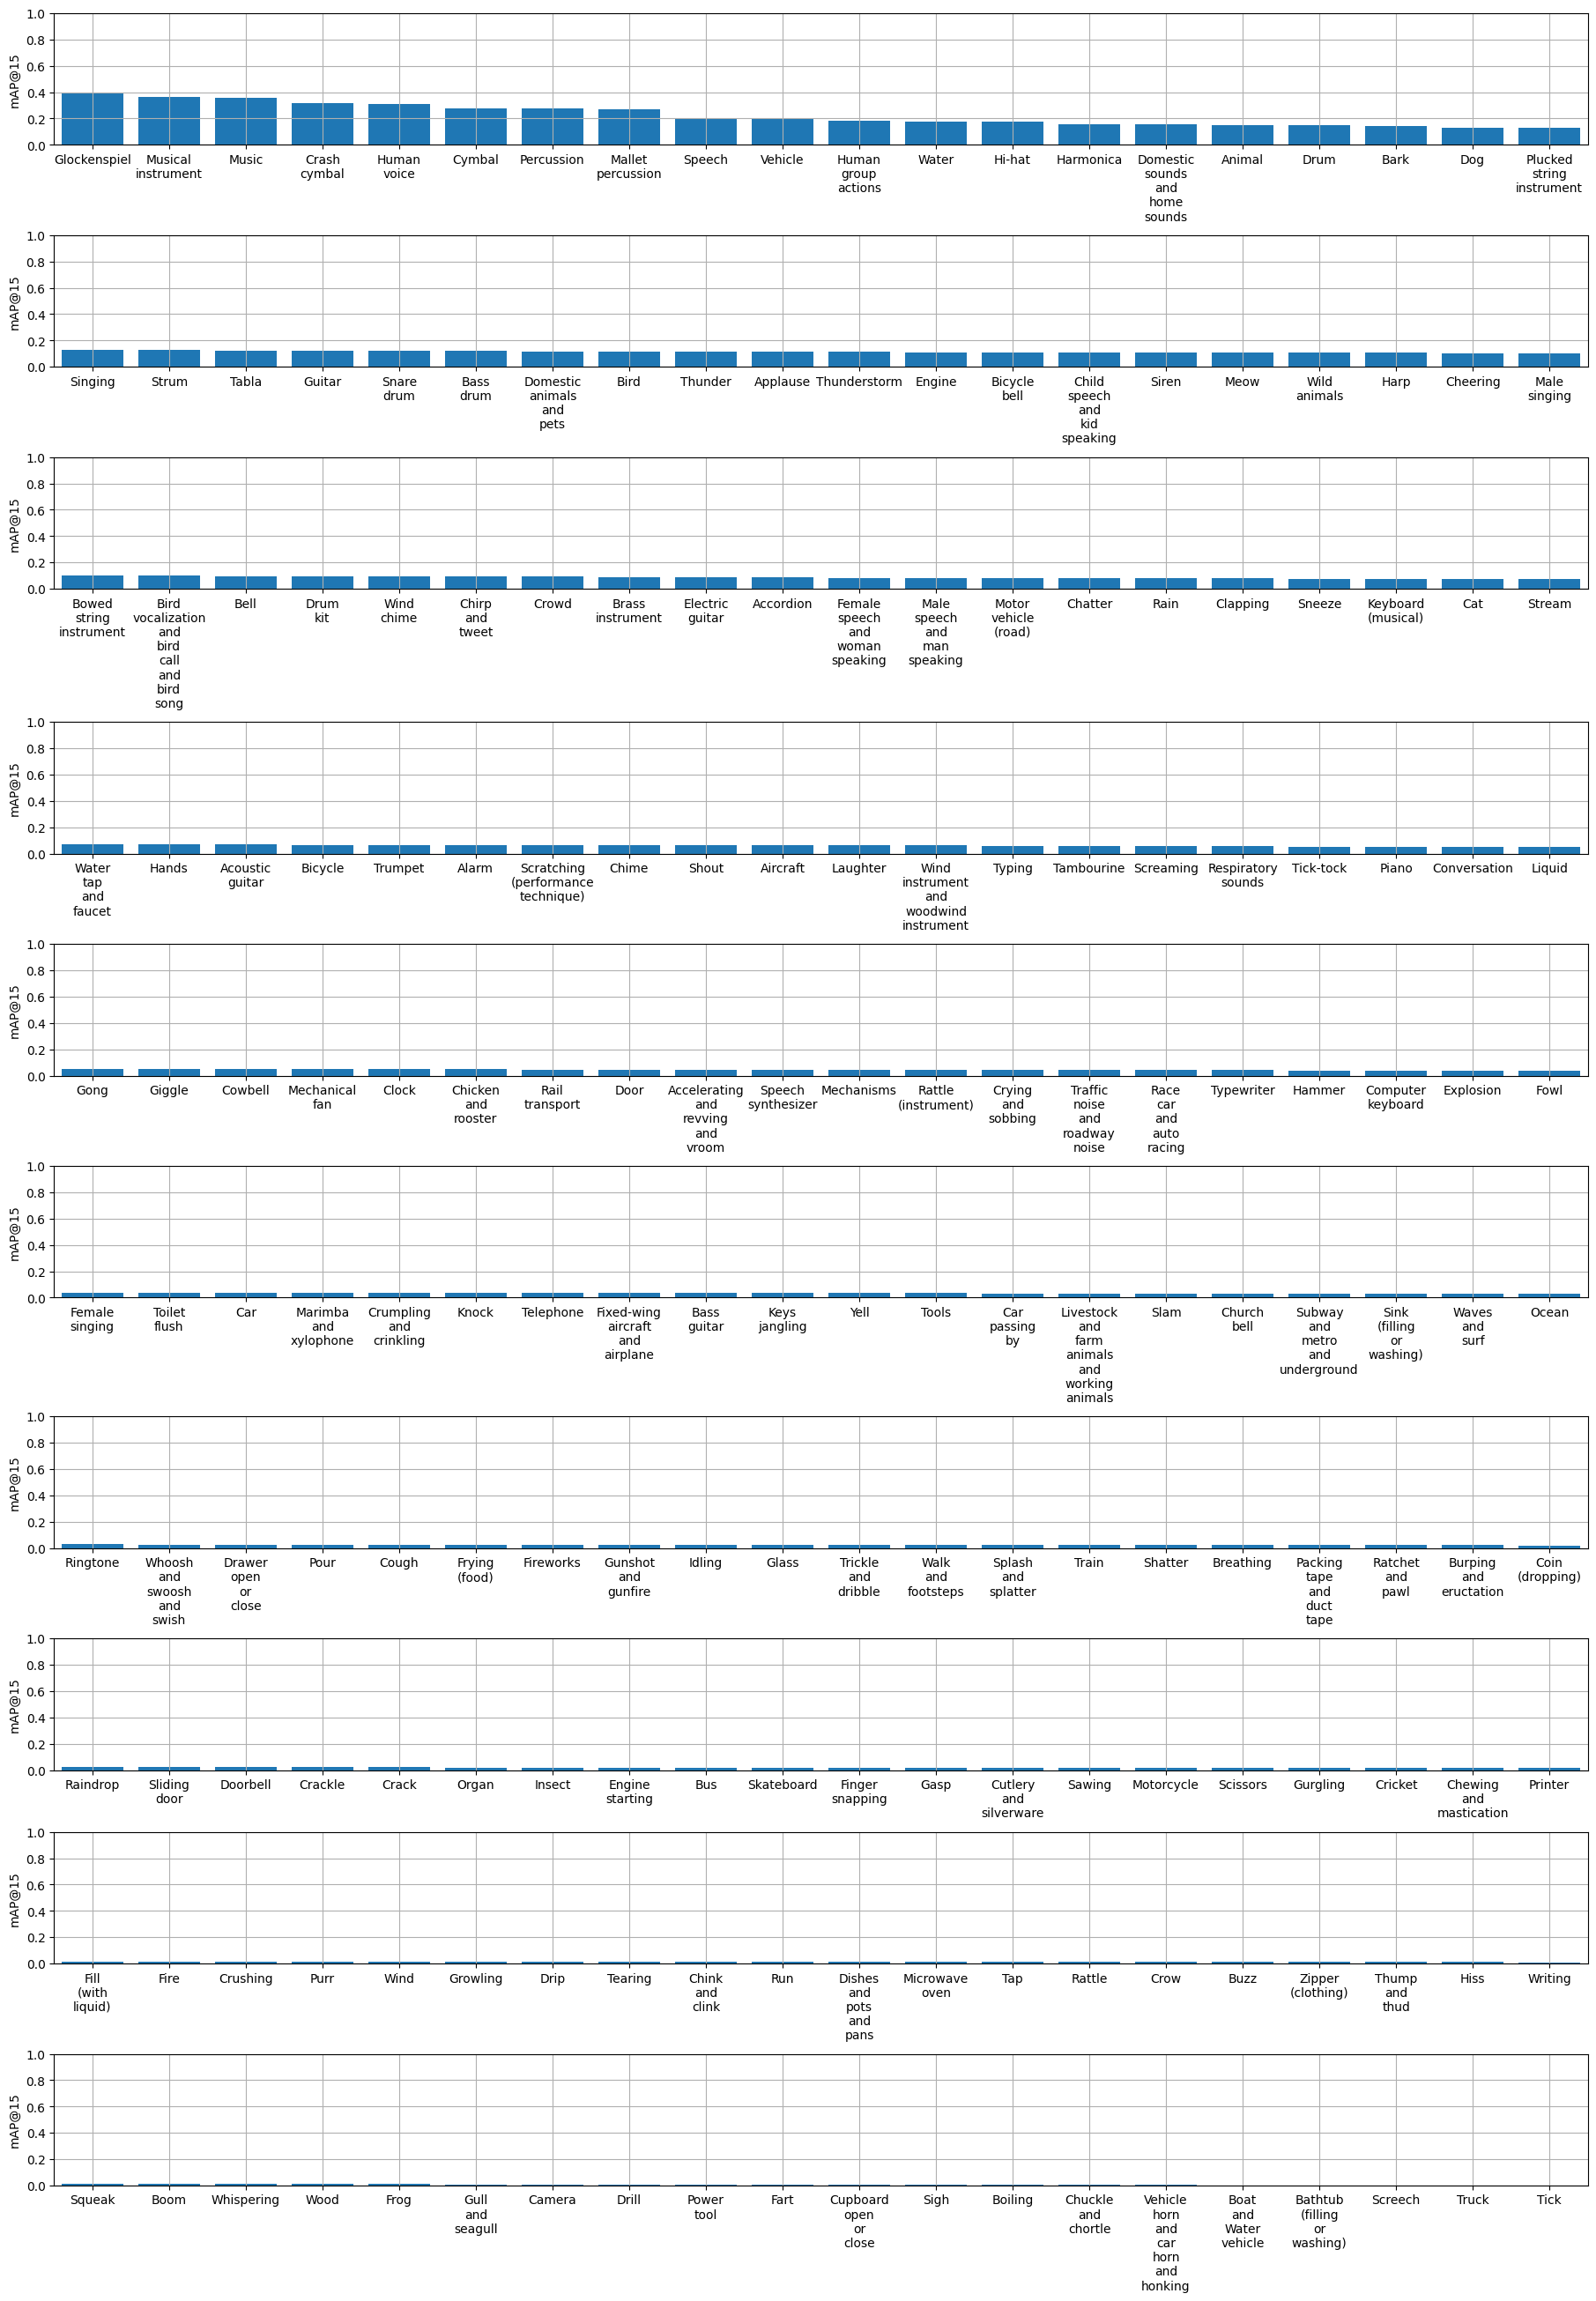

('Wav2CLIP', 'Agg_none-PCA_100-Norm_True', 'nn')


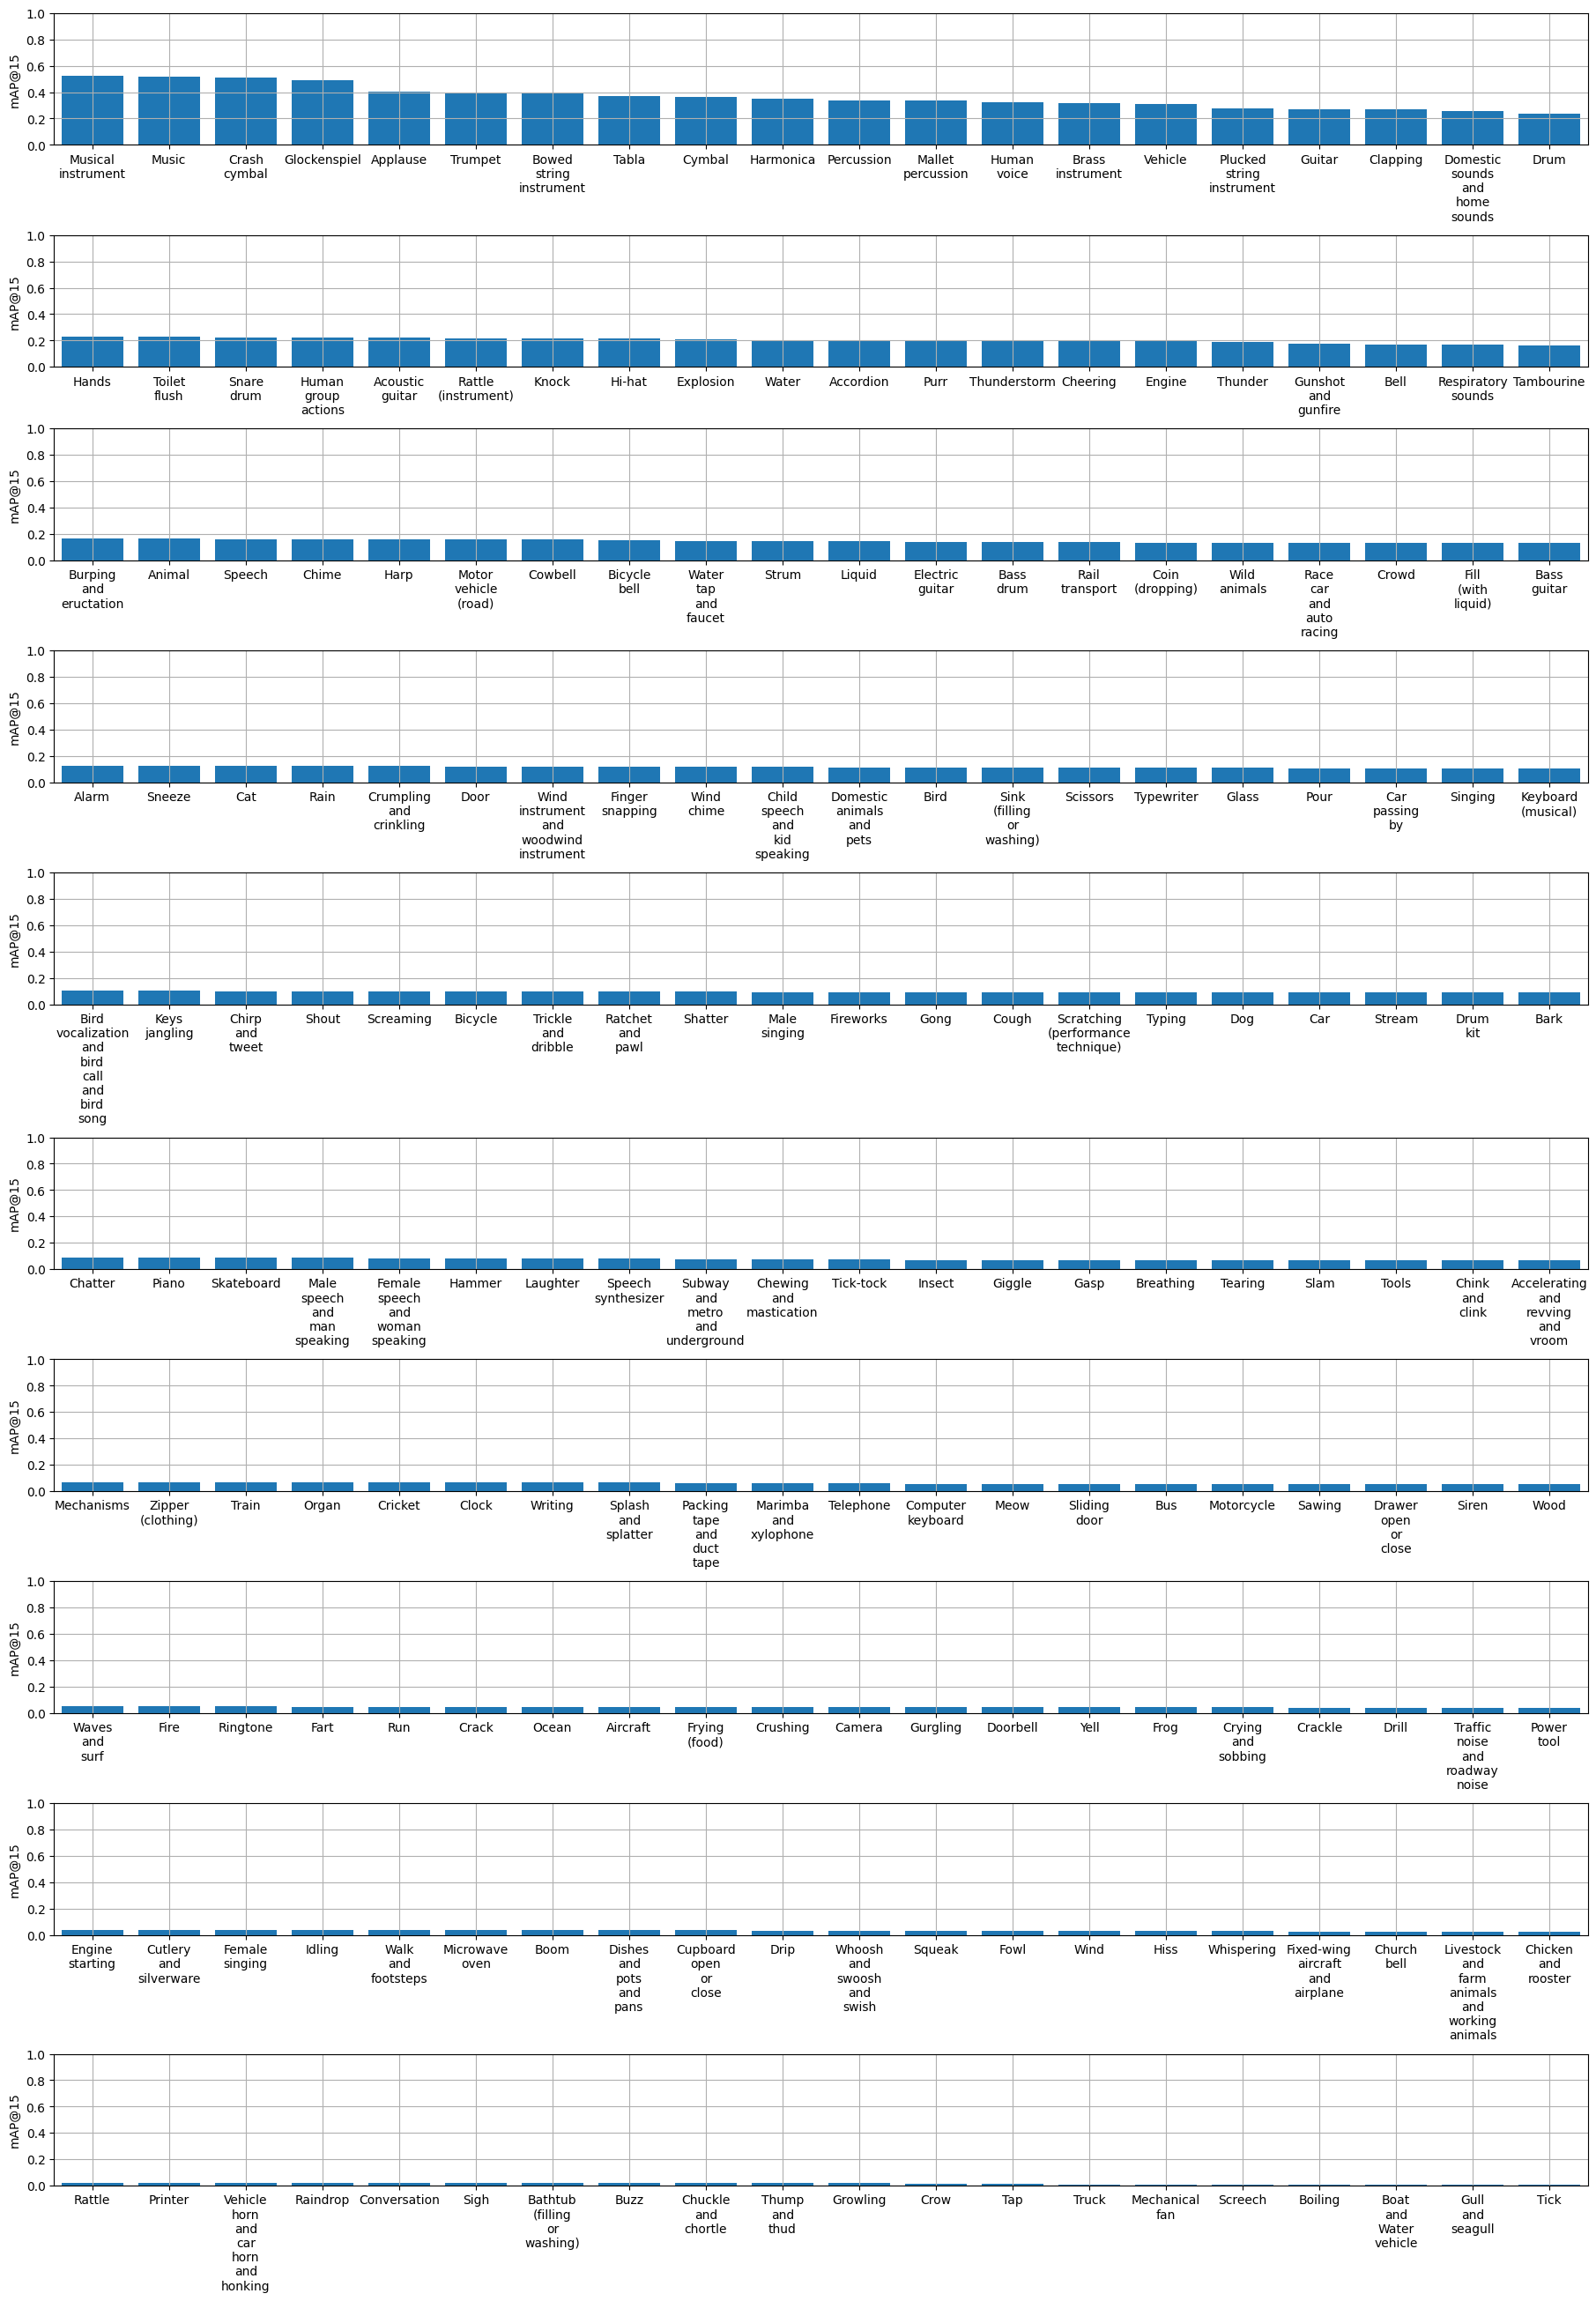

In [7]:
save_fig = False
for model in models:
    print(model)
    plot_map_at_15_for_all_labels(model, use_fig_name=False, save_fig=save_fig, save_dir=os.path.join(save_dir_single, model[0]))

### Total-composite for All variations

Saving figure to /home/roguz/freesound/freesound-perceptual_similarity/data/figures/paper/single_models/fsd-sinet-vgg42-tlpf-1-large/macro_map@15-comparisons.png


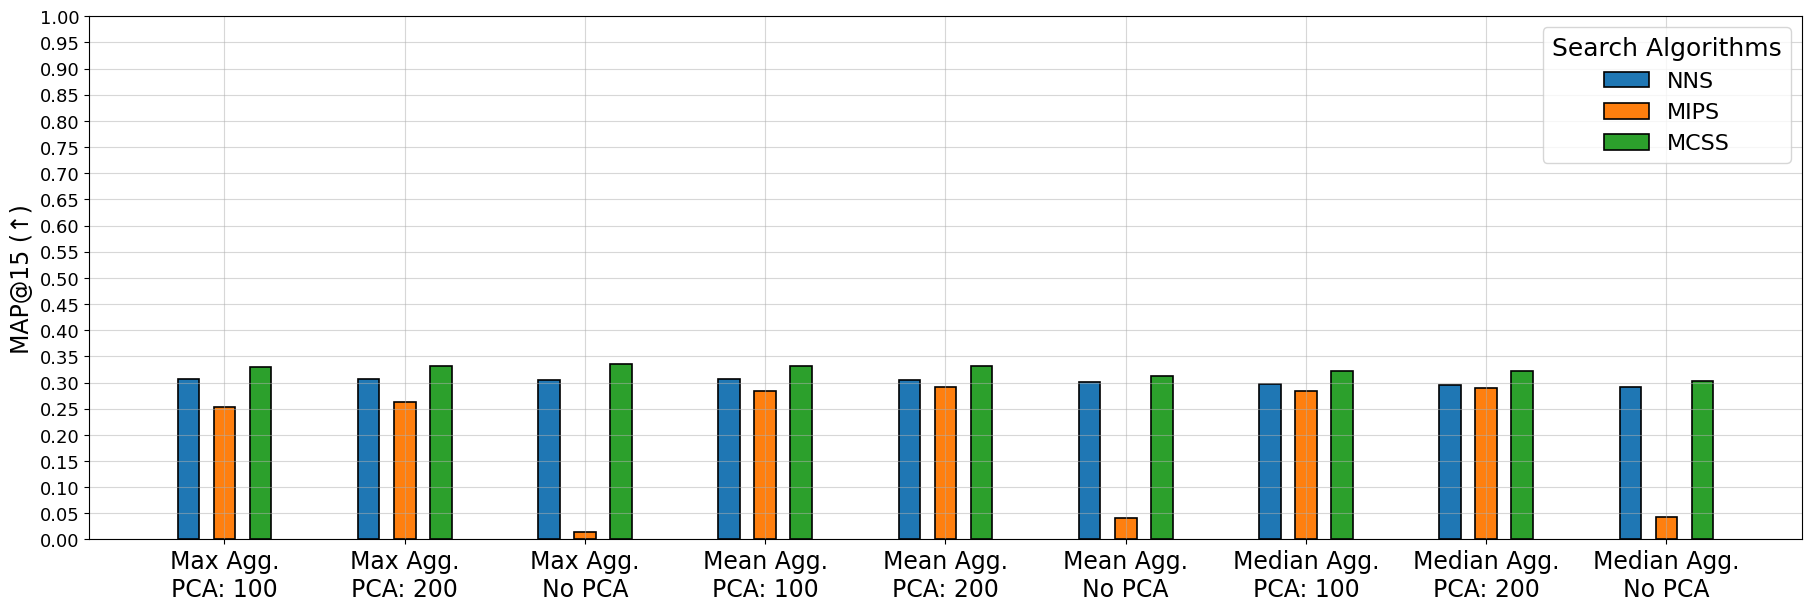

In [10]:
model = (
    "fsd-sinet-vgg42-tlpf-1", 
    suffix_agg,
    search
    )

plot_map_at_15_comparisons(model[0], "macro", map_precision=3, use_fig_name=False, presentation_mode=True, save_fig=True, save_dir=os.path.join(save_dir_single, model[0]+'-large'))

audioset-yamnet-1
Saving figure to /home/roguz/freesound/freesound-perceptual_similarity/data/figures/paper/single_models/audioset-yamnet-1/macro_map@15-comparisons.png


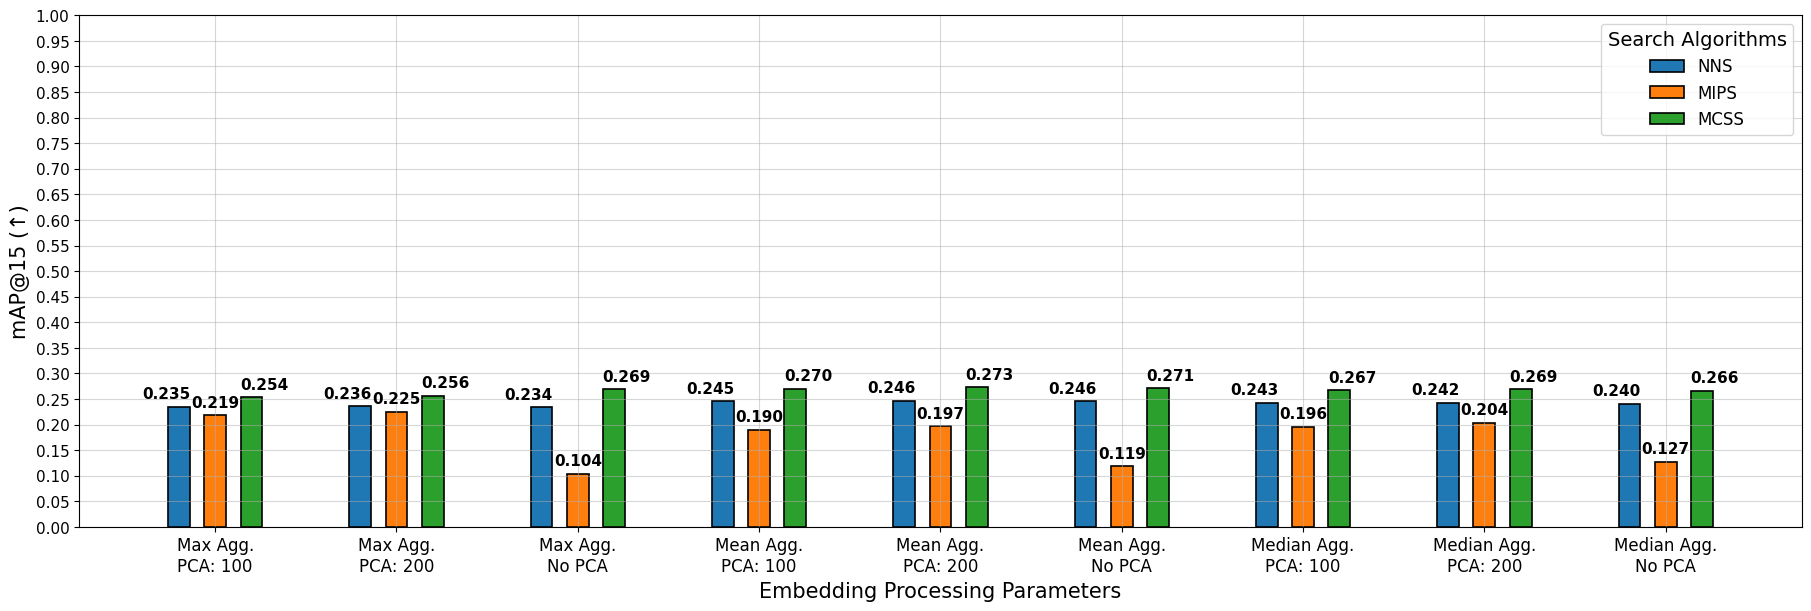

audioset-vggish-3
Saving figure to /home/roguz/freesound/freesound-perceptual_similarity/data/figures/paper/single_models/audioset-vggish-3/macro_map@15-comparisons.png


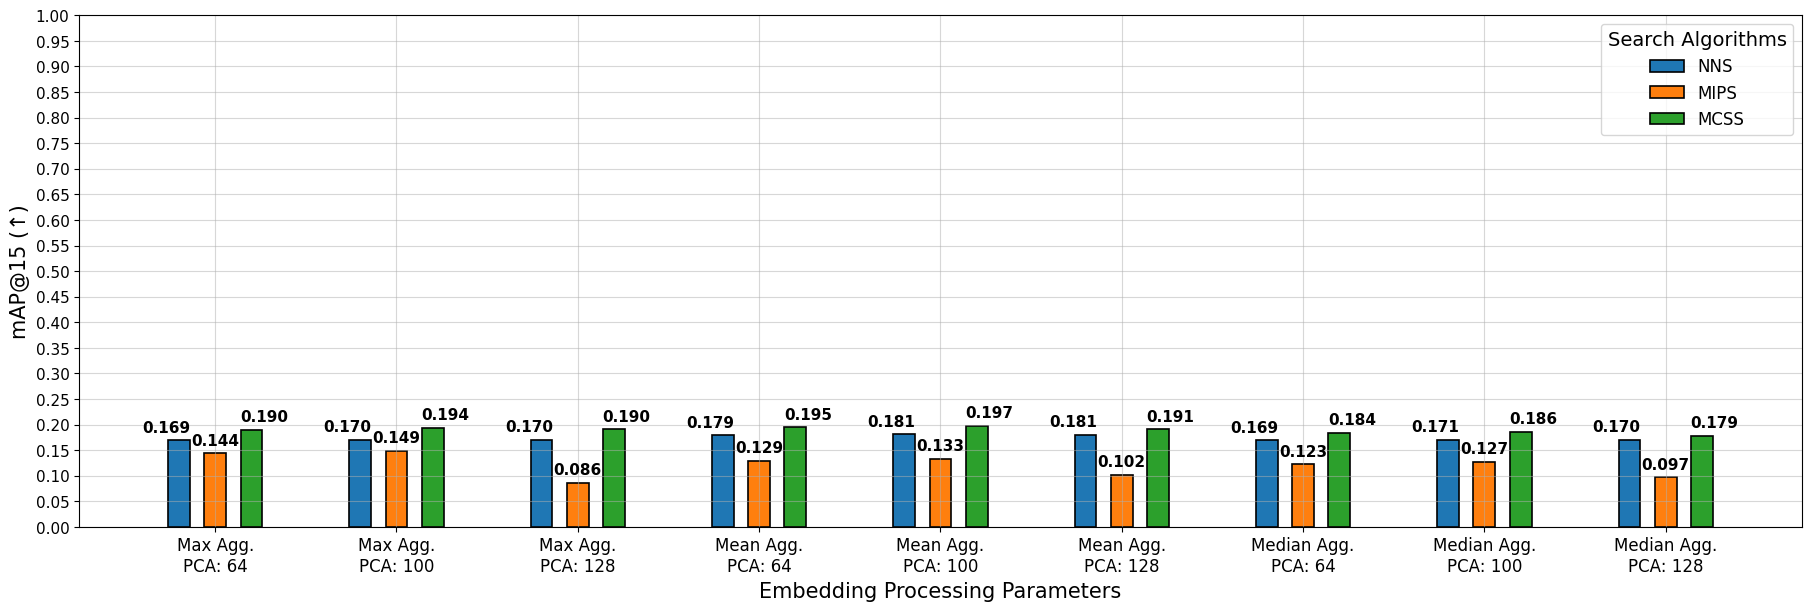

fsd-sinet-vgg42-tlpf-1
Saving figure to /home/roguz/freesound/freesound-perceptual_similarity/data/figures/paper/single_models/fsd-sinet-vgg42-tlpf-1/macro_map@15-comparisons.png


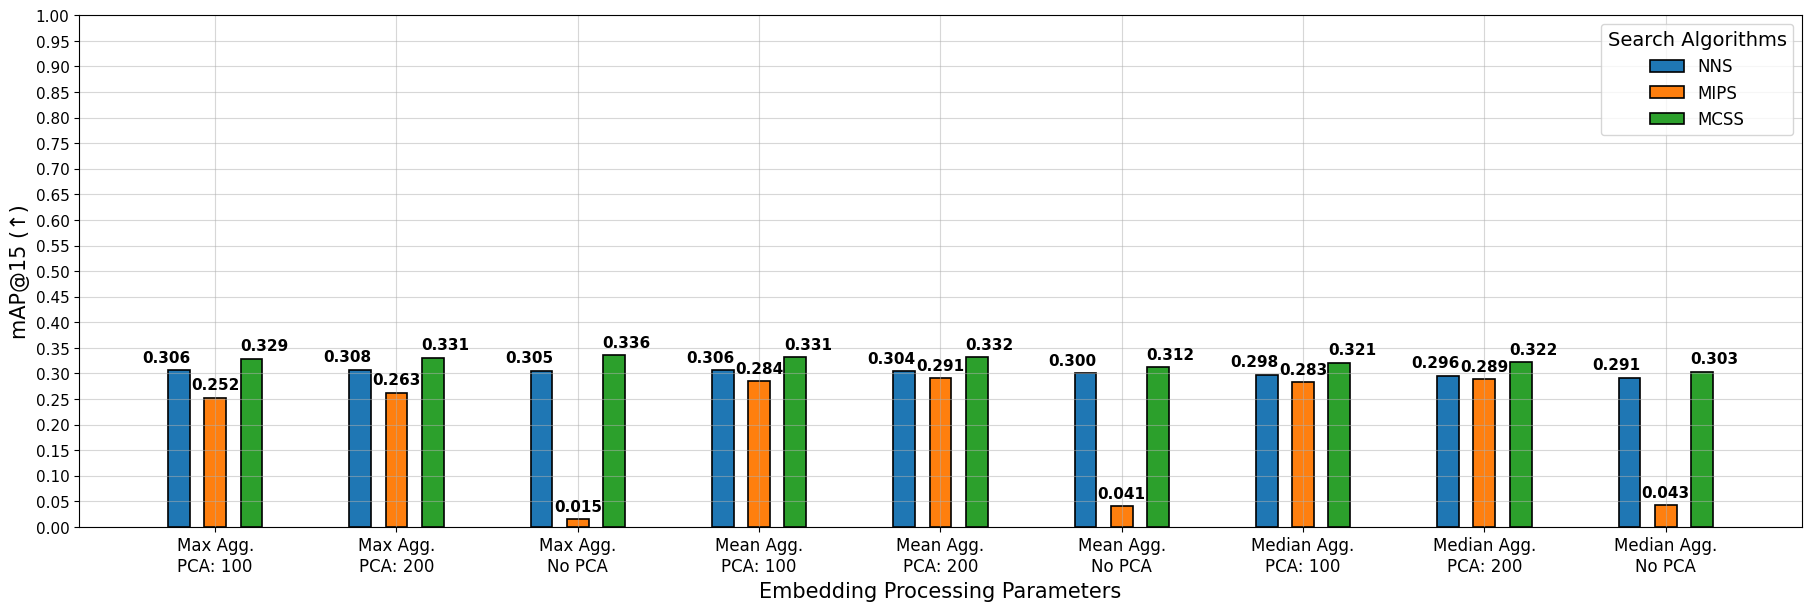

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


BEATs_iter3_plus_AS2M
Saving figure to /home/roguz/freesound/freesound-perceptual_similarity/data/figures/paper/single_models/BEATs_iter3_plus_AS2M/macro_map@15-comparisons.png


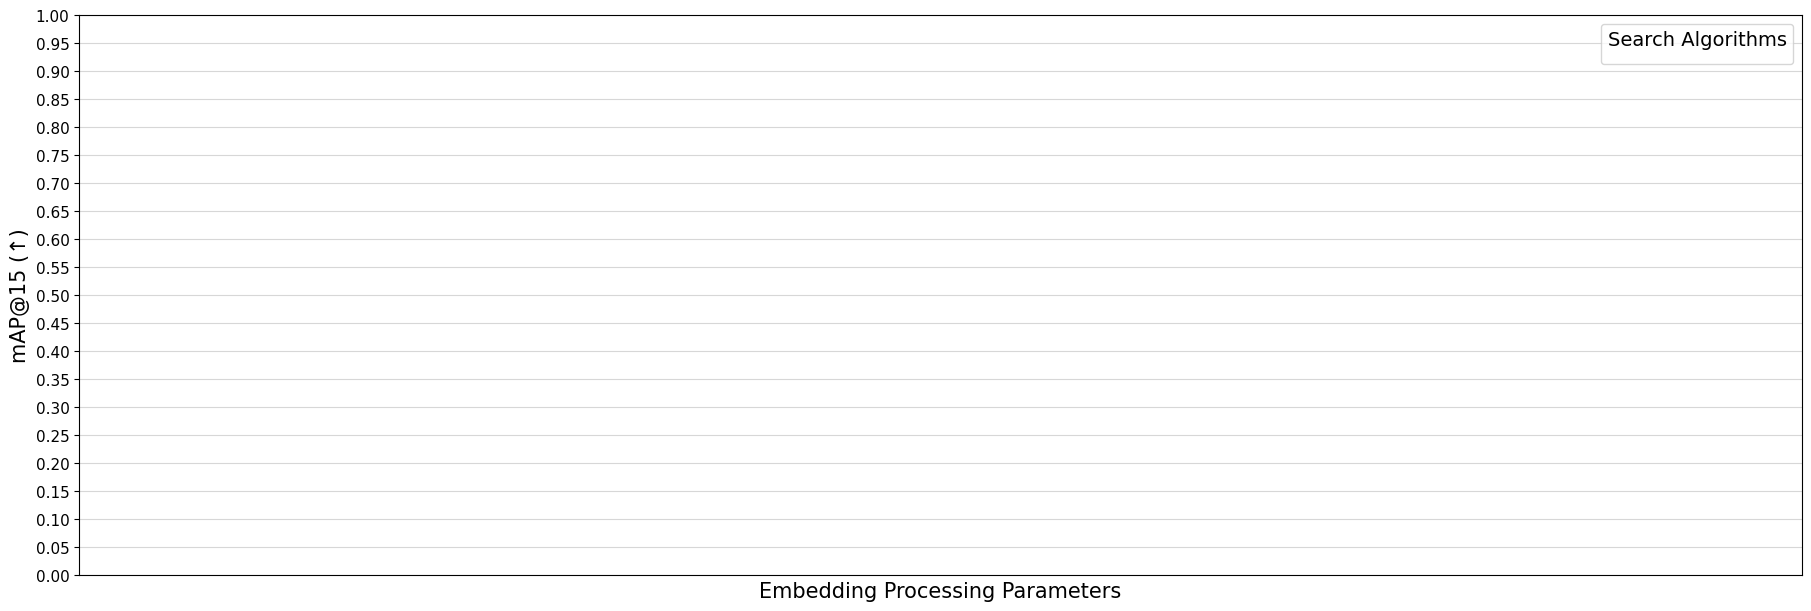

openl3-env-mel256-emb512-3
Saving figure to /home/roguz/freesound/freesound-perceptual_similarity/data/figures/paper/single_models/openl3-env-mel256-emb512-3/macro_map@15-comparisons.png


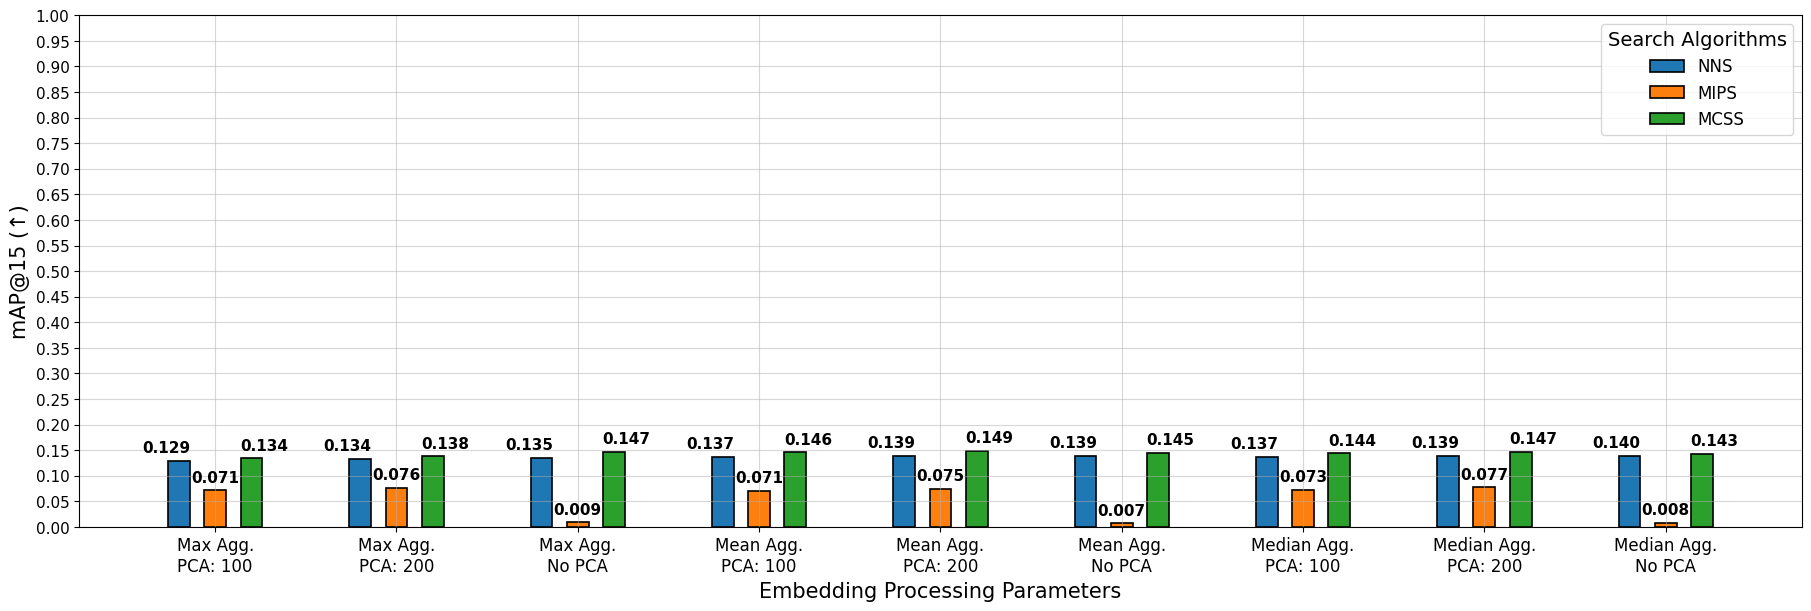

imagebind_huge
Saving figure to /home/roguz/freesound/freesound-perceptual_similarity/data/figures/paper/single_models/imagebind_huge/macro_map@15-comparisons.png


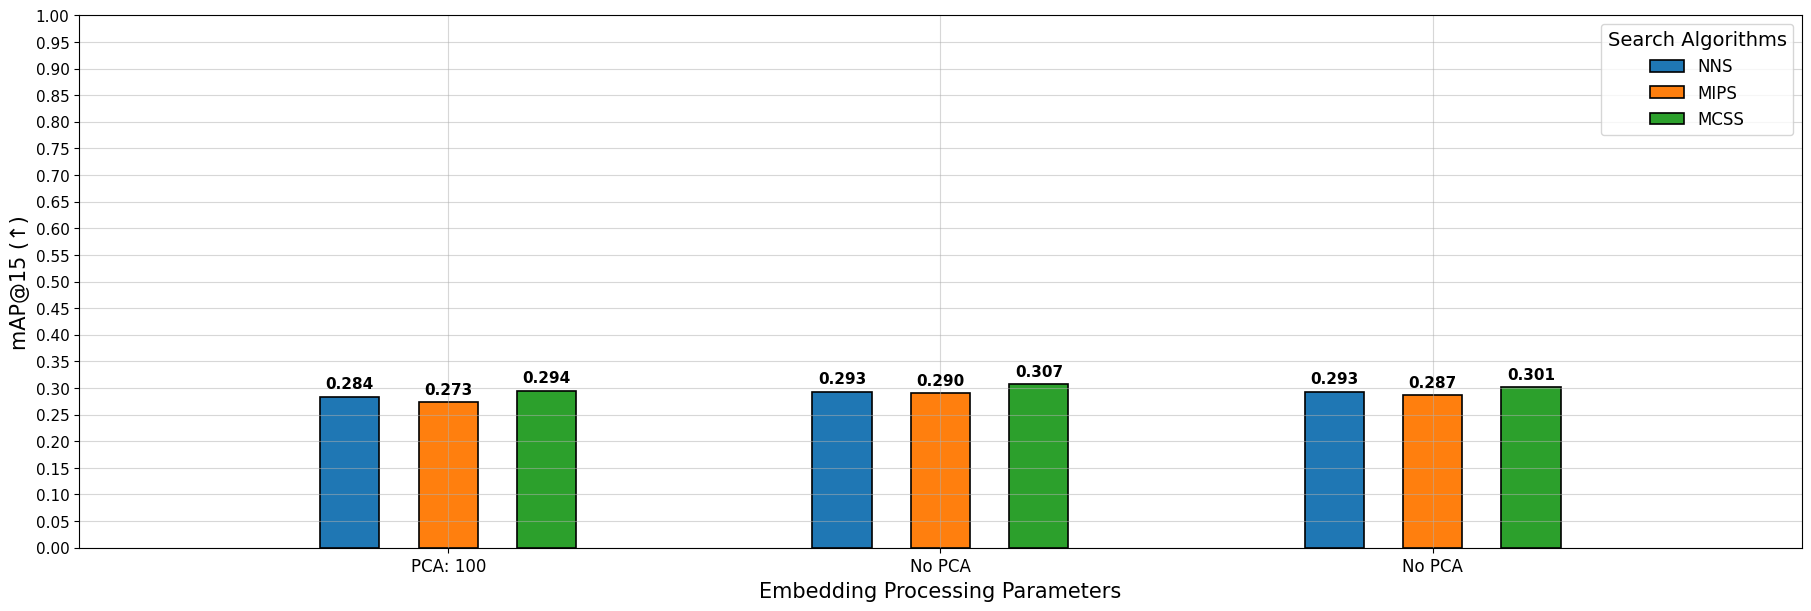

clap-630k-fusion-best
Saving figure to /home/roguz/freesound/freesound-perceptual_similarity/data/figures/paper/single_models/clap-630k-fusion-best/macro_map@15-comparisons.png


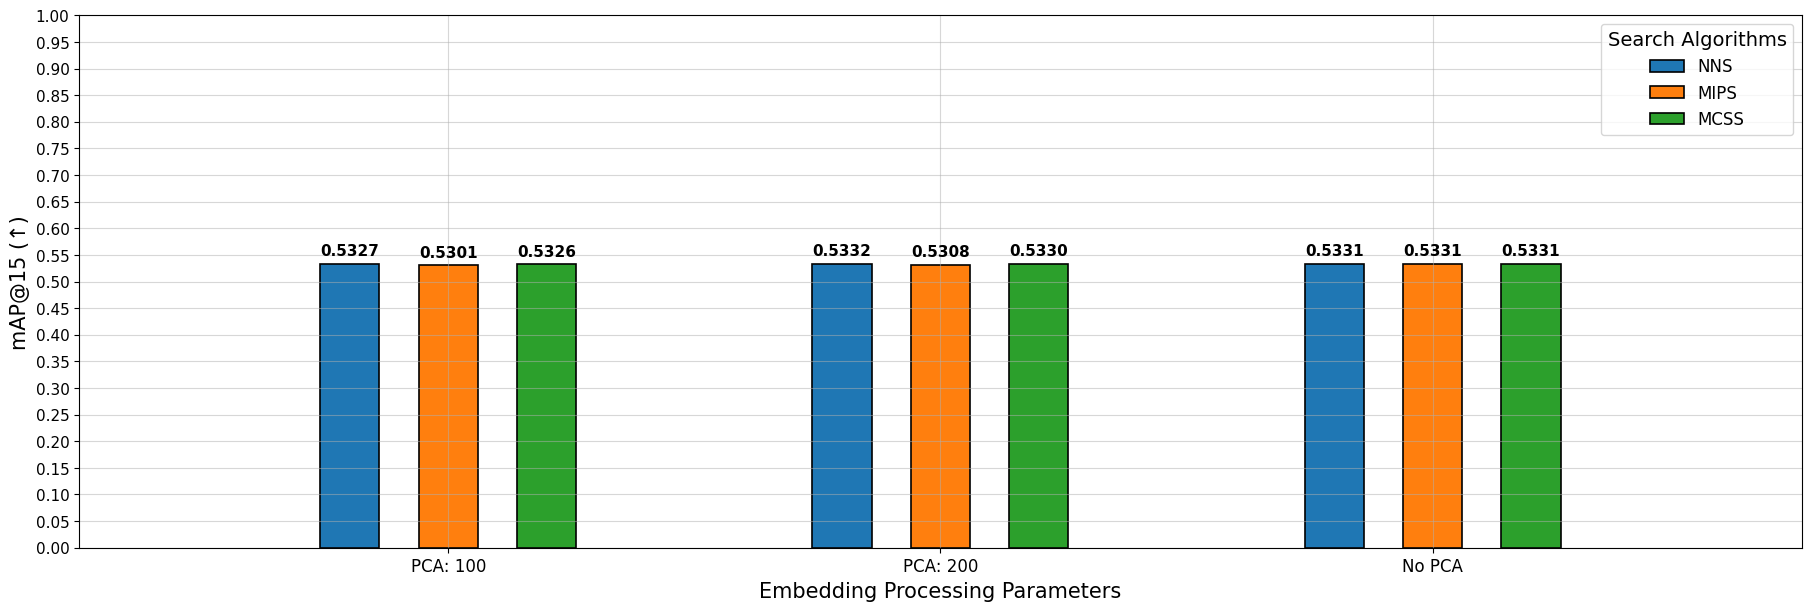

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


CLAP_2023
Saving figure to /home/roguz/freesound/freesound-perceptual_similarity/data/figures/paper/single_models/CLAP_2023/macro_map@15-comparisons.png


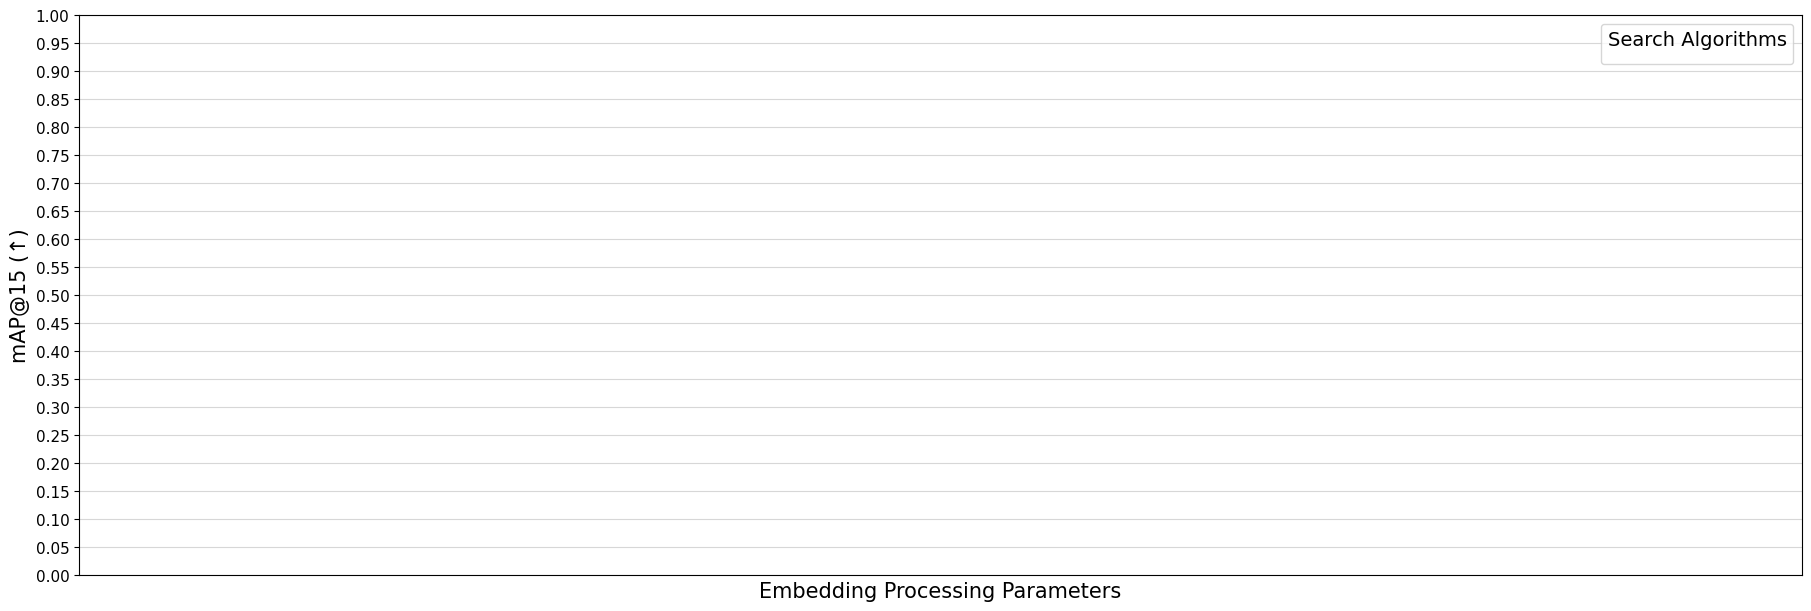

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Pengi
Saving figure to /home/roguz/freesound/freesound-perceptual_similarity/data/figures/paper/single_models/Pengi/macro_map@15-comparisons.png


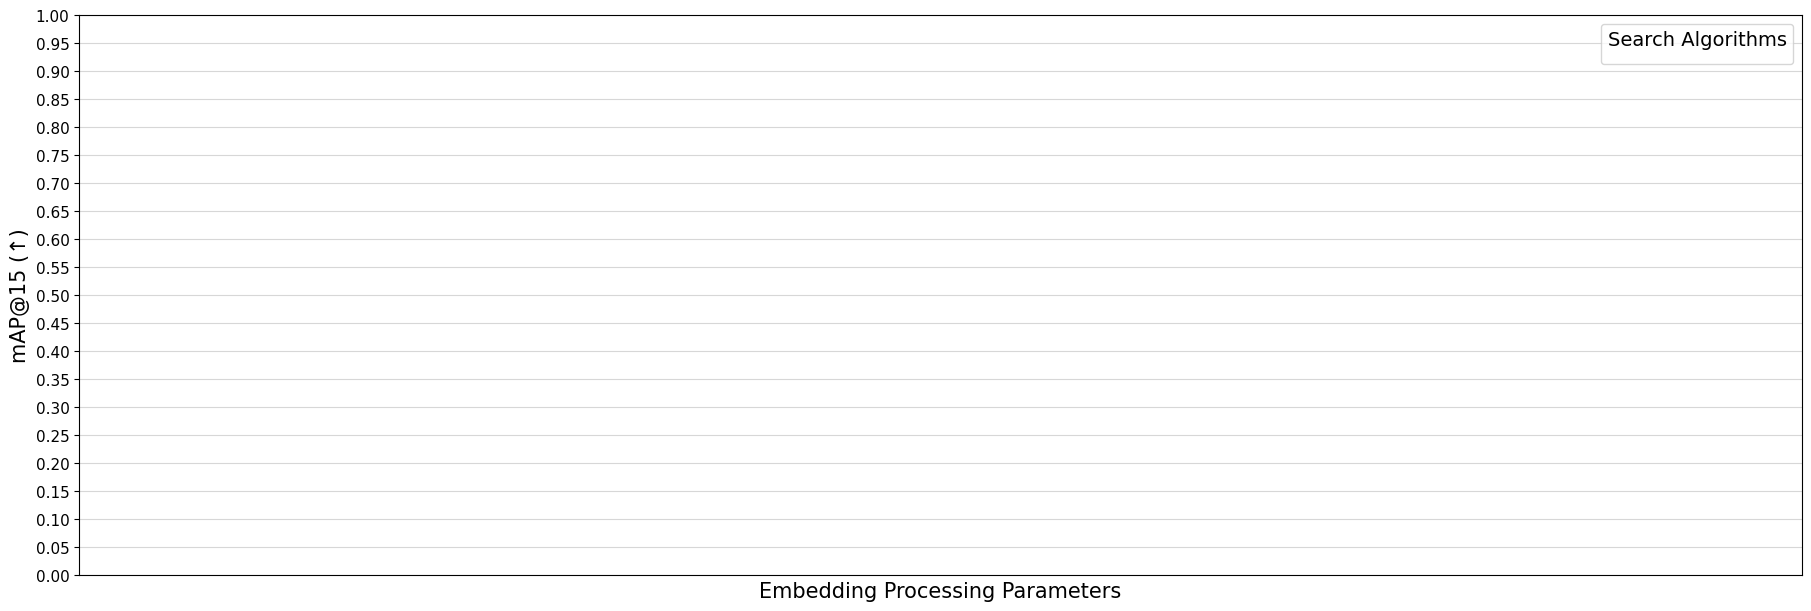

AudioCLIP-Full-Training
Saving figure to /home/roguz/freesound/freesound-perceptual_similarity/data/figures/paper/single_models/AudioCLIP-Full-Training/macro_map@15-comparisons.png


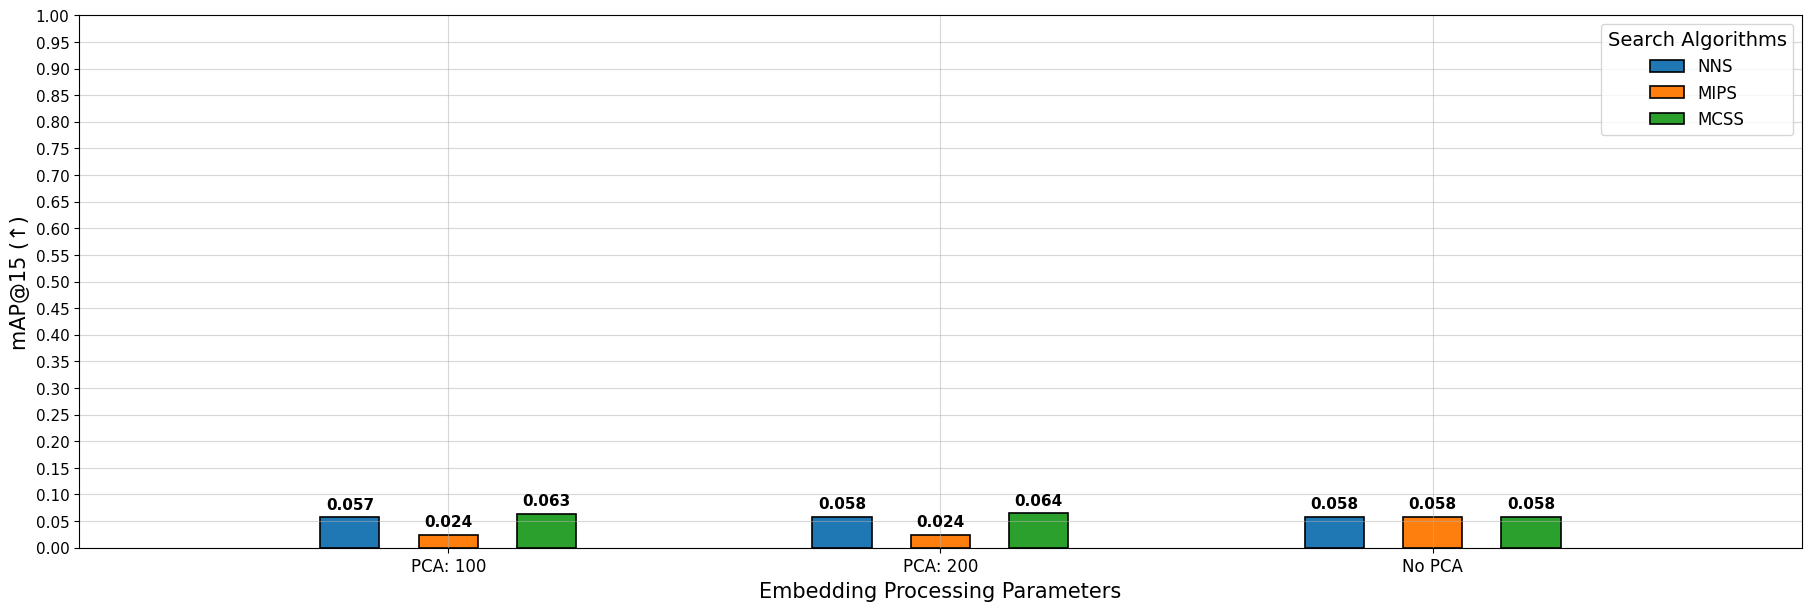

Wav2CLIP
Saving figure to /home/roguz/freesound/freesound-perceptual_similarity/data/figures/paper/single_models/Wav2CLIP/macro_map@15-comparisons.png


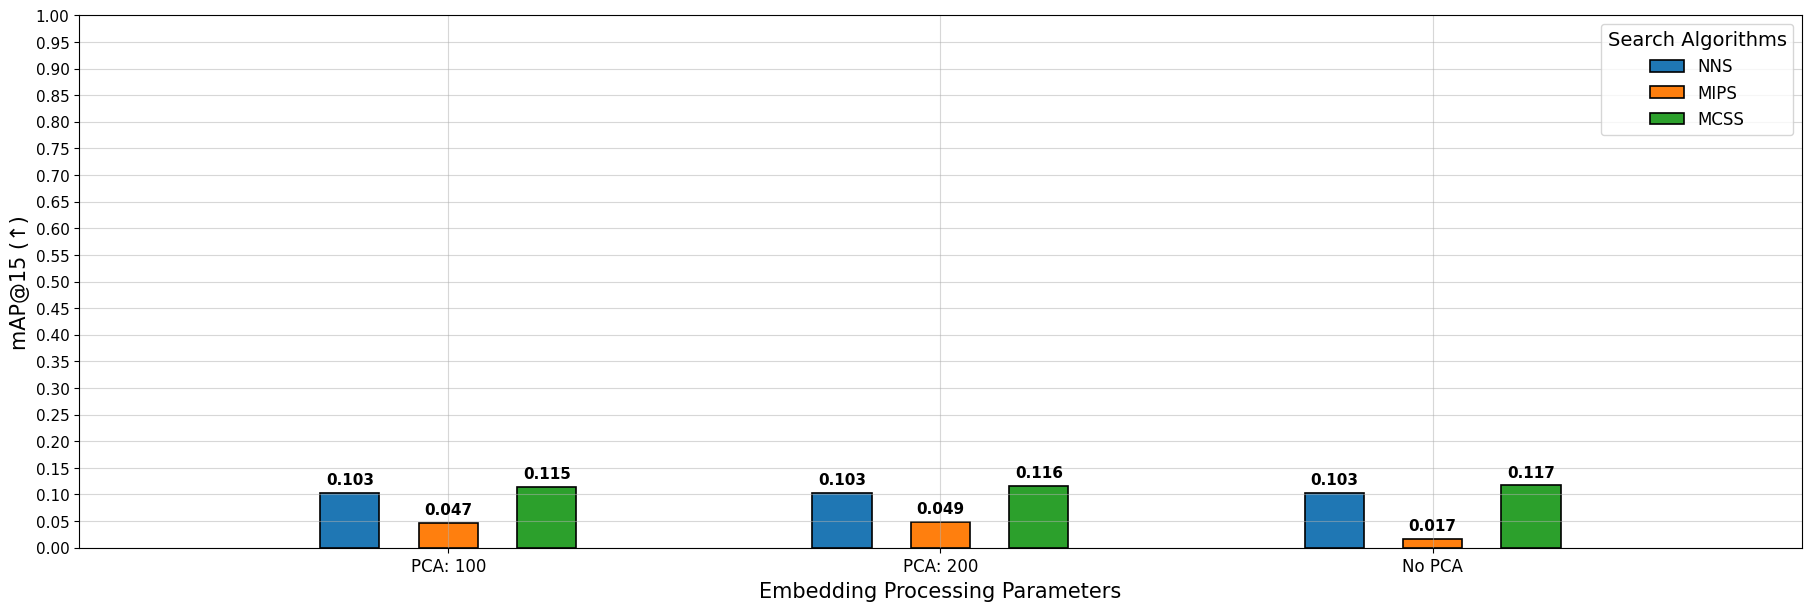

In [4]:
save_fig = True
for model in models:

    if model[0] in ["fs-essentia-extractor_legacy"]:
        continue
        map_precision = 5
    elif model[0] in ["audioset-yamnet-1", "audioset-vggish-3", "fsd-sinet-vgg42-tlpf-1", "BEATs_iter3_plus_AS2M", "CLAP_2023", "Pengi", "Wav2CLIP"]:
        map_precision = 3
    elif model[0] == "clap-630k-fusion-best":
        map_precision = 4
    elif model[0] in ["imagebind_huge", "openl3-env-mel256-emb512-3", "AudioCLIP-Full-Training"]:
        map_precision = 3
    else:
        map_precision = 2
    print(model[0])
    plot_map_at_15_comparisons(model[0], "macro", map_precision=map_precision, use_fig_name=False, presentation_mode=True, save_fig=save_fig, save_dir=os.path.join(save_dir_single, model[0]))

### PCA Comparisons

Saving figure to /home/oguz/Desktop/MastersThesis/freesound-sound_similarity/data/figures/thesis/single_models/fs-essentia-extractor_legacy/macro_map@15-PCA_comparisons.png


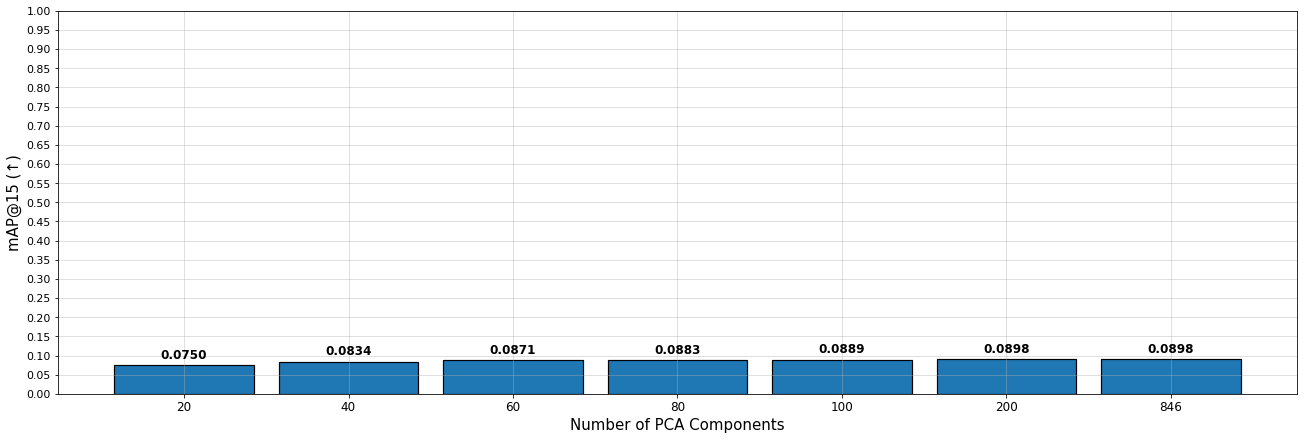

Saving figure to /home/oguz/Desktop/MastersThesis/freesound-sound_similarity/data/figures/thesis/single_models/fsd-sinet-vgg42-tlpf-1/macro_map@15-PCA_comparisons.png


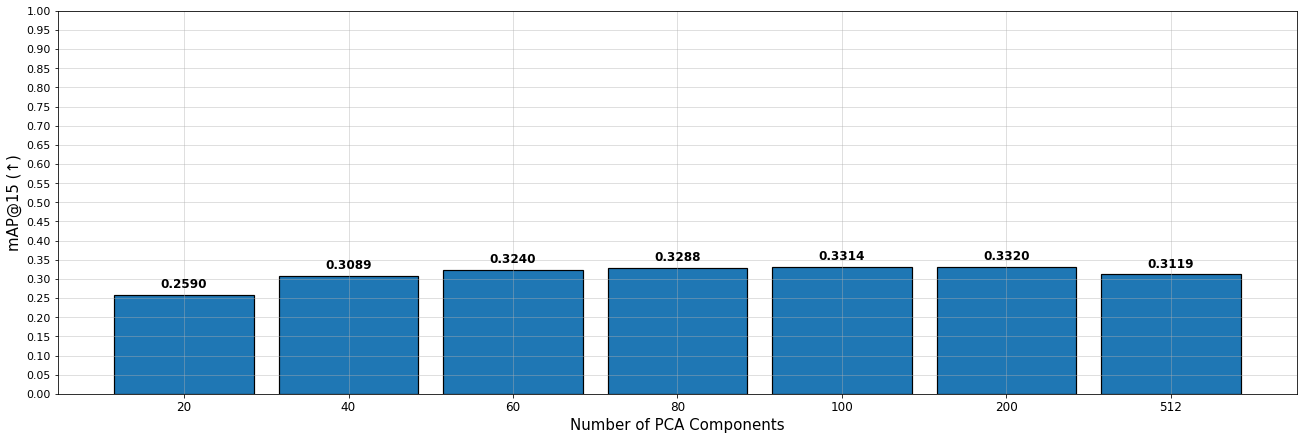

Saving figure to /home/oguz/Desktop/MastersThesis/freesound-sound_similarity/data/figures/thesis/single_models/clap-630k-fusion-best/macro_map@15-PCA_comparisons.png


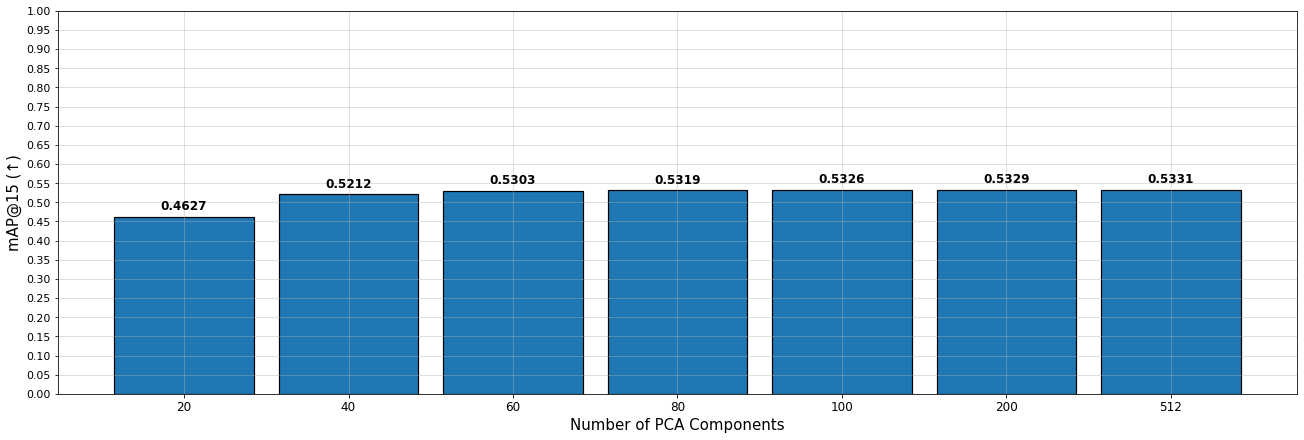

In [92]:
save = True
pca_models = [
    ("fs-essentia-extractor_legacy", "", "", "nn"),
    ("fsd-sinet-vgg42-tlpf-1", "mean", "True", "nn"),
    ("clap-630k-fusion-best", "none", "True", "nn")
    #("audioset-yamnet-1", "mean", "True", "nn"),
]
for model in pca_models:
    plot_macro_map_at_15_PCA_comparisons(model, 
                                        use_fig_name=False,
                                        save_fig=save, 
                                        save_dir=os.path.join(save_dir_single, model[0]),
                                        )